# <span style="color:maroon"> Data assimilation, machine learning and dynamical systems - Part I  </span>
#### Marc Bocquet¹ [marc.bocquet@enpc.fr](mailto:marc.bocquet@enpc.fr) and Julien Brajard² [julien.brajard@nersc.no](mailto:julien.brajard@nersc.no)
#### (1) CEREA, École des Ponts et EdF R&D, Île-de-France, France
#### (2) Nansen Center (NERSC), Bergen, Norway

During this session, we will discover some connections between data assimilation and deep learning when applied to dynamical systems.

#  <span style="color:teal"> Synopsis </span>

The goal of this lecture is to give a brief and very limited introduction to the connection between __machine learning/deep learning__ and __data assimilation__. Machine learning has found many new convincing applications over the past couple of years, besides computer vision or natural language. The geosciences are among them. Even within the geosciences, there is a considerable range of potential applications of machine learning and deep learning; some of them have been evidenced recently.

Our specific goal today will be to not only learn the state of a physical system through its observation and a prior of this state but also to correct its dynamics.This contrasts with traditional data assimilation where the model is usually assumed to be known, or corrected via only a bunch of parameters in the control variables. 

# <span style="color:teal"> Preambule: theoretical fundamentals and objective </span>

## <span style="color:blue"> Dynamical system and observation </span>

Let us consider a dynamical system which is observed:
\begin{align}
\mathbf{x}_{k} &= M_k(\mathbf{x}_{k-1}) + \eta_k, \\
\mathbf{y}_{k} &= H_k(\mathbf{x}_{k-1}) + \varepsilon_k
\end{align}
where $\mathbf{x}_k$ is the state vector at time $t_k$, $\mathbf{y}_k$ is the observation vector at time $t_k$,
$M_k$ is the numerical evolution model from time $t_{k-1}$ to time $t_k$, and $H_k$ is the observation operator. The noise vector $\varepsilon_k$ follows a Gaussian distribution and is meant to account for some of model error:
$\varepsilon_k \sim {\mathcal N}({\mathbf 0}, {\mathbf Q}_k)$. The noise vector $\eta_k$ follows a Gaussian distribution and is meant to account for observation error: $\eta_k \sim {\mathcal N}({\mathbf 0}, {\mathbf R}_k)$.

## <span style="color:blue"> Weak-constraint 4D-Var and generalisation </span>

Then the typical weak-constraint 4D-Var associated to this system is described by the cost function:
$$
J(\mathbf{x}_{0:K}) = - J_\mathrm{b}(\mathbf{x}_0) + \sum_{k=0}^K \|\mathbf{y}_k-\mathbf{H}_k \mathbf{x}_k \|^2_{\mathbf{R}_k^{-1}}+ \sum_{k=1}^K \|\mathbf{x}_k- M_k\left(\mathbf{x}_{k-1}\right) \|^2_{\mathbf{Q}_k^{-1}}, 
$$
where $J_\mathrm{b}$ is the prior/background term, the second term is departure from the observations, and the third term is the model error term which measures the departure from what the model $M_k$ would predict.
Now, we can widen the problem and assume the model is at least partly statistical on depend a vector of constant-in-time parameters 
$\boldsymbol{\omega}$ to be adjusted if not learned, i.e.:
$$
\mathbf{x}_{k} = M_k(\boldsymbol{\omega}, \mathbf{x}_{k-1}) + \eta_k .
$$
They could be physical parameters of the model, or weights and biases of a neural network correction to a physical model. The generalised cost function becomes:
$$
J(\boldsymbol{\omega}, \mathbf{x}_{0:K}) = - J_\mathrm{b}(\mathbf{x}_0) + \sum_{k=0}^K \|\mathbf{y}_k-\mathbf{H}_k \mathbf{x}_k \|^2_{\mathbf{R}_k^{-1}}+ \sum_{k=1}^K \|\mathbf{x}_k- M_k\left(\boldsymbol{\omega}, \mathbf{x}_{k-1}\right) \|^2_{\mathbf{Q}_k^{-1}}.
$$

## <span style="color:blue"> Combined data assimilation and machine learning </span>

### First step: data assimilation

Hence, we want to minimise this cost function both on the trajectory $\mathbf{x}_{0:K}$ and on the model statistical parameters. But they are very different in nature and quite difficult to minimise altogether. Hence we will split the task on first a data assimilation part focusing on $\mathbf{x}_k$, and then a machine learning task focusing on $\boldsymbol{\omega}$.
We first assime the model is of the form:
$$
M_k(\boldsymbol{\omega},\mathbf{x}_{k-1}) = \Phi(\mathbf{x}_{k-1}) + \mathrm{nn}_\boldsymbol{\omega}(\mathbf{x}_{k-1})
$$
where $\Phi$ is a known physical model, approximation of the true model and $\mathrm{nn}_\boldsymbol{\omega}$ 
is a neural network correction.
$$
J(\boldsymbol{\omega}, \color{red}{\mathbf{x}_{0:K}}) = - J_\mathrm{b}(\color{red}{\mathbf{x}_0})
+ \sum_{k=0}^K \|\mathbf{y}_k-\mathbf{H}_k \color{red}{\mathbf{x}_k} \|^2_{\mathbf{R}_k^{-1}}
+ \sum_{k=1}^K \| \color{red}{\mathbf{x}_k}- M_k\left(\boldsymbol{\omega}, \color{red}{\mathbf{x}_{k-1}}\right) \|^2_{\mathbf{Q}_k^{-1}}.
$$
At fixed $\boldsymbol{\omega}$, this is a smoothing data assimilation problem, which can be solved more or less acurately by any proper data assimilation method: 4D-Var, WC 4D-Var, EnKF, EnKS, IEnKS, etc.

### Second step: machine learning

Next, once a state trajectory $\mathbf{x}^\star_{0:K}$ has been obtained from data assimilation, one can focus on the machine learning problem and specifically $\boldsymbol{\omega}$:
$$
J(\color{red}{\boldsymbol{\omega}}, \mathbf{x}^\star_{0:K}) = - J_\mathrm{b}(\mathbf{x}^\star_0) + \sum_{k=0}^K \|\mathbf{y}_k-\mathbf{H}_k \mathbf{x}^\star_k \|^2_{\mathbf{R}_k^{-1}}+ \sum_{k=1}^K \| \mathbf{x}^\star_k - \Phi(\mathbf{x}^\star_{k-1}) - \mathrm{nn}_\color{red}{\boldsymbol{\omega}}(\mathbf{x}^\star_{k-1}) \|^2_{\mathbf{Q}_k^{-1}}.
$$
The output is a learned neural net $\mathrm{nn}_\boldsymbol{\omega^\star}$, and hence a correction of the hybrid physical/statistical model.


### Coordinate descent

Moreover, it can be shown that one can iterate those two steps, which is known as a coordinate descent, following the schematic:
<p align = "center">
<img src="./Figures/loop_daml.png" alt="Coordinate descent for DAML" width="800"/>
</p>
<p align = "center">
Fig.1 - Coordinate descent schematic for DAML.
</p>

# <span style="color:teal"> First step: consistent model trajectory through data assimilation </span>

## <span style="color:blue"> I. The Lorenz 1996 model </span>

The Lorenz 1996 (L96, [Lorenz and Emanuel 1998]) is a low-order chaotic model commonly used in data assimilation to asse the performance of new algorithms. It represents the evolution of some dynamical meteorological scalar variable over a latitude circle.

The model **dynamics** is driven by the following set of ordinary differential equations (ODEs):
$$
    \forall n \in [1, N_{\mathsf{x}}], \quad \frac{\mathrm{d}x_{n}}{\mathrm{d}t} =
    (x_{n+1}-x_{n-2})x_{n-1}-x_{n}+F,
$$
where the indices are periodic: $x_{-1}=x_{N_{\mathsf{x}}-1}$, $x_{0}=x_{N_{\mathsf{x}}}$, and $x_{1}=x_{N_{\mathsf{x}}+1}$, and where the system size $N_{\mathsf{x}}$ can take arbitrary values.

In the standard configuration, $N_{\mathsf{x}}=40$ and the forcing coefficient is $F=8$. The ODEs are integrated using a fourth-order Runge-Kutta scheme with a time step of $0.05$ model time unit (MTU). The resulting dynamics is **chaotic** with a doubling time of errors around $0.42$ MTU. For comparison, $0.05$ MTU represent six hours of real time and correspond to an average autocorrelation around $0.967$.
This model will be or apprimation of a band of atmosphere.

## <span style="color:blue"> II. Proxy model integration </span>

We now make an integration of the model to visualise a state trajectory (Hovmöller plot) of the L96 model.
We first import standard modules including tensorflow, graphical package and the model which is a numerical implementation of the above ODEs. Note that we have built it in Python/Keras/TensorFlow2.x.

In [1]:
# Import standard modules
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import trange, tqdm

# Folder for results
dir = dict(output = "./Output")

# For plot customisation
sns.set_context('notebook')
sns.set_style('darkgrid')
plt.rc('axes', linewidth=1)
plt.rc('axes', edgecolor='k')
plt.rc('figure', dpi=100)
palette = sns.color_palette('deep')

# Import custom L96 model package
from Model.lorenz96 import l96

In the following cell, we define the parameter values of L96 which are taken from the original paper:
- the number of variables $N_{\mathsf{x}}$ is set to $N_{\mathsf{x}} =40$;
- the forcing coefficient $F$ is set to $F=8$;
- the integration time step is set to $dt=0.05$.

In this configuration, the model variability (spatial average of the time standard deviation per variable) is $3.64$, the doubling time is $0.42$ MTU and the Lyapunov time is $0.61$ MTU. These values will be used later to normalise our plots.

In [2]:
# Set the parameters of L96 and build the model
Nx = 40
dt = 0.05
F = 8
phi = l96(Nx, dt, F)
phi_stat = dict( model_mean = 2.22,
                 model_std = 3.73,
                 doubling_time = 0.42,
                 lyap_time = 0.61
               )

In the following cell, we perform a rather short model integration, in order to illustrate the model dynamics. The initial condition is a random field.

In [3]:
# Perform a short model integration (for plotting)
Nt_plot = 500
xt_plot = np.zeros((Nt_plot, Nx))
x = 3 + np.random.randn(Nx)
for t in trange(Nt_plot, desc='proxy model integration'):
    x += phi(x)
    xt_plot[t] = x
xt_init = x.copy()
# with open(dir['output']+'/xt_init.npy', 'wb') as file:
#     np.save(file, xt_init)

proxy model integration:   0%|          | 0/500 [00:00<?, ?it/s]

/tmp/ipykernel_90496/1825099362.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im)


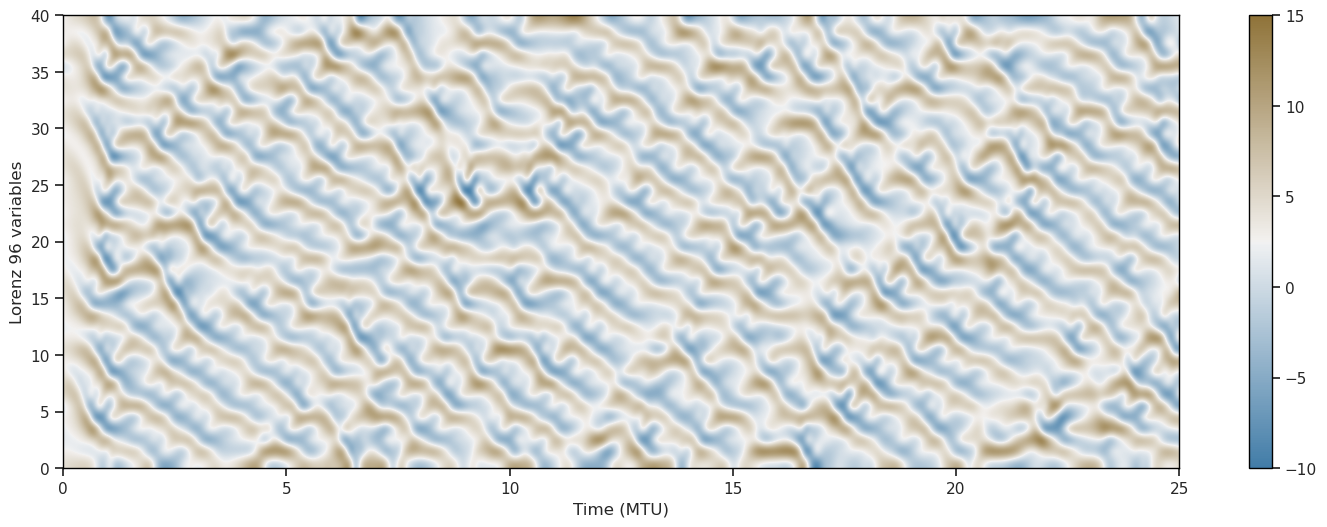

In [4]:
# Plot model integration
fig = plt.figure(figsize=(18, 6))
plt.grid(False)
im = plt.imshow(xt_plot.T, 
           aspect = 'auto',
           origin = 'lower',
           interpolation = 'spline36',
           cmap = sns.diverging_palette(240, 60, as_cmap=True),
           extent = [0, dt*xt_plot.shape[0], 0, Nx],
           vmin = -10,
           vmax = 15)
plt.colorbar(im)
plt.xlabel('Time (MTU)')
plt.ylabel('Lorenz 96 variables')
plt.tick_params(direction='out', left=True, bottom=True)
plt.show()

## <span style="color:blue"> III. True model definition </span>

Here, we consider the simple L96 model as an approximation of a more complex model, the true model, which can only be sparsely and noisily observed. We have devised a non-trivial model for this MOOC whose approximation could be L96. We wanted to avoid employing a true model where only a few parameters of L96 are changed, since this can be very easily learned by traditional data assimilation.

These true model dynamics are driven by the following set of ordinary differential equations (ODEs):
$$
    \forall n \in [1, N_{\mathsf{x}}], \quad \frac{\mathrm{d}x_{n}}{\mathrm{d}t} =
    (x_{n+1}-x_{n-2})x_{n-1} + \nu \left\{ x_{n+1}x_{n-1}(x_{n+2}-x_{n-2}) - x_{n+2}x_n(x_{n+3}-x_{n-1})\right\}
    - \lambda x_{n} +  F,
$$
where the indices are periodic: $x_{-1}=x_{N_{\mathsf{x}}-1}$, $x_{0}=x_{N_{\mathsf{x}}}$, and $x_{1}=x_{N_{\mathsf{x}}+1}$, and where the system size $N_{\mathsf{x}}=40$.

Moreover:
- the forcing coefficient is chosen to be $F=8.5$ as opposed to $8$ in L96;
- the friction coefficient is $\lambda=1.1$ as opposed to $1$ in L96;
- there is an additional cubic term compared to L96 in the tendencies, controlled by the $\nu$ parameter. This term (i) is second-order as in the sense that it is asymptotically consistent with a term of the form $x (\partial x)^2$ (ii) and it conserves energy $\sum_{n=1}^{N_\mathsf{x}} x_n^2$. Depending on the sign of $\nu$, it could soften or stiffen the L96 model. We choose $\nu=0.01$, whose value corresponds to a smoother generalisation of L96.

Like for the L96 model, these ODEs are integrated using a fourth-order Runge-Kutta scheme with a time step of $0.05$ model time unit (MTU). The resulting dynamics is **chaotic** with a doubling time of errors around $0.54$ MTU.

In [5]:
# import custom avection model package
from Model.lorenz96_cubic import l96cb

# Define the proxy model with non standard values and linear advection rather than convection
Nx = 40
dt = 0.05
F = 8
diffusion = 0.025
friction = 1.0
tmodel = l96cb(Nx, dt, F, diffusion, friction)

# perform a short model integration (for plotting)
Nt_plot = 500
xt_plot = np.zeros((Nt_plot, Nx))
x = xt_init.copy()
for t in trange(Nt_plot, desc='true model integration'):
    x += tmodel(x)
    xt_plot[t] = x

true model integration:   0%|          | 0/500 [00:00<?, ?it/s]

/tmp/ipykernel_90496/512812978.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im)


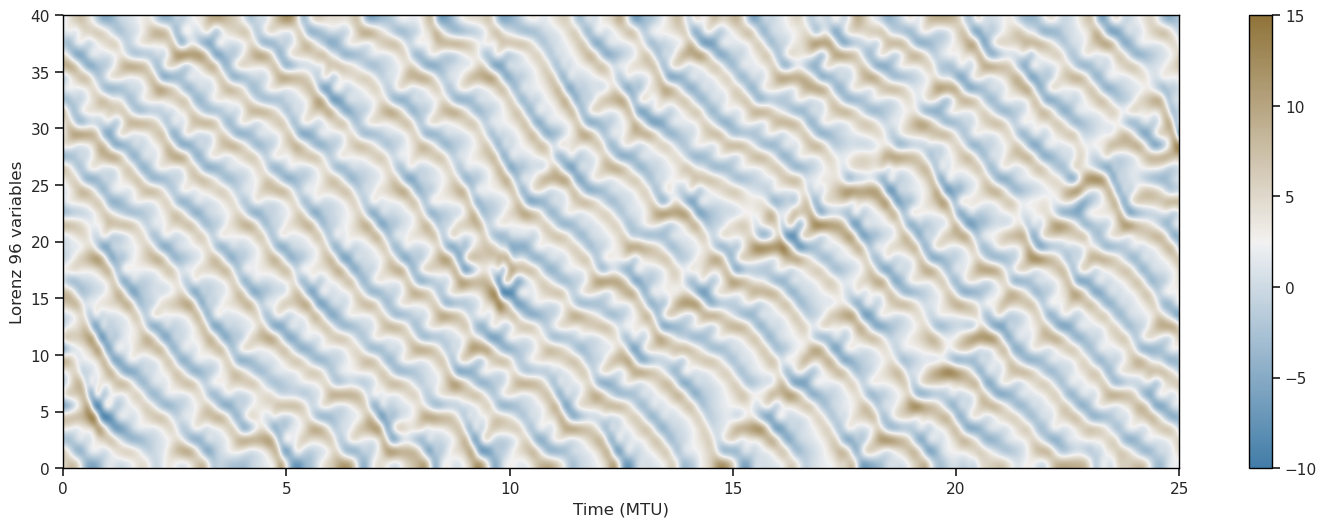

In [6]:
# plot model integration
fig = plt.figure(figsize=(18, 6))
plt.grid(False)
im = plt.imshow(xt_plot.T, 
           aspect = 'auto',
           origin = 'lower',
           interpolation = 'spline36',
           cmap = sns.diverging_palette(240, 60, as_cmap=True),
           extent = [0, dt*xt_plot.shape[0], 0, Nx],
           vmin = -10,
           vmax = 15)
plt.colorbar(im)
plt.xlabel('Time (MTU)')
plt.ylabel('Lorenz 96 variables')
plt.tick_params(direction='out', left=True, bottom=True)
plt.show()

For those of you interested in the long-term dynamical properties of this model compared to the L96, we can compute and plot the Lyapunov spectra of both mode on the same figure for comparison. We observe from both the Hovmöller plot and from its Lyapunov spectrum that indeed the true model aith the chosen parameter values is a slightly less unstable and smoother than L96.

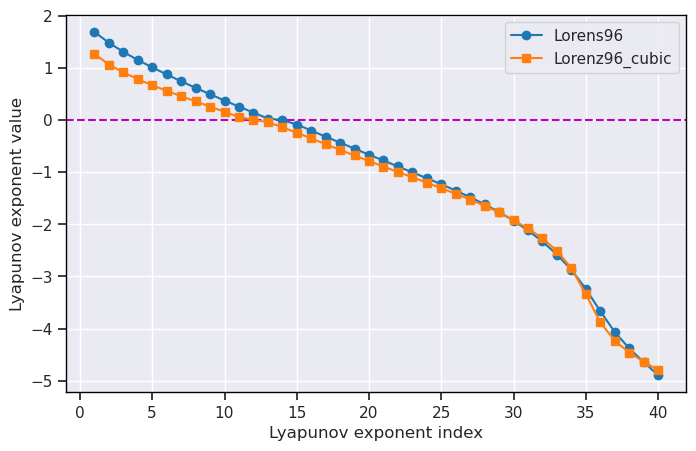

In [7]:
from LyapunovSpectrum.lyaspec import load
index, l96_lyaspec = load('l96_lyaspec.dat')
index, l96cb_lyaspec = load('l96cb_lyaspec.dat')
fig = plt.figure(figsize=(8, 5))
plt.axhline(y=0, color='m', linestyle='dashed')
plt.plot(index, l96_lyaspec, marker="o", label='Lorens96')
plt.plot(index, l96cb_lyaspec, marker="s", label='Lorenz96_cubic')
plt.legend()
plt.xlabel('Lyapunov exponent index')
plt.ylabel('Lyapunov exponent value')
plt.tick_params(direction='out', left=True, bottom=True)
plt.show()

Some statistics of this model can be computed, for comparison to the L96 model and for nornmalisation purposes:

In [8]:
truth_stat = dict( model_mean = 2.10,
                   model_std = 3.32,
                   doubling_time = 0.54,
                   lyap_time = 0.79
                  )

## <span style="color:blue"> IV. Database of observations </span>

Let us first compute a long trajectory of the truth which will be key to our synthetic experiment.
It is saved but it will only be accessible through observation.

In [9]:
# Compute the truth trajectory
Nt = 50000
xt = np.zeros((Nt, Nx), dtype=np.float32)
dates = np.array(range(Nt), dtype=int)
x = xt_init.copy()
for t in trange(Nt, desc='true model integration'):
    x += tmodel(x)
    xt[t] = x
with open(dir['output']+'/xt.npy', 'wb') as file:
    np.save(file, xt)
with open(dir['output']+'/dates.npy', 'wb') as file:
    np.save(file, dates)

true model integration:   0%|          | 0/50000 [00:00<?, ?it/s]

In the data assimilation run, only observations of this trajectory will be generated.
To match more realistic conditions, we only observe one every two grid points, and these scalar observations are noisy. Moreover, from one observation time to the next, these grid points are shifted by one grid cell.
Hence, the observation mask in space and time follows a checkerboard pattern. 
For the sake of simplicity, $N_\mathsf{x}$ is assumed even in the following so that one have the same number of observation at each date, i.e. $N_\mathsf{y}=N_\mathsf{x}/2$.

We add a normal i.i.d observation perturbation to each scalar observation, so that
$\mathbf{R}_k = \sigma_\mathrm{obs}^2 \mathbf{I}_{N_\mathsf{x}}$, with
- $\sigma_\mathrm{obs}=1$.

Let us now compute and save this observational database extracted from the trajectory of the true model.

In [10]:
# Build the observation operator
from DataAssimilation.observation import checkerboard
H = checkerboard(Nx)

# Compute the observation database
Ny = H.Ny[0]
sig_obs = 1.
yp = np.empty((Nt, Ny), dtype=np.float32)
for t in trange(Nt, desc='generating observations'):
    yp[t] = H(xt[t], t) + np.random.normal(0, sig_obs, Ny)
with open(dir['output']+'/yp.npy', 'wb') as file:
    np.save(file, yp)

generating observations:   0%|          | 0/50000 [00:00<?, ?it/s]

At this point, we have at our disposal, a noisy and sparse observational database of the truth $\mathbf{y}_\mathsf{p}$ on the one hand, and an approximation of the true model $\Phi$ on the other hand. The goal is to learn the full dynamics of this physical system. Hence, we want to apply the very first step of our combined DA+ML algorithm.

The first step is to apply data assimilation with the goal to reconstruct a full field of the system.
The second step, in part II of this MOOC, will apply machine learning to this reconstructed full field.

## <span style="color:blue"> IV. Data assimilation with an ensemble Kalman filter </span>

The data assimilation method that we choose is a deterministic EnKF, the ensemble transform Kalman filter (ETKF, [Hunt et al 2007]) to the problem, with an ensemble choosen to be $N_\mathrm{e}=30$ to avoid the need for localisation, only for the sake of simplicity (see for generalisations with localisation).

A gentle introduction to the ETKF at a master level can be found in chapter 5 of http://cerea.enpc.fr/HomePages/bocquet/teaching/assim-mb-en.pdf.

We assume that we know the observation error statistics, in particular $\sigma_\mathrm{obs}=1$.

In addition, we incorporate in the scheme a way to account for model error, i.e. the fact that $\Phi$ is an approximation of the true dynamics. In the absence of such scheme, the EnKF would diverge, being overconfident in its estimation of the source of errors.

This is achieved by
- the SQRT-CORE scheme [Raanes et al, 2015] with the simplest i.i.d. assumption: $\mathbf{Q}_k = \sigma_q^2 \mathrm{I}$; We choose to use $\sigma_q^2=0.1 \, dt$.
- and via a state-of-the-art adaptive inflation scheme [Raanes et al, 2019].

This just tells the EnKF to be cautious about its estimation of uncertainty and apply a margin of error to be on the safer side, and hence avoid divergence of the EnKF.


In [11]:
from DataAssimilation.enkf_call import call
Ne = 30
sig_q = np.sqrt(0.1*dt)
Nt = yp.shape[0]
Nts = 0
sig_x = 1
infl = 1

models = (phi, xt, H, yp, dates)
params = (Nx, dt, Nt, Nts, Ne, sig_obs, sig_x, sig_q, infl)

print("> run")
rmse_mean, spread_mean, rmsei_mean, zeta_mean, wctime, prtime = call(models, params, dir)
print("> wctime(s)", wctime, " prtime(s)", prtime)
print("> rmse_mean", rmse_mean, "spread_mean", spread_mean, "rmsei_mean", rmsei_mean)
print("> zeta_mean", zeta_mean)

> run
> generate ensemble
> data assimilation run
 - step 0  rmse (0.000)  spreadx (0.000)  rmsei (0.000)  infl (1.000) beta (1.000) nu 100
 - step 1  rmse (0.884)  spreadx (0.812)  rmsei (3.771)  infl (1.000) beta (1.000) nu 101
 - step 2  rmse (0.898)  spreadx (0.725)  rmsei (3.721)  infl (1.000) beta (0.993) nu 102
 - step 3  rmse (0.877)  spreadx (0.695)  rmsei (3.557)  infl (1.000) beta (1.007) nu 103
 - step 4  rmse (0.865)  spreadx (0.681)  rmsei (3.330)  infl (1.000) beta (1.033) nu 104
 - step 5  rmse (0.838)  spreadx (0.666)  rmsei (3.219)  infl (1.000) beta (1.029) nu 105
 - step 6  rmse (0.821)  spreadx (0.649)  rmsei (3.100)  infl (1.000) beta (1.025) nu 106
 - step 7  rmse (0.799)  spreadx (0.636)  rmsei (3.043)  infl (1.000) beta (1.020) nu 107
 - step 8  rmse (0.785)  spreadx (0.625)  rmsei (2.948)  infl (1.000) beta (1.023) nu 108
 - step 9  rmse (0.775)  spreadx (0.616)  rmsei (2.883)  infl (1.000) beta (1.026) nu 109
 - step 10  rmse (0.770)  spreadx (0.608)  rmsei (

 - step 111  rmse (0.541)  spreadx (0.468)  rmsei (2.650)  infl (1.000) beta (1.353) nu 211
 - step 112  rmse (0.541)  spreadx (0.468)  rmsei (2.647)  infl (1.000) beta (1.349) nu 212
 - step 113  rmse (0.541)  spreadx (0.469)  rmsei (2.647)  infl (1.000) beta (1.355) nu 213
 - step 114  rmse (0.541)  spreadx (0.469)  rmsei (2.650)  infl (1.000) beta (1.357) nu 214
 - step 115  rmse (0.541)  spreadx (0.469)  rmsei (2.651)  infl (1.000) beta (1.355) nu 215
 - step 116  rmse (0.540)  spreadx (0.469)  rmsei (2.654)  infl (1.000) beta (1.353) nu 216
 - step 117  rmse (0.540)  spreadx (0.470)  rmsei (2.656)  infl (1.000) beta (1.360) nu 217
 - step 118  rmse (0.540)  spreadx (0.470)  rmsei (2.654)  infl (1.000) beta (1.364) nu 218
 - step 119  rmse (0.540)  spreadx (0.470)  rmsei (2.652)  infl (1.000) beta (1.370) nu 219
 - step 120  rmse (0.539)  spreadx (0.470)  rmsei (2.645)  infl (1.000) beta (1.366) nu 220
 - step 121  rmse (0.538)  spreadx (0.471)  rmsei (2.641)  infl (1.000) beta (1.

 - step 219  rmse (0.540)  spreadx (0.467)  rmsei (2.664)  infl (1.000) beta (1.361) nu 319
 - step 220  rmse (0.540)  spreadx (0.467)  rmsei (2.662)  infl (1.000) beta (1.351) nu 320
 - step 221  rmse (0.540)  spreadx (0.467)  rmsei (2.663)  infl (1.000) beta (1.367) nu 321
 - step 222  rmse (0.540)  spreadx (0.467)  rmsei (2.662)  infl (1.000) beta (1.367) nu 322
 - step 223  rmse (0.540)  spreadx (0.466)  rmsei (2.662)  infl (1.000) beta (1.367) nu 323
 - step 224  rmse (0.540)  spreadx (0.466)  rmsei (2.661)  infl (1.000) beta (1.366) nu 324
 - step 225  rmse (0.540)  spreadx (0.466)  rmsei (2.661)  infl (1.000) beta (1.373) nu 325
 - step 226  rmse (0.540)  spreadx (0.466)  rmsei (2.661)  infl (1.000) beta (1.362) nu 326
 - step 227  rmse (0.540)  spreadx (0.466)  rmsei (2.662)  infl (1.000) beta (1.369) nu 327
 - step 228  rmse (0.540)  spreadx (0.466)  rmsei (2.660)  infl (1.000) beta (1.366) nu 328
 - step 229  rmse (0.540)  spreadx (0.466)  rmsei (2.660)  infl (1.000) beta (1.

 - step 329  rmse (0.538)  spreadx (0.464)  rmsei (2.678)  infl (1.000) beta (1.392) nu 429
 - step 330  rmse (0.538)  spreadx (0.464)  rmsei (2.679)  infl (1.000) beta (1.390) nu 430
 - step 331  rmse (0.538)  spreadx (0.464)  rmsei (2.681)  infl (1.000) beta (1.394) nu 431
 - step 332  rmse (0.538)  spreadx (0.464)  rmsei (2.681)  infl (1.000) beta (1.399) nu 432
 - step 333  rmse (0.538)  spreadx (0.464)  rmsei (2.680)  infl (1.000) beta (1.396) nu 433
 - step 334  rmse (0.539)  spreadx (0.464)  rmsei (2.678)  infl (1.000) beta (1.390) nu 434
 - step 335  rmse (0.539)  spreadx (0.464)  rmsei (2.678)  infl (1.000) beta (1.390) nu 435
 - step 336  rmse (0.540)  spreadx (0.464)  rmsei (2.678)  infl (1.000) beta (1.399) nu 436
 - step 337  rmse (0.541)  spreadx (0.464)  rmsei (2.679)  infl (1.000) beta (1.399) nu 437
 - step 338  rmse (0.542)  spreadx (0.464)  rmsei (2.679)  infl (1.000) beta (1.405) nu 438
 - step 339  rmse (0.542)  spreadx (0.464)  rmsei (2.682)  infl (1.000) beta (1.

 - step 439  rmse (0.536)  spreadx (0.464)  rmsei (2.726)  infl (1.000) beta (1.405) nu 539
 - step 440  rmse (0.536)  spreadx (0.463)  rmsei (2.726)  infl (1.000) beta (1.403) nu 540
 - step 441  rmse (0.535)  spreadx (0.463)  rmsei (2.726)  infl (1.000) beta (1.403) nu 541
 - step 442  rmse (0.535)  spreadx (0.463)  rmsei (2.727)  infl (1.000) beta (1.397) nu 542
 - step 443  rmse (0.535)  spreadx (0.463)  rmsei (2.727)  infl (1.000) beta (1.393) nu 543
 - step 444  rmse (0.535)  spreadx (0.463)  rmsei (2.727)  infl (1.000) beta (1.390) nu 544
 - step 445  rmse (0.535)  spreadx (0.463)  rmsei (2.727)  infl (1.000) beta (1.397) nu 545
 - step 446  rmse (0.535)  spreadx (0.463)  rmsei (2.727)  infl (1.000) beta (1.402) nu 546
 - step 447  rmse (0.535)  spreadx (0.463)  rmsei (2.728)  infl (1.000) beta (1.407) nu 547
 - step 448  rmse (0.535)  spreadx (0.463)  rmsei (2.729)  infl (1.000) beta (1.407) nu 548
 - step 449  rmse (0.535)  spreadx (0.463)  rmsei (2.728)  infl (1.000) beta (1.

 - step 549  rmse (0.541)  spreadx (0.462)  rmsei (2.710)  infl (1.000) beta (1.441) nu 649
 - step 550  rmse (0.541)  spreadx (0.462)  rmsei (2.710)  infl (1.000) beta (1.441) nu 650
 - step 551  rmse (0.541)  spreadx (0.462)  rmsei (2.710)  infl (1.000) beta (1.437) nu 651
 - step 552  rmse (0.541)  spreadx (0.462)  rmsei (2.710)  infl (1.000) beta (1.439) nu 652
 - step 553  rmse (0.541)  spreadx (0.462)  rmsei (2.709)  infl (1.000) beta (1.434) nu 653
 - step 554  rmse (0.541)  spreadx (0.461)  rmsei (2.709)  infl (1.000) beta (1.429) nu 654
 - step 555  rmse (0.541)  spreadx (0.461)  rmsei (2.708)  infl (1.000) beta (1.433) nu 655
 - step 556  rmse (0.541)  spreadx (0.461)  rmsei (2.708)  infl (1.000) beta (1.435) nu 656
 - step 557  rmse (0.542)  spreadx (0.461)  rmsei (2.708)  infl (1.000) beta (1.437) nu 657
 - step 558  rmse (0.542)  spreadx (0.461)  rmsei (2.707)  infl (1.000) beta (1.434) nu 658
 - step 559  rmse (0.542)  spreadx (0.461)  rmsei (2.707)  infl (1.000) beta (1.

 - step 661  rmse (0.543)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.457) nu 761
 - step 662  rmse (0.542)  spreadx (0.459)  rmsei (2.714)  infl (1.000) beta (1.456) nu 762
 - step 663  rmse (0.542)  spreadx (0.459)  rmsei (2.713)  infl (1.000) beta (1.456) nu 763
 - step 664  rmse (0.542)  spreadx (0.459)  rmsei (2.712)  infl (1.000) beta (1.457) nu 764
 - step 665  rmse (0.542)  spreadx (0.459)  rmsei (2.712)  infl (1.000) beta (1.458) nu 765
 - step 666  rmse (0.542)  spreadx (0.459)  rmsei (2.712)  infl (1.000) beta (1.456) nu 766
 - step 667  rmse (0.542)  spreadx (0.459)  rmsei (2.711)  infl (1.000) beta (1.454) nu 767
 - step 668  rmse (0.542)  spreadx (0.459)  rmsei (2.711)  infl (1.000) beta (1.453) nu 768
 - step 669  rmse (0.541)  spreadx (0.459)  rmsei (2.711)  infl (1.000) beta (1.453) nu 769
 - step 670  rmse (0.541)  spreadx (0.459)  rmsei (2.711)  infl (1.000) beta (1.454) nu 770
 - step 671  rmse (0.541)  spreadx (0.459)  rmsei (2.712)  infl (1.000) beta (1.

 - step 775  rmse (0.541)  spreadx (0.458)  rmsei (2.698)  infl (1.000) beta (1.440) nu 875
 - step 776  rmse (0.541)  spreadx (0.458)  rmsei (2.698)  infl (1.000) beta (1.442) nu 876
 - step 777  rmse (0.541)  spreadx (0.458)  rmsei (2.698)  infl (1.000) beta (1.441) nu 877
 - step 778  rmse (0.541)  spreadx (0.458)  rmsei (2.698)  infl (1.000) beta (1.441) nu 878
 - step 779  rmse (0.541)  spreadx (0.458)  rmsei (2.698)  infl (1.000) beta (1.440) nu 879
 - step 780  rmse (0.541)  spreadx (0.458)  rmsei (2.698)  infl (1.000) beta (1.442) nu 880
 - step 781  rmse (0.541)  spreadx (0.458)  rmsei (2.697)  infl (1.000) beta (1.443) nu 881
 - step 782  rmse (0.541)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.443) nu 882
 - step 783  rmse (0.541)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.442) nu 883
 - step 784  rmse (0.541)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.443) nu 884
 - step 785  rmse (0.541)  spreadx (0.458)  rmsei (2.695)  infl (1.000) beta (1.

 - step 890  rmse (0.538)  spreadx (0.459)  rmsei (2.698)  infl (1.000) beta (1.453) nu 990
 - step 891  rmse (0.538)  spreadx (0.458)  rmsei (2.697)  infl (1.000) beta (1.453) nu 991
 - step 892  rmse (0.537)  spreadx (0.458)  rmsei (2.697)  infl (1.000) beta (1.453) nu 992
 - step 893  rmse (0.537)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.451) nu 993
 - step 894  rmse (0.537)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.450) nu 994
 - step 895  rmse (0.537)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.449) nu 995
 - step 896  rmse (0.537)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.448) nu 996
 - step 897  rmse (0.537)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.447) nu 997
 - step 898  rmse (0.537)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.446) nu 998
 - step 899  rmse (0.537)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.445) nu 999
 - step 900  rmse (0.537)  spreadx (0.458)  rmsei (2.696)  infl (1.000) beta (1.

 - step 1005  rmse (0.537)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.456) nu 1105
 - step 1006  rmse (0.537)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.456) nu 1106
 - step 1007  rmse (0.537)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.456) nu 1107
 - step 1008  rmse (0.537)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.458) nu 1108
 - step 1009  rmse (0.537)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.457) nu 1109
 - step 1010  rmse (0.537)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.457) nu 1110
 - step 1011  rmse (0.537)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.457) nu 1111
 - step 1012  rmse (0.537)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.460) nu 1112
 - step 1013  rmse (0.537)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.460) nu 1113
 - step 1014  rmse (0.537)  spreadx (0.460)  rmsei (2.719)  infl (1.000) beta (1.458) nu 1114
 - step 1015  rmse (0.537)  spreadx (0.460)  rmsei (2.719)  

 - step 1116  rmse (0.537)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.463) nu 1216
 - step 1117  rmse (0.537)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.461) nu 1217
 - step 1118  rmse (0.537)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.463) nu 1218
 - step 1119  rmse (0.537)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.462) nu 1219
 - step 1120  rmse (0.537)  spreadx (0.460)  rmsei (2.730)  infl (1.000) beta (1.462) nu 1220
 - step 1121  rmse (0.537)  spreadx (0.460)  rmsei (2.730)  infl (1.000) beta (1.463) nu 1221
 - step 1122  rmse (0.537)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.463) nu 1222
 - step 1123  rmse (0.537)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.462) nu 1223
 - step 1124  rmse (0.537)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.461) nu 1224
 - step 1125  rmse (0.537)  spreadx (0.460)  rmsei (2.732)  infl (1.000) beta (1.460) nu 1225
 - step 1126  rmse (0.537)  spreadx (0.460)  rmsei (2.732)  

 - step 1226  rmse (0.538)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.453) nu 1326
 - step 1227  rmse (0.538)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.453) nu 1327
 - step 1228  rmse (0.537)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.455) nu 1328
 - step 1229  rmse (0.537)  spreadx (0.460)  rmsei (2.745)  infl (1.000) beta (1.454) nu 1329
 - step 1230  rmse (0.537)  spreadx (0.460)  rmsei (2.745)  infl (1.000) beta (1.453) nu 1330
 - step 1231  rmse (0.537)  spreadx (0.460)  rmsei (2.745)  infl (1.000) beta (1.452) nu 1331
 - step 1232  rmse (0.537)  spreadx (0.460)  rmsei (2.745)  infl (1.000) beta (1.453) nu 1332
 - step 1233  rmse (0.537)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.451) nu 1333
 - step 1234  rmse (0.537)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.450) nu 1334
 - step 1235  rmse (0.537)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.449) nu 1335
 - step 1236  rmse (0.537)  spreadx (0.460)  rmsei (2.744)  

 - step 1337  rmse (0.540)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.452) nu 1437
 - step 1338  rmse (0.540)  spreadx (0.461)  rmsei (2.755)  infl (1.000) beta (1.452) nu 1438
 - step 1339  rmse (0.541)  spreadx (0.461)  rmsei (2.755)  infl (1.000) beta (1.453) nu 1439
 - step 1340  rmse (0.541)  spreadx (0.461)  rmsei (2.755)  infl (1.000) beta (1.453) nu 1440
 - step 1341  rmse (0.541)  spreadx (0.461)  rmsei (2.755)  infl (1.000) beta (1.454) nu 1441
 - step 1342  rmse (0.541)  spreadx (0.461)  rmsei (2.755)  infl (1.000) beta (1.453) nu 1442
 - step 1343  rmse (0.541)  spreadx (0.461)  rmsei (2.755)  infl (1.000) beta (1.453) nu 1443
 - step 1344  rmse (0.541)  spreadx (0.461)  rmsei (2.756)  infl (1.000) beta (1.453) nu 1444
 - step 1345  rmse (0.541)  spreadx (0.461)  rmsei (2.756)  infl (1.000) beta (1.455) nu 1445
 - step 1346  rmse (0.541)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.454) nu 1446
 - step 1347  rmse (0.541)  spreadx (0.461)  rmsei (2.757)  

 - step 1448  rmse (0.542)  spreadx (0.461)  rmsei (2.767)  infl (1.000) beta (1.452) nu 1548
 - step 1449  rmse (0.542)  spreadx (0.461)  rmsei (2.767)  infl (1.000) beta (1.453) nu 1549
 - step 1450  rmse (0.542)  spreadx (0.461)  rmsei (2.767)  infl (1.000) beta (1.453) nu 1550
 - step 1451  rmse (0.542)  spreadx (0.461)  rmsei (2.768)  infl (1.000) beta (1.454) nu 1551
 - step 1452  rmse (0.542)  spreadx (0.461)  rmsei (2.768)  infl (1.000) beta (1.454) nu 1552
 - step 1453  rmse (0.542)  spreadx (0.461)  rmsei (2.767)  infl (1.000) beta (1.453) nu 1553
 - step 1454  rmse (0.542)  spreadx (0.461)  rmsei (2.767)  infl (1.000) beta (1.453) nu 1554
 - step 1455  rmse (0.542)  spreadx (0.461)  rmsei (2.767)  infl (1.000) beta (1.451) nu 1555
 - step 1456  rmse (0.542)  spreadx (0.461)  rmsei (2.767)  infl (1.000) beta (1.452) nu 1556
 - step 1457  rmse (0.542)  spreadx (0.461)  rmsei (2.768)  infl (1.000) beta (1.451) nu 1557
 - step 1458  rmse (0.542)  spreadx (0.461)  rmsei (2.768)  

 - step 1559  rmse (0.542)  spreadx (0.460)  rmsei (2.764)  infl (1.000) beta (1.455) nu 1659
 - step 1560  rmse (0.542)  spreadx (0.460)  rmsei (2.764)  infl (1.000) beta (1.455) nu 1660
 - step 1561  rmse (0.542)  spreadx (0.460)  rmsei (2.764)  infl (1.000) beta (1.455) nu 1661
 - step 1562  rmse (0.542)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.454) nu 1662
 - step 1563  rmse (0.542)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.454) nu 1663
 - step 1564  rmse (0.542)  spreadx (0.461)  rmsei (2.763)  infl (1.000) beta (1.455) nu 1664
 - step 1565  rmse (0.542)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.454) nu 1665
 - step 1566  rmse (0.542)  spreadx (0.461)  rmsei (2.762)  infl (1.000) beta (1.455) nu 1666
 - step 1567  rmse (0.542)  spreadx (0.461)  rmsei (2.762)  infl (1.000) beta (1.454) nu 1667
 - step 1568  rmse (0.542)  spreadx (0.461)  rmsei (2.762)  infl (1.000) beta (1.454) nu 1668
 - step 1569  rmse (0.543)  spreadx (0.461)  rmsei (2.761)  

 - step 1670  rmse (0.544)  spreadx (0.459)  rmsei (2.738)  infl (1.000) beta (1.457) nu 1770
 - step 1671  rmse (0.544)  spreadx (0.459)  rmsei (2.738)  infl (1.000) beta (1.456) nu 1771
 - step 1672  rmse (0.544)  spreadx (0.459)  rmsei (2.738)  infl (1.000) beta (1.455) nu 1772
 - step 1673  rmse (0.544)  spreadx (0.459)  rmsei (2.738)  infl (1.000) beta (1.456) nu 1773
 - step 1674  rmse (0.544)  spreadx (0.459)  rmsei (2.738)  infl (1.000) beta (1.457) nu 1774
 - step 1675  rmse (0.544)  spreadx (0.459)  rmsei (2.738)  infl (1.000) beta (1.461) nu 1775
 - step 1676  rmse (0.544)  spreadx (0.459)  rmsei (2.738)  infl (1.000) beta (1.462) nu 1776
 - step 1677  rmse (0.544)  spreadx (0.459)  rmsei (2.738)  infl (1.000) beta (1.461) nu 1777
 - step 1678  rmse (0.544)  spreadx (0.459)  rmsei (2.737)  infl (1.000) beta (1.461) nu 1778
 - step 1679  rmse (0.544)  spreadx (0.459)  rmsei (2.737)  infl (1.000) beta (1.459) nu 1779
 - step 1680  rmse (0.544)  spreadx (0.459)  rmsei (2.737)  

 - step 1780  rmse (0.545)  spreadx (0.459)  rmsei (2.742)  infl (1.000) beta (1.464) nu 1880
 - step 1781  rmse (0.545)  spreadx (0.459)  rmsei (2.742)  infl (1.000) beta (1.463) nu 1881
 - step 1782  rmse (0.545)  spreadx (0.459)  rmsei (2.742)  infl (1.000) beta (1.463) nu 1882
 - step 1783  rmse (0.545)  spreadx (0.459)  rmsei (2.742)  infl (1.000) beta (1.463) nu 1883
 - step 1784  rmse (0.545)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.463) nu 1884
 - step 1785  rmse (0.545)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.462) nu 1885
 - step 1786  rmse (0.545)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.463) nu 1886
 - step 1787  rmse (0.545)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.462) nu 1887
 - step 1788  rmse (0.545)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.461) nu 1888
 - step 1789  rmse (0.545)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.460) nu 1889
 - step 1790  rmse (0.545)  spreadx (0.459)  rmsei (2.743)  

 - step 1892  rmse (0.544)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.474) nu 1992
 - step 1893  rmse (0.544)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.474) nu 1993
 - step 1894  rmse (0.544)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.474) nu 1994
 - step 1895  rmse (0.544)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.475) nu 1995
 - step 1896  rmse (0.544)  spreadx (0.459)  rmsei (2.743)  infl (1.000) beta (1.474) nu 1996
 - step 1897  rmse (0.544)  spreadx (0.459)  rmsei (2.744)  infl (1.000) beta (1.476) nu 1997
 - step 1898  rmse (0.544)  spreadx (0.459)  rmsei (2.744)  infl (1.000) beta (1.475) nu 1998
 - step 1899  rmse (0.544)  spreadx (0.459)  rmsei (2.744)  infl (1.000) beta (1.474) nu 1999
 - step 1900  rmse (0.545)  spreadx (0.459)  rmsei (2.744)  infl (1.000) beta (1.475) nu 2000
 - step 1901  rmse (0.545)  spreadx (0.459)  rmsei (2.744)  infl (1.000) beta (1.475) nu 2001
 - step 1902  rmse (0.545)  spreadx (0.459)  rmsei (2.744)  

 - step 2003  rmse (0.544)  spreadx (0.460)  rmsei (2.750)  infl (1.000) beta (1.465) nu 2103
 - step 2004  rmse (0.544)  spreadx (0.460)  rmsei (2.750)  infl (1.000) beta (1.464) nu 2104
 - step 2005  rmse (0.544)  spreadx (0.460)  rmsei (2.750)  infl (1.000) beta (1.462) nu 2105
 - step 2006  rmse (0.544)  spreadx (0.460)  rmsei (2.750)  infl (1.000) beta (1.464) nu 2106
 - step 2007  rmse (0.544)  spreadx (0.459)  rmsei (2.750)  infl (1.000) beta (1.463) nu 2107
 - step 2008  rmse (0.544)  spreadx (0.459)  rmsei (2.750)  infl (1.000) beta (1.463) nu 2108
 - step 2009  rmse (0.544)  spreadx (0.459)  rmsei (2.750)  infl (1.000) beta (1.463) nu 2109
 - step 2010  rmse (0.544)  spreadx (0.459)  rmsei (2.750)  infl (1.000) beta (1.463) nu 2110
 - step 2011  rmse (0.544)  spreadx (0.459)  rmsei (2.750)  infl (1.000) beta (1.462) nu 2111
 - step 2012  rmse (0.544)  spreadx (0.459)  rmsei (2.750)  infl (1.000) beta (1.463) nu 2112
 - step 2013  rmse (0.544)  spreadx (0.459)  rmsei (2.750)  

 - step 2113  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.453) nu 2213
 - step 2114  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.453) nu 2214
 - step 2115  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.453) nu 2215
 - step 2116  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.452) nu 2216
 - step 2117  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.452) nu 2217
 - step 2118  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.452) nu 2218
 - step 2119  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.451) nu 2219
 - step 2120  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.454) nu 2220
 - step 2121  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.454) nu 2221
 - step 2122  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.455) nu 2222
 - step 2123  rmse (0.543)  spreadx (0.459)  rmsei (2.757)  

 - step 2223  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.443) nu 2323
 - step 2224  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.443) nu 2324
 - step 2225  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.441) nu 2325
 - step 2226  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.440) nu 2326
 - step 2227  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.439) nu 2327
 - step 2228  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.440) nu 2328
 - step 2229  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.440) nu 2329
 - step 2230  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.440) nu 2330
 - step 2231  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.440) nu 2331
 - step 2232  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.441) nu 2332
 - step 2233  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  

 - step 2333  rmse (0.540)  spreadx (0.457)  rmsei (2.757)  infl (1.000) beta (1.440) nu 2433
 - step 2334  rmse (0.539)  spreadx (0.457)  rmsei (2.757)  infl (1.000) beta (1.440) nu 2434
 - step 2335  rmse (0.539)  spreadx (0.457)  rmsei (2.758)  infl (1.000) beta (1.439) nu 2435
 - step 2336  rmse (0.539)  spreadx (0.457)  rmsei (2.758)  infl (1.000) beta (1.437) nu 2436
 - step 2337  rmse (0.539)  spreadx (0.457)  rmsei (2.758)  infl (1.000) beta (1.436) nu 2437
 - step 2338  rmse (0.539)  spreadx (0.457)  rmsei (2.758)  infl (1.000) beta (1.437) nu 2438
 - step 2339  rmse (0.539)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.437) nu 2439
 - step 2340  rmse (0.539)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.437) nu 2440
 - step 2341  rmse (0.539)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.436) nu 2441
 - step 2342  rmse (0.539)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.435) nu 2442
 - step 2343  rmse (0.539)  spreadx (0.457)  rmsei (2.759)  

 - step 2443  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.432) nu 2543
 - step 2444  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.432) nu 2544
 - step 2445  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.433) nu 2545
 - step 2446  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.433) nu 2546
 - step 2447  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.433) nu 2547
 - step 2448  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.434) nu 2548
 - step 2449  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.435) nu 2549
 - step 2450  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.435) nu 2550
 - step 2451  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.434) nu 2551
 - step 2452  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.434) nu 2552
 - step 2453  rmse (0.539)  spreadx (0.457)  rmsei (2.756)  

 - step 2553  rmse (0.537)  spreadx (0.456)  rmsei (2.753)  infl (1.000) beta (1.433) nu 2653
 - step 2554  rmse (0.537)  spreadx (0.456)  rmsei (2.753)  infl (1.000) beta (1.432) nu 2654
 - step 2555  rmse (0.537)  spreadx (0.456)  rmsei (2.754)  infl (1.000) beta (1.432) nu 2655
 - step 2556  rmse (0.537)  spreadx (0.456)  rmsei (2.754)  infl (1.000) beta (1.433) nu 2656
 - step 2557  rmse (0.537)  spreadx (0.456)  rmsei (2.754)  infl (1.000) beta (1.432) nu 2657
 - step 2558  rmse (0.537)  spreadx (0.456)  rmsei (2.754)  infl (1.000) beta (1.433) nu 2658
 - step 2559  rmse (0.536)  spreadx (0.456)  rmsei (2.753)  infl (1.000) beta (1.433) nu 2659
 - step 2560  rmse (0.536)  spreadx (0.456)  rmsei (2.753)  infl (1.000) beta (1.434) nu 2660
 - step 2561  rmse (0.536)  spreadx (0.456)  rmsei (2.753)  infl (1.000) beta (1.434) nu 2661
 - step 2562  rmse (0.536)  spreadx (0.456)  rmsei (2.753)  infl (1.000) beta (1.434) nu 2662
 - step 2563  rmse (0.536)  spreadx (0.456)  rmsei (2.753)  

 - step 2663  rmse (0.535)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.431) nu 2763
 - step 2664  rmse (0.535)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.429) nu 2764
 - step 2665  rmse (0.535)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.429) nu 2765
 - step 2666  rmse (0.535)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.429) nu 2766
 - step 2667  rmse (0.535)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.429) nu 2767
 - step 2668  rmse (0.535)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.430) nu 2768
 - step 2669  rmse (0.535)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.430) nu 2769
 - step 2670  rmse (0.535)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.430) nu 2770
 - step 2671  rmse (0.535)  spreadx (0.455)  rmsei (2.744)  infl (1.000) beta (1.431) nu 2771
 - step 2672  rmse (0.535)  spreadx (0.455)  rmsei (2.744)  infl (1.000) beta (1.431) nu 2772
 - step 2673  rmse (0.535)  spreadx (0.455)  rmsei (2.744)  

 - step 2773  rmse (0.536)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.438) nu 2873
 - step 2774  rmse (0.536)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.438) nu 2874
 - step 2775  rmse (0.536)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.438) nu 2875
 - step 2776  rmse (0.536)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.439) nu 2876
 - step 2777  rmse (0.536)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.439) nu 2877
 - step 2778  rmse (0.536)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.440) nu 2878
 - step 2779  rmse (0.536)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.439) nu 2879
 - step 2780  rmse (0.536)  spreadx (0.455)  rmsei (2.745)  infl (1.000) beta (1.440) nu 2880
 - step 2781  rmse (0.536)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.439) nu 2881
 - step 2782  rmse (0.536)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.439) nu 2882
 - step 2783  rmse (0.536)  spreadx (0.455)  rmsei (2.745)  

 - step 2883  rmse (0.538)  spreadx (0.455)  rmsei (2.747)  infl (1.000) beta (1.444) nu 2983
 - step 2884  rmse (0.538)  spreadx (0.455)  rmsei (2.747)  infl (1.000) beta (1.443) nu 2984
 - step 2885  rmse (0.538)  spreadx (0.455)  rmsei (2.747)  infl (1.000) beta (1.442) nu 2985
 - step 2886  rmse (0.538)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.442) nu 2986
 - step 2887  rmse (0.538)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.443) nu 2987
 - step 2888  rmse (0.538)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.444) nu 2988
 - step 2889  rmse (0.538)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.445) nu 2989
 - step 2890  rmse (0.538)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.445) nu 2990
 - step 2891  rmse (0.538)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.445) nu 2991
 - step 2892  rmse (0.538)  spreadx (0.455)  rmsei (2.746)  infl (1.000) beta (1.446) nu 2992
 - step 2893  rmse (0.538)  spreadx (0.455)  rmsei (2.746)  

 - step 2994  rmse (0.538)  spreadx (0.455)  rmsei (2.742)  infl (1.000) beta (1.439) nu 3094
 - step 2995  rmse (0.538)  spreadx (0.455)  rmsei (2.742)  infl (1.000) beta (1.439) nu 3095
 - step 2996  rmse (0.538)  spreadx (0.455)  rmsei (2.742)  infl (1.000) beta (1.440) nu 3096
 - step 2997  rmse (0.538)  spreadx (0.455)  rmsei (2.742)  infl (1.000) beta (1.439) nu 3097
 - step 2998  rmse (0.538)  spreadx (0.455)  rmsei (2.742)  infl (1.000) beta (1.439) nu 3098
 - step 2999  rmse (0.538)  spreadx (0.455)  rmsei (2.742)  infl (1.000) beta (1.439) nu 3099
 - step 3000  rmse (0.537)  spreadx (0.455)  rmsei (2.742)  infl (1.000) beta (1.440) nu 3100
 - step 3001  rmse (0.537)  spreadx (0.455)  rmsei (2.741)  infl (1.000) beta (1.439) nu 3101
 - step 3002  rmse (0.537)  spreadx (0.455)  rmsei (2.741)  infl (1.000) beta (1.439) nu 3102
 - step 3003  rmse (0.537)  spreadx (0.455)  rmsei (2.741)  infl (1.000) beta (1.440) nu 3103
 - step 3004  rmse (0.537)  spreadx (0.455)  rmsei (2.741)  

 - step 3105  rmse (0.537)  spreadx (0.455)  rmsei (2.749)  infl (1.000) beta (1.443) nu 3205
 - step 3106  rmse (0.537)  spreadx (0.455)  rmsei (2.749)  infl (1.000) beta (1.443) nu 3206
 - step 3107  rmse (0.537)  spreadx (0.455)  rmsei (2.749)  infl (1.000) beta (1.443) nu 3207
 - step 3108  rmse (0.537)  spreadx (0.455)  rmsei (2.749)  infl (1.000) beta (1.442) nu 3208
 - step 3109  rmse (0.537)  spreadx (0.455)  rmsei (2.749)  infl (1.000) beta (1.442) nu 3209
 - step 3110  rmse (0.537)  spreadx (0.455)  rmsei (2.749)  infl (1.000) beta (1.442) nu 3210
 - step 3111  rmse (0.537)  spreadx (0.455)  rmsei (2.749)  infl (1.000) beta (1.442) nu 3211
 - step 3112  rmse (0.537)  spreadx (0.455)  rmsei (2.749)  infl (1.000) beta (1.441) nu 3212
 - step 3113  rmse (0.537)  spreadx (0.455)  rmsei (2.750)  infl (1.000) beta (1.442) nu 3213
 - step 3114  rmse (0.537)  spreadx (0.455)  rmsei (2.750)  infl (1.000) beta (1.442) nu 3214
 - step 3115  rmse (0.537)  spreadx (0.455)  rmsei (2.750)  

 - step 3215  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  infl (1.000) beta (1.446) nu 3315
 - step 3216  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  infl (1.000) beta (1.446) nu 3316
 - step 3217  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  infl (1.000) beta (1.447) nu 3317
 - step 3218  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  infl (1.000) beta (1.447) nu 3318
 - step 3219  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  infl (1.000) beta (1.447) nu 3319
 - step 3220  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  infl (1.000) beta (1.446) nu 3320
 - step 3221  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  infl (1.000) beta (1.446) nu 3321
 - step 3222  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  infl (1.000) beta (1.446) nu 3322
 - step 3223  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  infl (1.000) beta (1.446) nu 3323
 - step 3224  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  infl (1.000) beta (1.446) nu 3324
 - step 3225  rmse (0.537)  spreadx (0.455)  rmsei (2.754)  

 - step 3326  rmse (0.539)  spreadx (0.456)  rmsei (2.752)  infl (1.000) beta (1.450) nu 3426
 - step 3327  rmse (0.538)  spreadx (0.456)  rmsei (2.752)  infl (1.000) beta (1.449) nu 3427
 - step 3328  rmse (0.539)  spreadx (0.456)  rmsei (2.752)  infl (1.000) beta (1.449) nu 3428
 - step 3329  rmse (0.539)  spreadx (0.456)  rmsei (2.752)  infl (1.000) beta (1.448) nu 3429
 - step 3330  rmse (0.539)  spreadx (0.456)  rmsei (2.752)  infl (1.000) beta (1.448) nu 3430
 - step 3331  rmse (0.539)  spreadx (0.456)  rmsei (2.752)  infl (1.000) beta (1.450) nu 3431
 - step 3332  rmse (0.539)  spreadx (0.456)  rmsei (2.752)  infl (1.000) beta (1.450) nu 3432
 - step 3333  rmse (0.539)  spreadx (0.456)  rmsei (2.752)  infl (1.000) beta (1.449) nu 3433
 - step 3334  rmse (0.539)  spreadx (0.456)  rmsei (2.752)  infl (1.000) beta (1.449) nu 3434
 - step 3335  rmse (0.539)  spreadx (0.456)  rmsei (2.752)  infl (1.000) beta (1.449) nu 3435
 - step 3336  rmse (0.539)  spreadx (0.456)  rmsei (2.752)  

 - step 3436  rmse (0.539)  spreadx (0.456)  rmsei (2.758)  infl (1.000) beta (1.451) nu 3536
 - step 3437  rmse (0.539)  spreadx (0.456)  rmsei (2.758)  infl (1.000) beta (1.451) nu 3537
 - step 3438  rmse (0.539)  spreadx (0.456)  rmsei (2.758)  infl (1.000) beta (1.451) nu 3538
 - step 3439  rmse (0.539)  spreadx (0.456)  rmsei (2.758)  infl (1.000) beta (1.450) nu 3539
 - step 3440  rmse (0.539)  spreadx (0.456)  rmsei (2.759)  infl (1.000) beta (1.449) nu 3540
 - step 3441  rmse (0.539)  spreadx (0.456)  rmsei (2.759)  infl (1.000) beta (1.449) nu 3541
 - step 3442  rmse (0.539)  spreadx (0.456)  rmsei (2.759)  infl (1.000) beta (1.449) nu 3542
 - step 3443  rmse (0.539)  spreadx (0.456)  rmsei (2.759)  infl (1.000) beta (1.449) nu 3543
 - step 3444  rmse (0.539)  spreadx (0.456)  rmsei (2.759)  infl (1.000) beta (1.449) nu 3544
 - step 3445  rmse (0.539)  spreadx (0.456)  rmsei (2.759)  infl (1.000) beta (1.449) nu 3545
 - step 3446  rmse (0.539)  spreadx (0.456)  rmsei (2.759)  

 - step 3547  rmse (0.540)  spreadx (0.457)  rmsei (2.767)  infl (1.000) beta (1.450) nu 3647
 - step 3548  rmse (0.540)  spreadx (0.457)  rmsei (2.767)  infl (1.000) beta (1.450) nu 3648
 - step 3549  rmse (0.540)  spreadx (0.457)  rmsei (2.766)  infl (1.000) beta (1.451) nu 3649
 - step 3550  rmse (0.540)  spreadx (0.457)  rmsei (2.766)  infl (1.000) beta (1.451) nu 3650
 - step 3551  rmse (0.540)  spreadx (0.457)  rmsei (2.766)  infl (1.000) beta (1.451) nu 3651
 - step 3552  rmse (0.540)  spreadx (0.457)  rmsei (2.766)  infl (1.000) beta (1.451) nu 3652
 - step 3553  rmse (0.540)  spreadx (0.457)  rmsei (2.766)  infl (1.000) beta (1.450) nu 3653
 - step 3554  rmse (0.540)  spreadx (0.457)  rmsei (2.766)  infl (1.000) beta (1.450) nu 3654
 - step 3555  rmse (0.540)  spreadx (0.457)  rmsei (2.766)  infl (1.000) beta (1.449) nu 3655
 - step 3556  rmse (0.540)  spreadx (0.457)  rmsei (2.766)  infl (1.000) beta (1.450) nu 3656
 - step 3557  rmse (0.540)  spreadx (0.457)  rmsei (2.766)  

 - step 3658  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  infl (1.000) beta (1.452) nu 3758
 - step 3659  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  infl (1.000) beta (1.453) nu 3759
 - step 3660  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  infl (1.000) beta (1.453) nu 3760
 - step 3661  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  infl (1.000) beta (1.453) nu 3761
 - step 3662  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  infl (1.000) beta (1.453) nu 3762
 - step 3663  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  infl (1.000) beta (1.452) nu 3763
 - step 3664  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  infl (1.000) beta (1.452) nu 3764
 - step 3665  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  infl (1.000) beta (1.452) nu 3765
 - step 3666  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  infl (1.000) beta (1.451) nu 3766
 - step 3667  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  infl (1.000) beta (1.452) nu 3767
 - step 3668  rmse (0.541)  spreadx (0.457)  rmsei (2.761)  

 - step 3770  rmse (0.543)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.456) nu 3870
 - step 3771  rmse (0.543)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.457) nu 3871
 - step 3772  rmse (0.543)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.457) nu 3872
 - step 3773  rmse (0.543)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.457) nu 3873
 - step 3774  rmse (0.543)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.457) nu 3874
 - step 3775  rmse (0.543)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.458) nu 3875
 - step 3776  rmse (0.543)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.458) nu 3876
 - step 3777  rmse (0.543)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.458) nu 3877
 - step 3778  rmse (0.543)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.458) nu 3878
 - step 3779  rmse (0.543)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.458) nu 3879
 - step 3780  rmse (0.543)  spreadx (0.457)  rmsei (2.760)  

 - step 3881  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.460) nu 3981
 - step 3882  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.459) nu 3982
 - step 3883  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.459) nu 3983
 - step 3884  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.459) nu 3984
 - step 3885  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.458) nu 3985
 - step 3886  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.458) nu 3986
 - step 3887  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.459) nu 3987
 - step 3888  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.459) nu 3988
 - step 3889  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.458) nu 3989
 - step 3890  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.458) nu 3990
 - step 3891  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  

 - step 3991  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.462) nu 4091
 - step 3992  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.462) nu 4092
 - step 3993  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.462) nu 4093
 - step 3994  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.463) nu 4094
 - step 3995  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.462) nu 4095
 - step 3996  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.462) nu 4096
 - step 3997  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.461) nu 4097
 - step 3998  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.461) nu 4098
 - step 3999  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.462) nu 4099
 - step 4000  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.462) nu 4100
 - step 4001  rmse (0.545)  spreadx (0.459)  rmsei (2.761)  

 - step 4102  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.458) nu 4202
 - step 4103  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.458) nu 4203
 - step 4104  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.459) nu 4204
 - step 4105  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.460) nu 4205
 - step 4106  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.460) nu 4206
 - step 4107  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.459) nu 4207
 - step 4108  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.459) nu 4208
 - step 4109  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.459) nu 4209
 - step 4110  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.459) nu 4210
 - step 4111  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.459) nu 4211
 - step 4112  rmse (0.544)  spreadx (0.458)  rmsei (2.760)  

 - step 4214  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.459) nu 4314
 - step 4215  rmse (0.544)  spreadx (0.458)  rmsei (2.761)  infl (1.000) beta (1.459) nu 4315
 - step 4216  rmse (0.545)  spreadx (0.458)  rmsei (2.762)  infl (1.000) beta (1.459) nu 4316
 - step 4217  rmse (0.545)  spreadx (0.458)  rmsei (2.762)  infl (1.000) beta (1.459) nu 4317
 - step 4218  rmse (0.545)  spreadx (0.458)  rmsei (2.762)  infl (1.000) beta (1.460) nu 4318
 - step 4219  rmse (0.545)  spreadx (0.458)  rmsei (2.762)  infl (1.000) beta (1.459) nu 4319
 - step 4220  rmse (0.545)  spreadx (0.458)  rmsei (2.762)  infl (1.000) beta (1.460) nu 4320
 - step 4221  rmse (0.545)  spreadx (0.458)  rmsei (2.762)  infl (1.000) beta (1.460) nu 4321
 - step 4222  rmse (0.545)  spreadx (0.458)  rmsei (2.762)  infl (1.000) beta (1.459) nu 4322
 - step 4223  rmse (0.545)  spreadx (0.458)  rmsei (2.762)  infl (1.000) beta (1.459) nu 4323
 - step 4224  rmse (0.545)  spreadx (0.458)  rmsei (2.762)  

 - step 4321  rmse (0.545)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.460) nu 4421
 - step 4322  rmse (0.545)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.459) nu 4422
 - step 4323  rmse (0.545)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.459) nu 4423
 - step 4324  rmse (0.545)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.459) nu 4424
 - step 4325  rmse (0.545)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.460) nu 4425
 - step 4326  rmse (0.545)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.460) nu 4426
 - step 4327  rmse (0.545)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.460) nu 4427
 - step 4328  rmse (0.545)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.460) nu 4428
 - step 4329  rmse (0.545)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.461) nu 4429
 - step 4330  rmse (0.545)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.461) nu 4430
 - step 4331  rmse (0.545)  spreadx (0.459)  rmsei (2.764)  

 - step 4435  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.460) nu 4535
 - step 4436  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.460) nu 4536
 - step 4437  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.460) nu 4537
 - step 4438  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.460) nu 4538
 - step 4439  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.460) nu 4539
 - step 4440  rmse (0.546)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.460) nu 4540
 - step 4441  rmse (0.546)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.460) nu 4541
 - step 4442  rmse (0.546)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.460) nu 4542
 - step 4443  rmse (0.546)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.460) nu 4543
 - step 4444  rmse (0.546)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.460) nu 4544
 - step 4445  rmse (0.546)  spreadx (0.459)  rmsei (2.765)  

 - step 4548  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.459) nu 4648
 - step 4549  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.459) nu 4649
 - step 4550  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.459) nu 4650
 - step 4551  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.459) nu 4651
 - step 4552  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.459) nu 4652
 - step 4553  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.459) nu 4653
 - step 4554  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.459) nu 4654
 - step 4555  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.460) nu 4655
 - step 4556  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.459) nu 4656
 - step 4557  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.460) nu 4657
 - step 4558  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  

 - step 4672  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.456) nu 4772
 - step 4673  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.456) nu 4773
 - step 4674  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.456) nu 4774
 - step 4675  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.455) nu 4775
 - step 4676  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.457) nu 4776
 - step 4677  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.457) nu 4777
 - step 4678  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.457) nu 4778
 - step 4679  rmse (0.545)  spreadx (0.459)  rmsei (2.769)  infl (1.000) beta (1.457) nu 4779
 - step 4680  rmse (0.545)  spreadx (0.459)  rmsei (2.769)  infl (1.000) beta (1.457) nu 4780
 - step 4681  rmse (0.545)  spreadx (0.459)  rmsei (2.769)  infl (1.000) beta (1.456) nu 4781
 - step 4682  rmse (0.545)  spreadx (0.459)  rmsei (2.769)  

 - step 4805  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.457) nu 4905
 - step 4806  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.457) nu 4906
 - step 4807  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.458) nu 4907
 - step 4808  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.458) nu 4908
 - step 4809  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.457) nu 4909
 - step 4810  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.458) nu 4910
 - step 4811  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.458) nu 4911
 - step 4812  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.457) nu 4912
 - step 4813  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.457) nu 4913
 - step 4814  rmse (0.545)  spreadx (0.459)  rmsei (2.770)  infl (1.000) beta (1.458) nu 4914
 - step 4815  rmse (0.545)  spreadx (0.459)  rmsei (2.771)  

 - step 4938  rmse (0.545)  spreadx (0.459)  rmsei (2.772)  infl (1.000) beta (1.459) nu 5038
 - step 4939  rmse (0.545)  spreadx (0.459)  rmsei (2.772)  infl (1.000) beta (1.459) nu 5039
 - step 4940  rmse (0.545)  spreadx (0.459)  rmsei (2.772)  infl (1.000) beta (1.459) nu 5040
 - step 4941  rmse (0.544)  spreadx (0.459)  rmsei (2.772)  infl (1.000) beta (1.459) nu 5041
 - step 4942  rmse (0.544)  spreadx (0.459)  rmsei (2.772)  infl (1.000) beta (1.459) nu 5042
 - step 4943  rmse (0.544)  spreadx (0.459)  rmsei (2.772)  infl (1.000) beta (1.459) nu 5043
 - step 4944  rmse (0.544)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.459) nu 5044
 - step 4945  rmse (0.544)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.459) nu 5045
 - step 4946  rmse (0.544)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.459) nu 5046
 - step 4947  rmse (0.544)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.459) nu 5047
 - step 4948  rmse (0.544)  spreadx (0.459)  rmsei (2.773)  

 - step 5071  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  infl (1.000) beta (1.462) nu 5171
 - step 5072  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  infl (1.000) beta (1.462) nu 5172
 - step 5073  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  infl (1.000) beta (1.462) nu 5173
 - step 5074  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  infl (1.000) beta (1.462) nu 5174
 - step 5075  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  infl (1.000) beta (1.462) nu 5175
 - step 5076  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  infl (1.000) beta (1.462) nu 5176
 - step 5077  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  infl (1.000) beta (1.462) nu 5177
 - step 5078  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  infl (1.000) beta (1.461) nu 5178
 - step 5079  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  infl (1.000) beta (1.461) nu 5179
 - step 5080  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  infl (1.000) beta (1.460) nu 5180
 - step 5081  rmse (0.546)  spreadx (0.460)  rmsei (2.778)  

 - step 5205  rmse (0.545)  spreadx (0.459)  rmsei (2.774)  infl (1.000) beta (1.456) nu 5305
 - step 5206  rmse (0.545)  spreadx (0.459)  rmsei (2.774)  infl (1.000) beta (1.457) nu 5306
 - step 5207  rmse (0.545)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.457) nu 5307
 - step 5208  rmse (0.545)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.457) nu 5308
 - step 5209  rmse (0.545)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.457) nu 5309
 - step 5210  rmse (0.545)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.457) nu 5310
 - step 5211  rmse (0.545)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.458) nu 5311
 - step 5212  rmse (0.545)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.458) nu 5312
 - step 5213  rmse (0.545)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.457) nu 5313
 - step 5214  rmse (0.545)  spreadx (0.459)  rmsei (2.773)  infl (1.000) beta (1.457) nu 5314
 - step 5215  rmse (0.545)  spreadx (0.459)  rmsei (2.773)  

 - step 5339  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.456) nu 5439
 - step 5340  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.456) nu 5440
 - step 5341  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.456) nu 5441
 - step 5342  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.455) nu 5442
 - step 5343  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.455) nu 5443
 - step 5344  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.455) nu 5444
 - step 5345  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.455) nu 5445
 - step 5346  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.455) nu 5446
 - step 5347  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.455) nu 5447
 - step 5348  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.455) nu 5448
 - step 5349  rmse (0.545)  spreadx (0.459)  rmsei (2.766)  

 - step 5471  rmse (0.544)  spreadx (0.459)  rmsei (2.767)  infl (1.000) beta (1.457) nu 5571
 - step 5472  rmse (0.544)  spreadx (0.459)  rmsei (2.767)  infl (1.000) beta (1.457) nu 5572
 - step 5473  rmse (0.544)  spreadx (0.459)  rmsei (2.767)  infl (1.000) beta (1.456) nu 5573
 - step 5474  rmse (0.544)  spreadx (0.459)  rmsei (2.767)  infl (1.000) beta (1.457) nu 5574
 - step 5475  rmse (0.544)  spreadx (0.459)  rmsei (2.767)  infl (1.000) beta (1.457) nu 5575
 - step 5476  rmse (0.544)  spreadx (0.459)  rmsei (2.767)  infl (1.000) beta (1.457) nu 5576
 - step 5477  rmse (0.544)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.457) nu 5577
 - step 5478  rmse (0.544)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.457) nu 5578
 - step 5479  rmse (0.544)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.457) nu 5579
 - step 5480  rmse (0.544)  spreadx (0.459)  rmsei (2.766)  infl (1.000) beta (1.457) nu 5580
 - step 5481  rmse (0.544)  spreadx (0.459)  rmsei (2.766)  

 - step 5603  rmse (0.544)  spreadx (0.459)  rmsei (2.762)  infl (1.000) beta (1.459) nu 5703
 - step 5604  rmse (0.544)  spreadx (0.459)  rmsei (2.762)  infl (1.000) beta (1.459) nu 5704
 - step 5605  rmse (0.544)  spreadx (0.459)  rmsei (2.762)  infl (1.000) beta (1.459) nu 5705
 - step 5606  rmse (0.544)  spreadx (0.459)  rmsei (2.762)  infl (1.000) beta (1.459) nu 5706
 - step 5607  rmse (0.544)  spreadx (0.459)  rmsei (2.762)  infl (1.000) beta (1.459) nu 5707
 - step 5608  rmse (0.544)  spreadx (0.459)  rmsei (2.762)  infl (1.000) beta (1.459) nu 5708
 - step 5609  rmse (0.544)  spreadx (0.459)  rmsei (2.762)  infl (1.000) beta (1.460) nu 5709
 - step 5610  rmse (0.544)  spreadx (0.459)  rmsei (2.762)  infl (1.000) beta (1.460) nu 5710
 - step 5611  rmse (0.544)  spreadx (0.459)  rmsei (2.762)  infl (1.000) beta (1.460) nu 5711
 - step 5612  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.460) nu 5712
 - step 5613  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  

 - step 5736  rmse (0.545)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.459) nu 5836
 - step 5737  rmse (0.545)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.459) nu 5837
 - step 5738  rmse (0.545)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.460) nu 5838
 - step 5739  rmse (0.545)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.460) nu 5839
 - step 5740  rmse (0.545)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.460) nu 5840
 - step 5741  rmse (0.545)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.460) nu 5841
 - step 5742  rmse (0.545)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.460) nu 5842
 - step 5743  rmse (0.545)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.459) nu 5843
 - step 5744  rmse (0.545)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.459) nu 5844
 - step 5745  rmse (0.545)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.460) nu 5845
 - step 5746  rmse (0.545)  spreadx (0.459)  rmsei (2.759)  

 - step 5867  rmse (0.546)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.463) nu 5967
 - step 5868  rmse (0.546)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.463) nu 5968
 - step 5869  rmse (0.546)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.463) nu 5969
 - step 5870  rmse (0.546)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.463) nu 5970
 - step 5871  rmse (0.546)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.463) nu 5971
 - step 5872  rmse (0.546)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.463) nu 5972
 - step 5873  rmse (0.546)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.463) nu 5973
 - step 5874  rmse (0.546)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.462) nu 5974
 - step 5875  rmse (0.546)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.462) nu 5975
 - step 5876  rmse (0.546)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.462) nu 5976
 - step 5877  rmse (0.546)  spreadx (0.459)  rmsei (2.760)  

 - step 5998  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.463) nu 6098
 - step 5999  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.463) nu 6099
 - step 6000  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.463) nu 6100
 - step 6001  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.463) nu 6101
 - step 6002  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.462) nu 6102
 - step 6003  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.463) nu 6103
 - step 6004  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.463) nu 6104
 - step 6005  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.463) nu 6105
 - step 6006  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.463) nu 6106
 - step 6007  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.463) nu 6107
 - step 6008  rmse (0.546)  spreadx (0.459)  rmsei (2.763)  

 - step 6130  rmse (0.546)  spreadx (0.460)  rmsei (2.765)  infl (1.000) beta (1.462) nu 6230
 - step 6131  rmse (0.546)  spreadx (0.460)  rmsei (2.765)  infl (1.000) beta (1.462) nu 6231
 - step 6132  rmse (0.546)  spreadx (0.460)  rmsei (2.765)  infl (1.000) beta (1.461) nu 6232
 - step 6133  rmse (0.545)  spreadx (0.460)  rmsei (2.765)  infl (1.000) beta (1.461) nu 6233
 - step 6134  rmse (0.545)  spreadx (0.460)  rmsei (2.765)  infl (1.000) beta (1.461) nu 6234
 - step 6135  rmse (0.545)  spreadx (0.460)  rmsei (2.765)  infl (1.000) beta (1.461) nu 6235
 - step 6136  rmse (0.545)  spreadx (0.460)  rmsei (2.765)  infl (1.000) beta (1.461) nu 6236
 - step 6137  rmse (0.545)  spreadx (0.460)  rmsei (2.765)  infl (1.000) beta (1.461) nu 6237
 - step 6138  rmse (0.545)  spreadx (0.460)  rmsei (2.765)  infl (1.000) beta (1.462) nu 6238
 - step 6139  rmse (0.545)  spreadx (0.460)  rmsei (2.765)  infl (1.000) beta (1.462) nu 6239
 - step 6140  rmse (0.545)  spreadx (0.460)  rmsei (2.765)  

 - step 6260  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.459) nu 6360
 - step 6261  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.459) nu 6361
 - step 6262  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.458) nu 6362
 - step 6263  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.458) nu 6363
 - step 6264  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.458) nu 6364
 - step 6265  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.458) nu 6365
 - step 6266  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.458) nu 6366
 - step 6267  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.458) nu 6367
 - step 6268  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.457) nu 6368
 - step 6269  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  infl (1.000) beta (1.458) nu 6369
 - step 6270  rmse (0.545)  spreadx (0.459)  rmsei (2.765)  

 - step 6392  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.458) nu 6492
 - step 6393  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.458) nu 6493
 - step 6394  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.458) nu 6494
 - step 6395  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.458) nu 6495
 - step 6396  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.457) nu 6496
 - step 6397  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.457) nu 6497
 - step 6398  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.457) nu 6498
 - step 6399  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.457) nu 6499
 - step 6400  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.457) nu 6500
 - step 6401  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  infl (1.000) beta (1.457) nu 6501
 - step 6402  rmse (0.544)  spreadx (0.459)  rmsei (2.764)  

 - step 6524  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.454) nu 6624
 - step 6525  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.455) nu 6625
 - step 6526  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.455) nu 6626
 - step 6527  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.455) nu 6627
 - step 6528  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.455) nu 6628
 - step 6529  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.455) nu 6629
 - step 6530  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.455) nu 6630
 - step 6531  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.455) nu 6631
 - step 6532  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.455) nu 6632
 - step 6533  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.454) nu 6633
 - step 6534  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  

 - step 6655  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  infl (1.000) beta (1.455) nu 6755
 - step 6656  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  infl (1.000) beta (1.455) nu 6756
 - step 6657  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  infl (1.000) beta (1.455) nu 6757
 - step 6658  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  infl (1.000) beta (1.455) nu 6758
 - step 6659  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  infl (1.000) beta (1.455) nu 6759
 - step 6660  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  infl (1.000) beta (1.456) nu 6760
 - step 6661  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  infl (1.000) beta (1.456) nu 6761
 - step 6662  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  infl (1.000) beta (1.456) nu 6762
 - step 6663  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  infl (1.000) beta (1.456) nu 6763
 - step 6664  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  infl (1.000) beta (1.456) nu 6764
 - step 6665  rmse (0.542)  spreadx (0.458)  rmsei (2.765)  

 - step 6787  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  infl (1.000) beta (1.459) nu 6887
 - step 6788  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  infl (1.000) beta (1.459) nu 6888
 - step 6789  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  infl (1.000) beta (1.459) nu 6889
 - step 6790  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  infl (1.000) beta (1.459) nu 6890
 - step 6791  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  infl (1.000) beta (1.459) nu 6891
 - step 6792  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  infl (1.000) beta (1.459) nu 6892
 - step 6793  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  infl (1.000) beta (1.460) nu 6893
 - step 6794  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  infl (1.000) beta (1.460) nu 6894
 - step 6795  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  infl (1.000) beta (1.459) nu 6895
 - step 6796  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  infl (1.000) beta (1.459) nu 6896
 - step 6797  rmse (0.542)  spreadx (0.458)  rmsei (2.764)  

 - step 6918  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.458) nu 7018
 - step 6919  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.458) nu 7019
 - step 6920  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.457) nu 7020
 - step 6921  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.457) nu 7021
 - step 6922  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.458) nu 7022
 - step 6923  rmse (0.541)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.457) nu 7023
 - step 6924  rmse (0.541)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.458) nu 7024
 - step 6925  rmse (0.541)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.458) nu 7025
 - step 6926  rmse (0.541)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.458) nu 7026
 - step 6927  rmse (0.541)  spreadx (0.457)  rmsei (2.759)  infl (1.000) beta (1.458) nu 7027
 - step 6928  rmse (0.541)  spreadx (0.457)  rmsei (2.759)  

 - step 7050  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.455) nu 7150
 - step 7051  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.455) nu 7151
 - step 7052  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.455) nu 7152
 - step 7053  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.456) nu 7153
 - step 7054  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.455) nu 7154
 - step 7055  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.455) nu 7155
 - step 7056  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.455) nu 7156
 - step 7057  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.455) nu 7157
 - step 7058  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.455) nu 7158
 - step 7059  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.455) nu 7159
 - step 7060  rmse (0.541)  spreadx (0.457)  rmsei (2.760)  

 - step 7181  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.456) nu 7281
 - step 7182  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.456) nu 7282
 - step 7183  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.457) nu 7283
 - step 7184  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.456) nu 7284
 - step 7185  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.456) nu 7285
 - step 7186  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.456) nu 7286
 - step 7187  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.457) nu 7287
 - step 7188  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.457) nu 7288
 - step 7189  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.457) nu 7289
 - step 7190  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  infl (1.000) beta (1.457) nu 7290
 - step 7191  rmse (0.540)  spreadx (0.457)  rmsei (2.760)  

 - step 7308  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.458) nu 7408
 - step 7309  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.458) nu 7409
 - step 7310  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.458) nu 7410
 - step 7311  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.457) nu 7411
 - step 7312  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.457) nu 7412
 - step 7313  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.457) nu 7413
 - step 7314  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.457) nu 7414
 - step 7315  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.457) nu 7415
 - step 7316  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.457) nu 7416
 - step 7317  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  infl (1.000) beta (1.457) nu 7417
 - step 7318  rmse (0.540)  spreadx (0.457)  rmsei (2.756)  

 - step 7437  rmse (0.541)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.459) nu 7537
 - step 7438  rmse (0.541)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.459) nu 7538
 - step 7439  rmse (0.541)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.458) nu 7539
 - step 7440  rmse (0.541)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.458) nu 7540
 - step 7441  rmse (0.541)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.458) nu 7541
 - step 7442  rmse (0.541)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.458) nu 7542
 - step 7443  rmse (0.541)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.458) nu 7543
 - step 7444  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.458) nu 7544
 - step 7445  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.458) nu 7545
 - step 7446  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.458) nu 7546
 - step 7447  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  

 - step 7566  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.456) nu 7666
 - step 7567  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.456) nu 7667
 - step 7568  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.456) nu 7668
 - step 7569  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.456) nu 7669
 - step 7570  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.456) nu 7670
 - step 7571  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.456) nu 7671
 - step 7572  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.456) nu 7672
 - step 7573  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.456) nu 7673
 - step 7574  rmse (0.541)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.456) nu 7674
 - step 7575  rmse (0.541)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.456) nu 7675
 - step 7576  rmse (0.541)  spreadx (0.458)  rmsei (2.759)  

 - step 7695  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.458) nu 7795
 - step 7696  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.459) nu 7796
 - step 7697  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.459) nu 7797
 - step 7698  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.459) nu 7798
 - step 7699  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.459) nu 7799
 - step 7700  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.459) nu 7800
 - step 7701  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.458) nu 7801
 - step 7702  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.459) nu 7802
 - step 7703  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.459) nu 7803
 - step 7704  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  infl (1.000) beta (1.458) nu 7804
 - step 7705  rmse (0.542)  spreadx (0.458)  rmsei (2.759)  

 - step 7823  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.463) nu 7923
 - step 7824  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.463) nu 7924
 - step 7825  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.463) nu 7925
 - step 7826  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.463) nu 7926
 - step 7827  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.463) nu 7927
 - step 7828  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.463) nu 7928
 - step 7829  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.462) nu 7929
 - step 7830  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.462) nu 7930
 - step 7831  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.462) nu 7931
 - step 7832  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.462) nu 7932
 - step 7833  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  

 - step 7951  rmse (0.541)  spreadx (0.458)  rmsei (2.756)  infl (1.000) beta (1.462) nu 8051
 - step 7952  rmse (0.541)  spreadx (0.458)  rmsei (2.756)  infl (1.000) beta (1.461) nu 8052
 - step 7953  rmse (0.541)  spreadx (0.458)  rmsei (2.756)  infl (1.000) beta (1.462) nu 8053
 - step 7954  rmse (0.541)  spreadx (0.458)  rmsei (2.756)  infl (1.000) beta (1.462) nu 8054
 - step 7955  rmse (0.541)  spreadx (0.458)  rmsei (2.756)  infl (1.000) beta (1.462) nu 8055
 - step 7956  rmse (0.541)  spreadx (0.458)  rmsei (2.755)  infl (1.000) beta (1.462) nu 8056
 - step 7957  rmse (0.541)  spreadx (0.458)  rmsei (2.755)  infl (1.000) beta (1.462) nu 8057
 - step 7958  rmse (0.541)  spreadx (0.458)  rmsei (2.755)  infl (1.000) beta (1.462) nu 8058
 - step 7959  rmse (0.541)  spreadx (0.458)  rmsei (2.755)  infl (1.000) beta (1.462) nu 8059
 - step 7960  rmse (0.541)  spreadx (0.458)  rmsei (2.755)  infl (1.000) beta (1.462) nu 8060
 - step 7961  rmse (0.541)  spreadx (0.458)  rmsei (2.755)  

 - step 8080  rmse (0.542)  spreadx (0.457)  rmsei (2.754)  infl (1.000) beta (1.463) nu 8180
 - step 8081  rmse (0.542)  spreadx (0.457)  rmsei (2.754)  infl (1.000) beta (1.463) nu 8181
 - step 8082  rmse (0.542)  spreadx (0.457)  rmsei (2.754)  infl (1.000) beta (1.463) nu 8182
 - step 8083  rmse (0.542)  spreadx (0.457)  rmsei (2.754)  infl (1.000) beta (1.463) nu 8183
 - step 8084  rmse (0.542)  spreadx (0.457)  rmsei (2.754)  infl (1.000) beta (1.462) nu 8184
 - step 8085  rmse (0.542)  spreadx (0.457)  rmsei (2.754)  infl (1.000) beta (1.463) nu 8185
 - step 8086  rmse (0.542)  spreadx (0.457)  rmsei (2.754)  infl (1.000) beta (1.463) nu 8186
 - step 8087  rmse (0.542)  spreadx (0.457)  rmsei (2.754)  infl (1.000) beta (1.463) nu 8187
 - step 8088  rmse (0.542)  spreadx (0.457)  rmsei (2.755)  infl (1.000) beta (1.463) nu 8188
 - step 8089  rmse (0.542)  spreadx (0.457)  rmsei (2.755)  infl (1.000) beta (1.463) nu 8189
 - step 8090  rmse (0.542)  spreadx (0.457)  rmsei (2.755)  

 - step 8209  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.464) nu 8309
 - step 8210  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8310
 - step 8211  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8311
 - step 8212  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.464) nu 8312
 - step 8213  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.464) nu 8313
 - step 8214  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.464) nu 8314
 - step 8215  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.464) nu 8315
 - step 8216  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.464) nu 8316
 - step 8217  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8317
 - step 8218  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8318
 - step 8219  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  

 - step 8340  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8440
 - step 8341  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8441
 - step 8342  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8442
 - step 8343  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8443
 - step 8344  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8444
 - step 8345  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8445
 - step 8346  rmse (0.542)  spreadx (0.458)  rmsei (2.757)  infl (1.000) beta (1.465) nu 8446
 - step 8347  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.466) nu 8447
 - step 8348  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.466) nu 8448
 - step 8349  rmse (0.542)  spreadx (0.458)  rmsei (2.758)  infl (1.000) beta (1.466) nu 8449
 - step 8350  rmse (0.541)  spreadx (0.458)  rmsei (2.758)  

 - step 8472  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.467) nu 8572
 - step 8473  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.467) nu 8573
 - step 8474  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.467) nu 8574
 - step 8475  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.466) nu 8575
 - step 8476  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.466) nu 8576
 - step 8477  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.467) nu 8577
 - step 8478  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.467) nu 8578
 - step 8479  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.467) nu 8579
 - step 8480  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.467) nu 8580
 - step 8481  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  infl (1.000) beta (1.467) nu 8581
 - step 8482  rmse (0.542)  spreadx (0.458)  rmsei (2.760)  

 - step 8603  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.466) nu 8703
 - step 8604  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.466) nu 8704
 - step 8605  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.466) nu 8705
 - step 8606  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.466) nu 8706
 - step 8607  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.465) nu 8707
 - step 8608  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.466) nu 8708
 - step 8609  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.466) nu 8709
 - step 8610  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.465) nu 8710
 - step 8611  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.465) nu 8711
 - step 8612  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  infl (1.000) beta (1.465) nu 8712
 - step 8613  rmse (0.542)  spreadx (0.458)  rmsei (2.763)  

 - step 8734  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.469) nu 8834
 - step 8735  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.469) nu 8835
 - step 8736  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.469) nu 8836
 - step 8737  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.469) nu 8837
 - step 8738  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.469) nu 8838
 - step 8739  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.469) nu 8839
 - step 8740  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.469) nu 8840
 - step 8741  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.469) nu 8841
 - step 8742  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.469) nu 8842
 - step 8743  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  infl (1.000) beta (1.469) nu 8843
 - step 8744  rmse (0.543)  spreadx (0.459)  rmsei (2.763)  

 - step 8865  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.469) nu 8965
 - step 8866  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.469) nu 8966
 - step 8867  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.469) nu 8967
 - step 8868  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.469) nu 8968
 - step 8869  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.469) nu 8969
 - step 8870  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.469) nu 8970
 - step 8871  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.469) nu 8971
 - step 8872  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.469) nu 8972
 - step 8873  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.469) nu 8973
 - step 8874  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.470) nu 8974
 - step 8875  rmse (0.543)  spreadx (0.459)  rmsei (2.761)  

 - step 8996  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.470) nu 9096
 - step 8997  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.470) nu 9097
 - step 8998  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.470) nu 9098
 - step 8999  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.470) nu 9099
 - step 9000  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.470) nu 9100
 - step 9001  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.470) nu 9101
 - step 9002  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.470) nu 9102
 - step 9003  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.470) nu 9103
 - step 9004  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.470) nu 9104
 - step 9005  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.470) nu 9105
 - step 9006  rmse (0.543)  spreadx (0.459)  rmsei (2.760)  

 - step 9123  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.473) nu 9223
 - step 9124  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.473) nu 9224
 - step 9125  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.473) nu 9225
 - step 9126  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.473) nu 9226
 - step 9127  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.474) nu 9227
 - step 9128  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.474) nu 9228
 - step 9129  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.474) nu 9229
 - step 9130  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.474) nu 9230
 - step 9131  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.474) nu 9231
 - step 9132  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  infl (1.000) beta (1.474) nu 9232
 - step 9133  rmse (0.544)  spreadx (0.459)  rmsei (2.757)  

 - step 9248  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.474) nu 9348
 - step 9249  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.474) nu 9349
 - step 9250  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.475) nu 9350
 - step 9251  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.475) nu 9351
 - step 9252  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.475) nu 9352
 - step 9253  rmse (0.544)  spreadx (0.459)  rmsei (2.759)  infl (1.000) beta (1.475) nu 9353
 - step 9254  rmse (0.544)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.475) nu 9354
 - step 9255  rmse (0.544)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.475) nu 9355
 - step 9256  rmse (0.544)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.475) nu 9356
 - step 9257  rmse (0.544)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.475) nu 9357
 - step 9258  rmse (0.544)  spreadx (0.460)  rmsei (2.759)  

 - step 9374  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.473) nu 9474
 - step 9375  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.473) nu 9475
 - step 9376  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.474) nu 9476
 - step 9377  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.474) nu 9477
 - step 9378  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.474) nu 9478
 - step 9379  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.474) nu 9479
 - step 9380  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.474) nu 9480
 - step 9381  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.475) nu 9481
 - step 9382  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.475) nu 9482
 - step 9383  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  infl (1.000) beta (1.475) nu 9483
 - step 9384  rmse (0.544)  spreadx (0.459)  rmsei (2.760)  

 - step 9499  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.476) nu 9599
 - step 9500  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.476) nu 9600
 - step 9501  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9601
 - step 9502  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.476) nu 9602
 - step 9503  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.476) nu 9603
 - step 9504  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.476) nu 9604
 - step 9505  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9605
 - step 9506  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9606
 - step 9507  rmse (0.544)  spreadx (0.459)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9607
 - step 9508  rmse (0.544)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9608
 - step 9509  rmse (0.544)  spreadx (0.460)  rmsei (2.762)  

 - step 9627  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  infl (1.000) beta (1.478) nu 9727
 - step 9628  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  infl (1.000) beta (1.478) nu 9728
 - step 9629  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  infl (1.000) beta (1.478) nu 9729
 - step 9630  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  infl (1.000) beta (1.478) nu 9730
 - step 9631  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  infl (1.000) beta (1.478) nu 9731
 - step 9632  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  infl (1.000) beta (1.478) nu 9732
 - step 9633  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  infl (1.000) beta (1.478) nu 9733
 - step 9634  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  infl (1.000) beta (1.478) nu 9734
 - step 9635  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  infl (1.000) beta (1.478) nu 9735
 - step 9636  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  infl (1.000) beta (1.478) nu 9736
 - step 9637  rmse (0.545)  spreadx (0.460)  rmsei (2.760)  

 - step 9755  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9855
 - step 9756  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9856
 - step 9757  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9857
 - step 9758  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9858
 - step 9759  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9859
 - step 9760  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9860
 - step 9761  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9861
 - step 9762  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9862
 - step 9763  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 9863
 - step 9764  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.477) nu 9864
 - step 9765  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  

 - step 9872  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.477) nu 9972
 - step 9873  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.477) nu 9973
 - step 9874  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.477) nu 9974
 - step 9875  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.477) nu 9975
 - step 9876  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.477) nu 9976
 - step 9877  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.477) nu 9977
 - step 9878  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.477) nu 9978
 - step 9879  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.477) nu 9979
 - step 9880  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.477) nu 9980
 - step 9881  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.478) nu 9981
 - step 9882  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  

 - step 9991  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.480) nu 10091
 - step 9992  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.480) nu 10092
 - step 9993  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.480) nu 10093
 - step 9994  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.480) nu 10094
 - step 9995  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.480) nu 10095
 - step 9996  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.480) nu 10096
 - step 9997  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.480) nu 10097
 - step 9998  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.480) nu 10098
 - step 9999  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.480) nu 10099
 - step 10000  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.481) nu 10100
 - step 10001  rmse (0.545)  spreadx (0.460)  rms

 - step 10109  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.481) nu 10209
 - step 10110  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.481) nu 10210
 - step 10111  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.481) nu 10211
 - step 10112  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.481) nu 10212
 - step 10113  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.481) nu 10213
 - step 10114  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.481) nu 10214
 - step 10115  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.481) nu 10215
 - step 10116  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.481) nu 10216
 - step 10117  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.481) nu 10217
 - step 10118  rmse (0.545)  spreadx (0.460)  rmsei (2.763)  infl (1.000) beta (1.481) nu 10218
 - step 10119  rmse (0.545)  spreadx (0.

 - step 10226  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 10326
 - step 10227  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 10327
 - step 10228  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 10328
 - step 10229  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 10329
 - step 10230  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.477) nu 10330
 - step 10231  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.478) nu 10331
 - step 10232  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.478) nu 10332
 - step 10233  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.478) nu 10333
 - step 10234  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.478) nu 10334
 - step 10235  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.478) nu 10335
 - step 10236  rmse (0.545)  spreadx (0.

 - step 10343  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.476) nu 10443
 - step 10344  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.476) nu 10444
 - step 10345  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.476) nu 10445
 - step 10346  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.476) nu 10446
 - step 10347  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.476) nu 10447
 - step 10348  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.476) nu 10448
 - step 10349  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.476) nu 10449
 - step 10350  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.476) nu 10450
 - step 10351  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.476) nu 10451
 - step 10352  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.476) nu 10452
 - step 10353  rmse (0.545)  spreadx (0.

 - step 10461  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.479) nu 10561
 - step 10462  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.479) nu 10562
 - step 10463  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.478) nu 10563
 - step 10464  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.478) nu 10564
 - step 10465  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.478) nu 10565
 - step 10466  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.479) nu 10566
 - step 10467  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.479) nu 10567
 - step 10468  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.479) nu 10568
 - step 10469  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.479) nu 10569
 - step 10470  rmse (0.545)  spreadx (0.460)  rmsei (2.762)  infl (1.000) beta (1.479) nu 10570
 - step 10471  rmse (0.545)  spreadx (0.

 - step 10575  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.479) nu 10675
 - step 10576  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 10676
 - step 10577  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 10677
 - step 10578  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 10678
 - step 10579  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 10679
 - step 10580  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 10680
 - step 10581  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 10681
 - step 10582  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 10682
 - step 10583  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 10683
 - step 10584  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 10684
 - step 10585  rmse (0.545)  spreadx (0.

 - step 10685  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.481) nu 10785
 - step 10686  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.481) nu 10786
 - step 10687  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.481) nu 10787
 - step 10688  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.481) nu 10788
 - step 10689  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.481) nu 10789
 - step 10690  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.481) nu 10790
 - step 10691  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.481) nu 10791
 - step 10692  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.481) nu 10792
 - step 10693  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.481) nu 10793
 - step 10694  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.481) nu 10794
 - step 10695  rmse (0.545)  spreadx (0.

 - step 10798  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.481) nu 10898
 - step 10799  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.481) nu 10899
 - step 10800  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.482) nu 10900
 - step 10801  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.482) nu 10901
 - step 10802  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.482) nu 10902
 - step 10803  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.482) nu 10903
 - step 10804  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.482) nu 10904
 - step 10805  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.482) nu 10905
 - step 10806  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.482) nu 10906
 - step 10807  rmse (0.545)  spreadx (0.460)  rmsei (2.761)  infl (1.000) beta (1.482) nu 10907
 - step 10808  rmse (0.545)  spreadx (0.

 - step 10909  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 11009
 - step 10910  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 11010
 - step 10911  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 11011
 - step 10912  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 11012
 - step 10913  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 11013
 - step 10914  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 11014
 - step 10915  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 11015
 - step 10916  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 11016
 - step 10917  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 11017
 - step 10918  rmse (0.545)  spreadx (0.460)  rmsei (2.759)  infl (1.000) beta (1.480) nu 11018
 - step 10919  rmse (0.545)  spreadx (0.

 - step 11021  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.480) nu 11121
 - step 11022  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.480) nu 11122
 - step 11023  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.479) nu 11123
 - step 11024  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.479) nu 11124
 - step 11025  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.479) nu 11125
 - step 11026  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.479) nu 11126
 - step 11027  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.479) nu 11127
 - step 11028  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.479) nu 11128
 - step 11029  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.479) nu 11129
 - step 11030  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.480) nu 11130
 - step 11031  rmse (0.545)  spreadx (0.

 - step 11134  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.478) nu 11234
 - step 11135  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.478) nu 11235
 - step 11136  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.478) nu 11236
 - step 11137  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.478) nu 11237
 - step 11138  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.478) nu 11238
 - step 11139  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.478) nu 11239
 - step 11140  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.478) nu 11240
 - step 11141  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.478) nu 11241
 - step 11142  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.477) nu 11242
 - step 11143  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.477) nu 11243
 - step 11144  rmse (0.544)  spreadx (0.

 - step 11245  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.479) nu 11345
 - step 11246  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.480) nu 11346
 - step 11247  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.480) nu 11347
 - step 11248  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.480) nu 11348
 - step 11249  rmse (0.544)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.479) nu 11349
 - step 11250  rmse (0.544)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.479) nu 11350
 - step 11251  rmse (0.544)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.479) nu 11351
 - step 11252  rmse (0.544)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.480) nu 11352
 - step 11253  rmse (0.544)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.480) nu 11353
 - step 11254  rmse (0.544)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.479) nu 11354
 - step 11255  rmse (0.544)  spreadx (0.

 - step 11355  rmse (0.545)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.480) nu 11455
 - step 11356  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.480) nu 11456
 - step 11357  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.480) nu 11457
 - step 11358  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.480) nu 11458
 - step 11359  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.480) nu 11459
 - step 11360  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.480) nu 11460
 - step 11361  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.480) nu 11461
 - step 11362  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.480) nu 11462
 - step 11363  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.480) nu 11463
 - step 11364  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.480) nu 11464
 - step 11365  rmse (0.545)  spreadx (0.

 - step 11463  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.482) nu 11563
 - step 11464  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.482) nu 11564
 - step 11465  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.481) nu 11565
 - step 11466  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.482) nu 11566
 - step 11467  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.482) nu 11567
 - step 11468  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.482) nu 11568
 - step 11469  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.482) nu 11569
 - step 11470  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.482) nu 11570
 - step 11471  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.482) nu 11571
 - step 11472  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.482) nu 11572
 - step 11473  rmse (0.545)  spreadx (0.

 - step 11575  rmse (0.545)  spreadx (0.460)  rmsei (2.756)  infl (1.000) beta (1.485) nu 11675
 - step 11576  rmse (0.545)  spreadx (0.460)  rmsei (2.756)  infl (1.000) beta (1.484) nu 11676
 - step 11577  rmse (0.545)  spreadx (0.460)  rmsei (2.756)  infl (1.000) beta (1.485) nu 11677
 - step 11578  rmse (0.545)  spreadx (0.460)  rmsei (2.756)  infl (1.000) beta (1.485) nu 11678
 - step 11579  rmse (0.545)  spreadx (0.460)  rmsei (2.756)  infl (1.000) beta (1.485) nu 11679
 - step 11580  rmse (0.545)  spreadx (0.460)  rmsei (2.756)  infl (1.000) beta (1.485) nu 11680
 - step 11581  rmse (0.545)  spreadx (0.460)  rmsei (2.756)  infl (1.000) beta (1.485) nu 11681
 - step 11582  rmse (0.545)  spreadx (0.460)  rmsei (2.756)  infl (1.000) beta (1.485) nu 11682
 - step 11583  rmse (0.545)  spreadx (0.460)  rmsei (2.756)  infl (1.000) beta (1.484) nu 11683
 - step 11584  rmse (0.545)  spreadx (0.460)  rmsei (2.756)  infl (1.000) beta (1.484) nu 11684
 - step 11585  rmse (0.545)  spreadx (0.

 - step 11690  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.483) nu 11790
 - step 11691  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.483) nu 11791
 - step 11692  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.484) nu 11792
 - step 11693  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.483) nu 11793
 - step 11694  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.483) nu 11794
 - step 11695  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.483) nu 11795
 - step 11696  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.483) nu 11796
 - step 11697  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.483) nu 11797
 - step 11698  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.483) nu 11798
 - step 11699  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.483) nu 11799
 - step 11700  rmse (0.545)  spreadx (0.

 - step 11799  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.484) nu 11899
 - step 11800  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.484) nu 11900
 - step 11801  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.484) nu 11901
 - step 11802  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.484) nu 11902
 - step 11803  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.484) nu 11903
 - step 11804  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.485) nu 11904
 - step 11805  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.485) nu 11905
 - step 11806  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.485) nu 11906
 - step 11807  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.485) nu 11907
 - step 11808  rmse (0.545)  spreadx (0.460)  rmsei (2.757)  infl (1.000) beta (1.485) nu 11908
 - step 11809  rmse (0.545)  spreadx (0.

 - step 11909  rmse (0.544)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.486) nu 12009
 - step 11910  rmse (0.544)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.485) nu 12010
 - step 11911  rmse (0.544)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.486) nu 12011
 - step 11912  rmse (0.544)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.486) nu 12012
 - step 11913  rmse (0.544)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.486) nu 12013
 - step 11914  rmse (0.544)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.486) nu 12014
 - step 11915  rmse (0.544)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.486) nu 12015
 - step 11916  rmse (0.544)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.486) nu 12016
 - step 11917  rmse (0.544)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.486) nu 12017
 - step 11918  rmse (0.544)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.486) nu 12018
 - step 11919  rmse (0.544)  spreadx (0.

 - step 12019  rmse (0.544)  spreadx (0.461)  rmsei (2.756)  infl (1.000) beta (1.486) nu 12119
 - step 12020  rmse (0.544)  spreadx (0.461)  rmsei (2.756)  infl (1.000) beta (1.486) nu 12120
 - step 12021  rmse (0.544)  spreadx (0.461)  rmsei (2.756)  infl (1.000) beta (1.485) nu 12121
 - step 12022  rmse (0.544)  spreadx (0.461)  rmsei (2.756)  infl (1.000) beta (1.485) nu 12122
 - step 12023  rmse (0.544)  spreadx (0.461)  rmsei (2.756)  infl (1.000) beta (1.485) nu 12123
 - step 12024  rmse (0.544)  spreadx (0.461)  rmsei (2.755)  infl (1.000) beta (1.485) nu 12124
 - step 12025  rmse (0.544)  spreadx (0.461)  rmsei (2.755)  infl (1.000) beta (1.485) nu 12125
 - step 12026  rmse (0.544)  spreadx (0.461)  rmsei (2.755)  infl (1.000) beta (1.485) nu 12126
 - step 12027  rmse (0.544)  spreadx (0.461)  rmsei (2.755)  infl (1.000) beta (1.485) nu 12127
 - step 12028  rmse (0.544)  spreadx (0.461)  rmsei (2.756)  infl (1.000) beta (1.485) nu 12128
 - step 12029  rmse (0.544)  spreadx (0.

 - step 12129  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.485) nu 12229
 - step 12130  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.486) nu 12230
 - step 12131  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.486) nu 12231
 - step 12132  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.486) nu 12232
 - step 12133  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.486) nu 12233
 - step 12134  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.485) nu 12234
 - step 12135  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.485) nu 12235
 - step 12136  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.485) nu 12236
 - step 12137  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.485) nu 12237
 - step 12138  rmse (0.544)  spreadx (0.460)  rmsei (2.755)  infl (1.000) beta (1.485) nu 12238
 - step 12139  rmse (0.544)  spreadx (0.

 - step 12244  rmse (0.545)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.484) nu 12344
 - step 12245  rmse (0.545)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.484) nu 12345
 - step 12246  rmse (0.545)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.484) nu 12346
 - step 12247  rmse (0.545)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.484) nu 12347
 - step 12248  rmse (0.545)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.483) nu 12348
 - step 12249  rmse (0.545)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.484) nu 12349
 - step 12250  rmse (0.545)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.484) nu 12350
 - step 12251  rmse (0.545)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.483) nu 12351
 - step 12252  rmse (0.545)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.483) nu 12352
 - step 12253  rmse (0.545)  spreadx (0.461)  rmsei (2.757)  infl (1.000) beta (1.483) nu 12353
 - step 12254  rmse (0.545)  spreadx (0.

 - step 12361  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.485) nu 12461
 - step 12362  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.485) nu 12462
 - step 12363  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.486) nu 12463
 - step 12364  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.486) nu 12464
 - step 12365  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.486) nu 12465
 - step 12366  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.486) nu 12466
 - step 12367  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.486) nu 12467
 - step 12368  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.485) nu 12468
 - step 12369  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.486) nu 12469
 - step 12370  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.486) nu 12470
 - step 12371  rmse (0.545)  spreadx (0.

 - step 12479  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12579
 - step 12480  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12580
 - step 12481  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12581
 - step 12482  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12582
 - step 12483  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12583
 - step 12484  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12584
 - step 12485  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12585
 - step 12486  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12586
 - step 12487  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12587
 - step 12488  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12588
 - step 12489  rmse (0.544)  spreadx (0.

 - step 12596  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12696
 - step 12597  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12697
 - step 12598  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12698
 - step 12599  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12699
 - step 12600  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12700
 - step 12601  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12701
 - step 12602  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12702
 - step 12603  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12703
 - step 12604  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12704
 - step 12605  rmse (0.544)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.485) nu 12705
 - step 12606  rmse (0.544)  spreadx (0.

 - step 12712  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12812
 - step 12713  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12813
 - step 12714  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12814
 - step 12715  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12815
 - step 12716  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12816
 - step 12717  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12817
 - step 12718  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12818
 - step 12719  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.485) nu 12819
 - step 12720  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.486) nu 12820
 - step 12721  rmse (0.544)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.486) nu 12821
 - step 12722  rmse (0.544)  spreadx (0.

 - step 12828  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.486) nu 12928
 - step 12829  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.486) nu 12929
 - step 12830  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.486) nu 12930
 - step 12831  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.487) nu 12931
 - step 12832  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.487) nu 12932
 - step 12833  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.487) nu 12933
 - step 12834  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.487) nu 12934
 - step 12835  rmse (0.545)  spreadx (0.460)  rmsei (2.752)  infl (1.000) beta (1.487) nu 12935
 - step 12836  rmse (0.545)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.487) nu 12936
 - step 12837  rmse (0.545)  spreadx (0.460)  rmsei (2.753)  infl (1.000) beta (1.487) nu 12937
 - step 12838  rmse (0.545)  spreadx (0.

 - step 12944  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13044
 - step 12945  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13045
 - step 12946  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13046
 - step 12947  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13047
 - step 12948  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13048
 - step 12949  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13049
 - step 12950  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13050
 - step 12951  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13051
 - step 12952  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13052
 - step 12953  rmse (0.545)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13053
 - step 12954  rmse (0.545)  spreadx (0.

 - step 13056  rmse (0.544)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.486) nu 13156
 - step 13057  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.486) nu 13157
 - step 13058  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.486) nu 13158
 - step 13059  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.486) nu 13159
 - step 13060  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.486) nu 13160
 - step 13061  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.486) nu 13161
 - step 13062  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13162
 - step 13063  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.486) nu 13163
 - step 13064  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13164
 - step 13065  rmse (0.545)  spreadx (0.460)  rmsei (2.754)  infl (1.000) beta (1.487) nu 13165
 - step 13066  rmse (0.545)  spreadx (0.

 - step 13173  rmse (0.545)  spreadx (0.461)  rmsei (2.753)  infl (1.000) beta (1.487) nu 13273
 - step 13174  rmse (0.545)  spreadx (0.461)  rmsei (2.753)  infl (1.000) beta (1.487) nu 13274
 - step 13175  rmse (0.545)  spreadx (0.461)  rmsei (2.753)  infl (1.000) beta (1.488) nu 13275
 - step 13176  rmse (0.545)  spreadx (0.461)  rmsei (2.753)  infl (1.000) beta (1.488) nu 13276
 - step 13177  rmse (0.545)  spreadx (0.461)  rmsei (2.753)  infl (1.000) beta (1.488) nu 13277
 - step 13178  rmse (0.545)  spreadx (0.461)  rmsei (2.753)  infl (1.000) beta (1.488) nu 13278
 - step 13179  rmse (0.545)  spreadx (0.461)  rmsei (2.753)  infl (1.000) beta (1.488) nu 13279
 - step 13180  rmse (0.545)  spreadx (0.461)  rmsei (2.753)  infl (1.000) beta (1.488) nu 13280
 - step 13181  rmse (0.545)  spreadx (0.461)  rmsei (2.753)  infl (1.000) beta (1.488) nu 13281
 - step 13182  rmse (0.545)  spreadx (0.461)  rmsei (2.753)  infl (1.000) beta (1.488) nu 13282
 - step 13183  rmse (0.545)  spreadx (0.

 - step 13290  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.488) nu 13390
 - step 13291  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.488) nu 13391
 - step 13292  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.488) nu 13392
 - step 13293  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.488) nu 13393
 - step 13294  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.488) nu 13394
 - step 13295  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.488) nu 13395
 - step 13296  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.488) nu 13396
 - step 13297  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.488) nu 13397
 - step 13298  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.488) nu 13398
 - step 13299  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.488) nu 13399
 - step 13300  rmse (0.545)  spreadx (0.

 - step 13407  rmse (0.546)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.491) nu 13507
 - step 13408  rmse (0.546)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.491) nu 13508
 - step 13409  rmse (0.546)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.491) nu 13509
 - step 13410  rmse (0.546)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.491) nu 13510
 - step 13411  rmse (0.546)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.491) nu 13511
 - step 13412  rmse (0.546)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.491) nu 13512
 - step 13413  rmse (0.546)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 13513
 - step 13414  rmse (0.546)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 13514
 - step 13415  rmse (0.546)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 13515
 - step 13416  rmse (0.546)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 13516
 - step 13417  rmse (0.546)  spreadx (0.

 - step 13524  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.490) nu 13624
 - step 13525  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.490) nu 13625
 - step 13526  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.490) nu 13626
 - step 13527  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.490) nu 13627
 - step 13528  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.490) nu 13628
 - step 13529  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.490) nu 13629
 - step 13530  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13630
 - step 13531  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13631
 - step 13532  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13632
 - step 13533  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13633
 - step 13534  rmse (0.546)  spreadx (0.

 - step 13640  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13740
 - step 13641  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13741
 - step 13642  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13742
 - step 13643  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13743
 - step 13644  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13744
 - step 13645  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13745
 - step 13646  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13746
 - step 13647  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13747
 - step 13648  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13748
 - step 13649  rmse (0.546)  spreadx (0.460)  rmsei (2.747)  infl (1.000) beta (1.490) nu 13749
 - step 13650  rmse (0.546)  spreadx (0.

 - step 13756  rmse (0.545)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.491) nu 13856
 - step 13757  rmse (0.545)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.491) nu 13857
 - step 13758  rmse (0.545)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.491) nu 13858
 - step 13759  rmse (0.545)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.491) nu 13859
 - step 13760  rmse (0.545)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.491) nu 13860
 - step 13761  rmse (0.545)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.491) nu 13861
 - step 13762  rmse (0.545)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.491) nu 13862
 - step 13763  rmse (0.545)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.491) nu 13863
 - step 13764  rmse (0.545)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.491) nu 13864
 - step 13765  rmse (0.545)  spreadx (0.460)  rmsei (2.744)  infl (1.000) beta (1.491) nu 13865
 - step 13766  rmse (0.545)  spreadx (0.

 - step 13872  rmse (0.545)  spreadx (0.460)  rmsei (2.743)  infl (1.000) beta (1.491) nu 13972
 - step 13873  rmse (0.545)  spreadx (0.460)  rmsei (2.743)  infl (1.000) beta (1.491) nu 13973
 - step 13874  rmse (0.545)  spreadx (0.460)  rmsei (2.743)  infl (1.000) beta (1.491) nu 13974
 - step 13875  rmse (0.545)  spreadx (0.460)  rmsei (2.743)  infl (1.000) beta (1.491) nu 13975
 - step 13876  rmse (0.545)  spreadx (0.460)  rmsei (2.743)  infl (1.000) beta (1.491) nu 13976
 - step 13877  rmse (0.545)  spreadx (0.460)  rmsei (2.743)  infl (1.000) beta (1.491) nu 13977
 - step 13878  rmse (0.545)  spreadx (0.460)  rmsei (2.743)  infl (1.000) beta (1.491) nu 13978
 - step 13879  rmse (0.545)  spreadx (0.460)  rmsei (2.743)  infl (1.000) beta (1.491) nu 13979
 - step 13880  rmse (0.545)  spreadx (0.460)  rmsei (2.743)  infl (1.000) beta (1.491) nu 13980
 - step 13881  rmse (0.545)  spreadx (0.460)  rmsei (2.743)  infl (1.000) beta (1.491) nu 13981
 - step 13882  rmse (0.545)  spreadx (0.

 - step 13993  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.491) nu 14093
 - step 13994  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.491) nu 14094
 - step 13995  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.491) nu 14095
 - step 13996  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.491) nu 14096
 - step 13997  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 14097
 - step 13998  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 14098
 - step 13999  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.491) nu 14099
 - step 14000  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.491) nu 14100
 - step 14001  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.491) nu 14101
 - step 14002  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.491) nu 14102
 - step 14003  rmse (0.545)  spreadx (0.

 - step 14110  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.490) nu 14210
 - step 14111  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.490) nu 14211
 - step 14112  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.490) nu 14212
 - step 14113  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.490) nu 14213
 - step 14114  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.490) nu 14214
 - step 14115  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.490) nu 14215
 - step 14116  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.490) nu 14216
 - step 14117  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.490) nu 14217
 - step 14118  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.490) nu 14218
 - step 14119  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.491) nu 14219
 - step 14120  rmse (0.545)  spreadx (0.

 - step 14226  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.489) nu 14326
 - step 14227  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.488) nu 14327
 - step 14228  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.488) nu 14328
 - step 14229  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.489) nu 14329
 - step 14230  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.489) nu 14330
 - step 14231  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.489) nu 14331
 - step 14232  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.489) nu 14332
 - step 14233  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.489) nu 14333
 - step 14234  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.488) nu 14334
 - step 14235  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.488) nu 14335
 - step 14236  rmse (0.545)  spreadx (0.

 - step 14343  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.488) nu 14443
 - step 14344  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.488) nu 14444
 - step 14345  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.488) nu 14445
 - step 14346  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.488) nu 14446
 - step 14347  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.488) nu 14447
 - step 14348  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.487) nu 14448
 - step 14349  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.487) nu 14449
 - step 14350  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.487) nu 14450
 - step 14351  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.487) nu 14451
 - step 14352  rmse (0.545)  spreadx (0.460)  rmsei (2.741)  infl (1.000) beta (1.487) nu 14452
 - step 14353  rmse (0.545)  spreadx (0.

 - step 14460  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.489) nu 14560
 - step 14461  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.489) nu 14561
 - step 14462  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.489) nu 14562
 - step 14463  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.489) nu 14563
 - step 14464  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.489) nu 14564
 - step 14465  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.489) nu 14565
 - step 14466  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.489) nu 14566
 - step 14467  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.489) nu 14567
 - step 14468  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.489) nu 14568
 - step 14469  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.489) nu 14569
 - step 14470  rmse (0.545)  spreadx (0.

 - step 14576  rmse (0.545)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.488) nu 14676
 - step 14577  rmse (0.545)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.489) nu 14677
 - step 14578  rmse (0.545)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.489) nu 14678
 - step 14579  rmse (0.545)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.489) nu 14679
 - step 14580  rmse (0.545)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.489) nu 14680
 - step 14581  rmse (0.545)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.489) nu 14681
 - step 14582  rmse (0.545)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.489) nu 14682
 - step 14583  rmse (0.545)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.489) nu 14683
 - step 14584  rmse (0.545)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.489) nu 14684
 - step 14585  rmse (0.545)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.489) nu 14685
 - step 14586  rmse (0.545)  spreadx (0.

 - step 14692  rmse (0.545)  spreadx (0.460)  rmsei (2.746)  infl (1.000) beta (1.488) nu 14792
 - step 14693  rmse (0.545)  spreadx (0.460)  rmsei (2.746)  infl (1.000) beta (1.488) nu 14793
 - step 14694  rmse (0.545)  spreadx (0.460)  rmsei (2.746)  infl (1.000) beta (1.488) nu 14794
 - step 14695  rmse (0.545)  spreadx (0.460)  rmsei (2.746)  infl (1.000) beta (1.488) nu 14795
 - step 14696  rmse (0.545)  spreadx (0.460)  rmsei (2.746)  infl (1.000) beta (1.488) nu 14796
 - step 14697  rmse (0.545)  spreadx (0.460)  rmsei (2.746)  infl (1.000) beta (1.488) nu 14797
 - step 14698  rmse (0.545)  spreadx (0.460)  rmsei (2.746)  infl (1.000) beta (1.488) nu 14798
 - step 14699  rmse (0.545)  spreadx (0.460)  rmsei (2.746)  infl (1.000) beta (1.489) nu 14799
 - step 14700  rmse (0.545)  spreadx (0.460)  rmsei (2.746)  infl (1.000) beta (1.488) nu 14800
 - step 14701  rmse (0.545)  spreadx (0.460)  rmsei (2.746)  infl (1.000) beta (1.488) nu 14801
 - step 14702  rmse (0.545)  spreadx (0.

 - step 14809  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 14909
 - step 14810  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 14910
 - step 14811  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 14911
 - step 14812  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 14912
 - step 14813  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 14913
 - step 14814  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 14914
 - step 14815  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 14915
 - step 14816  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 14916
 - step 14817  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 14917
 - step 14818  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.490) nu 14918
 - step 14819  rmse (0.545)  spreadx (0.

 - step 14925  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.490) nu 15025
 - step 14926  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.490) nu 15026
 - step 14927  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.490) nu 15027
 - step 14928  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.490) nu 15028
 - step 14929  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.490) nu 15029
 - step 14930  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.490) nu 15030
 - step 14931  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.490) nu 15031
 - step 14932  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.490) nu 15032
 - step 14933  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.490) nu 15033
 - step 14934  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.490) nu 15034
 - step 14935  rmse (0.545)  spreadx (0.

 - step 15041  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.489) nu 15141
 - step 15042  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.489) nu 15142
 - step 15043  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.489) nu 15143
 - step 15044  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.489) nu 15144
 - step 15045  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.489) nu 15145
 - step 15046  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.489) nu 15146
 - step 15047  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.489) nu 15147
 - step 15048  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.489) nu 15148
 - step 15049  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.489) nu 15149
 - step 15050  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.489) nu 15150
 - step 15051  rmse (0.545)  spreadx (0.

 - step 15158  rmse (0.545)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 15258
 - step 15159  rmse (0.545)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 15259
 - step 15160  rmse (0.545)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 15260
 - step 15161  rmse (0.545)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 15261
 - step 15162  rmse (0.545)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 15262
 - step 15163  rmse (0.545)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 15263
 - step 15164  rmse (0.545)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 15264
 - step 15165  rmse (0.545)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 15265
 - step 15166  rmse (0.545)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.490) nu 15266
 - step 15167  rmse (0.545)  spreadx (0.461)  rmsei (2.749)  infl (1.000) beta (1.489) nu 15267
 - step 15168  rmse (0.545)  spreadx (0.

 - step 15275  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.489) nu 15375
 - step 15276  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.489) nu 15376
 - step 15277  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.489) nu 15377
 - step 15278  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.489) nu 15378
 - step 15279  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.490) nu 15379
 - step 15280  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.490) nu 15380
 - step 15281  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.490) nu 15381
 - step 15282  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.490) nu 15382
 - step 15283  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.490) nu 15383
 - step 15284  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.490) nu 15384
 - step 15285  rmse (0.545)  spreadx (0.

 - step 15391  rmse (0.545)  spreadx (0.461)  rmsei (2.751)  infl (1.000) beta (1.490) nu 15491
 - step 15392  rmse (0.545)  spreadx (0.461)  rmsei (2.751)  infl (1.000) beta (1.490) nu 15492
 - step 15393  rmse (0.545)  spreadx (0.461)  rmsei (2.751)  infl (1.000) beta (1.490) nu 15493
 - step 15394  rmse (0.545)  spreadx (0.461)  rmsei (2.751)  infl (1.000) beta (1.490) nu 15494
 - step 15395  rmse (0.545)  spreadx (0.461)  rmsei (2.751)  infl (1.000) beta (1.490) nu 15495
 - step 15396  rmse (0.545)  spreadx (0.461)  rmsei (2.751)  infl (1.000) beta (1.491) nu 15496
 - step 15397  rmse (0.545)  spreadx (0.461)  rmsei (2.751)  infl (1.000) beta (1.491) nu 15497
 - step 15398  rmse (0.545)  spreadx (0.461)  rmsei (2.751)  infl (1.000) beta (1.491) nu 15498
 - step 15399  rmse (0.545)  spreadx (0.461)  rmsei (2.751)  infl (1.000) beta (1.491) nu 15499
 - step 15400  rmse (0.545)  spreadx (0.461)  rmsei (2.751)  infl (1.000) beta (1.491) nu 15500
 - step 15401  rmse (0.545)  spreadx (0.

 - step 15508  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15608
 - step 15509  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15609
 - step 15510  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15610
 - step 15511  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15611
 - step 15512  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15612
 - step 15513  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15613
 - step 15514  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15614
 - step 15515  rmse (0.545)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15615
 - step 15516  rmse (0.545)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15616
 - step 15517  rmse (0.545)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15617
 - step 15518  rmse (0.545)  spreadx (0.

 - step 15625  rmse (0.546)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.491) nu 15725
 - step 15626  rmse (0.546)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.491) nu 15726
 - step 15627  rmse (0.546)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.491) nu 15727
 - step 15628  rmse (0.546)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.491) nu 15728
 - step 15629  rmse (0.546)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.491) nu 15729
 - step 15630  rmse (0.546)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.491) nu 15730
 - step 15631  rmse (0.546)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.491) nu 15731
 - step 15632  rmse (0.546)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.491) nu 15732
 - step 15633  rmse (0.546)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.491) nu 15733
 - step 15634  rmse (0.546)  spreadx (0.461)  rmsei (2.754)  infl (1.000) beta (1.491) nu 15734
 - step 15635  rmse (0.546)  spreadx (0.

 - step 15742  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15842
 - step 15743  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15843
 - step 15744  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15844
 - step 15745  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15845
 - step 15746  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15846
 - step 15747  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15847
 - step 15748  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15848
 - step 15749  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15849
 - step 15750  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15850
 - step 15751  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.490) nu 15851
 - step 15752  rmse (0.546)  spreadx (0.

 - step 15858  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 15958
 - step 15859  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 15959
 - step 15860  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 15960
 - step 15861  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 15961
 - step 15862  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 15962
 - step 15863  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 15963
 - step 15864  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 15964
 - step 15865  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 15965
 - step 15866  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 15966
 - step 15867  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 15967
 - step 15868  rmse (0.546)  spreadx (0.

 - step 15975  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.492) nu 16075
 - step 15976  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.491) nu 16076
 - step 15977  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.491) nu 16077
 - step 15978  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.491) nu 16078
 - step 15979  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.491) nu 16079
 - step 15980  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.491) nu 16080
 - step 15981  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.491) nu 16081
 - step 15982  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.491) nu 16082
 - step 15983  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.491) nu 16083
 - step 15984  rmse (0.546)  spreadx (0.461)  rmsei (2.752)  infl (1.000) beta (1.491) nu 16084
 - step 15985  rmse (0.546)  spreadx (0.

 - step 16090  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.492) nu 16190
 - step 16091  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.492) nu 16191
 - step 16092  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.492) nu 16192
 - step 16093  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.492) nu 16193
 - step 16094  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.492) nu 16194
 - step 16095  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.492) nu 16195
 - step 16096  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.492) nu 16196
 - step 16097  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.492) nu 16197
 - step 16098  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.492) nu 16198
 - step 16099  rmse (0.545)  spreadx (0.461)  rmsei (2.750)  infl (1.000) beta (1.492) nu 16199
 - step 16100  rmse (0.545)  spreadx (0.

 - step 16209  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.493) nu 16309
 - step 16210  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.493) nu 16310
 - step 16211  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.493) nu 16311
 - step 16212  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.493) nu 16312
 - step 16213  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.493) nu 16313
 - step 16214  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.493) nu 16314
 - step 16215  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.493) nu 16315
 - step 16216  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.493) nu 16316
 - step 16217  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.493) nu 16317
 - step 16218  rmse (0.545)  spreadx (0.461)  rmsei (2.748)  infl (1.000) beta (1.493) nu 16318
 - step 16219  rmse (0.545)  spreadx (0.

 - step 16341  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16441
 - step 16342  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16442
 - step 16343  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16443
 - step 16344  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16444
 - step 16345  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16445
 - step 16346  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16446
 - step 16347  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.493) nu 16447
 - step 16348  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16448
 - step 16349  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.493) nu 16449
 - step 16350  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.493) nu 16450
 - step 16351  rmse (0.545)  spreadx (0.

 - step 16472  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16572
 - step 16473  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16573
 - step 16474  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16574
 - step 16475  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16575
 - step 16476  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16576
 - step 16477  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16577
 - step 16478  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16578
 - step 16479  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16579
 - step 16480  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16580
 - step 16481  rmse (0.545)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16581
 - step 16482  rmse (0.545)  spreadx (0.

 - step 16599  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.491) nu 16699
 - step 16600  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.491) nu 16700
 - step 16601  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.491) nu 16701
 - step 16602  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.491) nu 16702
 - step 16603  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.491) nu 16703
 - step 16604  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.491) nu 16704
 - step 16605  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.491) nu 16705
 - step 16606  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.491) nu 16706
 - step 16607  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.491) nu 16707
 - step 16608  rmse (0.545)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.491) nu 16708
 - step 16609  rmse (0.545)  spreadx (0.

 - step 16726  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.492) nu 16826
 - step 16727  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.492) nu 16827
 - step 16728  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.492) nu 16828
 - step 16729  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.492) nu 16829
 - step 16730  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.492) nu 16830
 - step 16731  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.492) nu 16831
 - step 16732  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.492) nu 16832
 - step 16733  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.492) nu 16833
 - step 16734  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.492) nu 16834
 - step 16735  rmse (0.546)  spreadx (0.461)  rmsei (2.747)  infl (1.000) beta (1.492) nu 16835
 - step 16736  rmse (0.546)  spreadx (0.

 - step 16854  rmse (0.546)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.493) nu 16954
 - step 16855  rmse (0.546)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16955
 - step 16856  rmse (0.546)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16956
 - step 16857  rmse (0.546)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.492) nu 16957
 - step 16858  rmse (0.546)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.493) nu 16958
 - step 16859  rmse (0.546)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.493) nu 16959
 - step 16860  rmse (0.546)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.493) nu 16960
 - step 16861  rmse (0.546)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.493) nu 16961
 - step 16862  rmse (0.546)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.493) nu 16962
 - step 16863  rmse (0.546)  spreadx (0.461)  rmsei (2.746)  infl (1.000) beta (1.493) nu 16963
 - step 16864  rmse (0.546)  spreadx (0.

 - step 16981  rmse (0.546)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.492) nu 17081
 - step 16982  rmse (0.546)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.492) nu 17082
 - step 16983  rmse (0.546)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.492) nu 17083
 - step 16984  rmse (0.546)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.492) nu 17084
 - step 16985  rmse (0.546)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.492) nu 17085
 - step 16986  rmse (0.546)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.493) nu 17086
 - step 16987  rmse (0.546)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.493) nu 17087
 - step 16988  rmse (0.546)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.493) nu 17088
 - step 16989  rmse (0.546)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.493) nu 17089
 - step 16990  rmse (0.546)  spreadx (0.461)  rmsei (2.745)  infl (1.000) beta (1.493) nu 17090
 - step 16991  rmse (0.546)  spreadx (0.

 - step 17108  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.490) nu 17208
 - step 17109  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.490) nu 17209
 - step 17110  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.490) nu 17210
 - step 17111  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.490) nu 17211
 - step 17112  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.490) nu 17212
 - step 17113  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.490) nu 17213
 - step 17114  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.490) nu 17214
 - step 17115  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.490) nu 17215
 - step 17116  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.490) nu 17216
 - step 17117  rmse (0.545)  spreadx (0.461)  rmsei (2.744)  infl (1.000) beta (1.490) nu 17217
 - step 17118  rmse (0.545)  spreadx (0.

 - step 17235  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 17335
 - step 17236  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 17336
 - step 17237  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 17337
 - step 17238  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 17338
 - step 17239  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 17339
 - step 17240  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 17340
 - step 17241  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 17341
 - step 17242  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 17342
 - step 17243  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 17343
 - step 17244  rmse (0.545)  spreadx (0.460)  rmsei (2.742)  infl (1.000) beta (1.490) nu 17344
 - step 17245  rmse (0.545)  spreadx (0.

 - step 17361  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.490) nu 17461
 - step 17362  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.491) nu 17462
 - step 17363  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.491) nu 17463
 - step 17364  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.491) nu 17464
 - step 17365  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.491) nu 17465
 - step 17366  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.491) nu 17466
 - step 17367  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.491) nu 17467
 - step 17368  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.491) nu 17468
 - step 17369  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.491) nu 17469
 - step 17370  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.491) nu 17470
 - step 17371  rmse (0.545)  spreadx (0.

 - step 17482  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.492) nu 17582
 - step 17483  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.492) nu 17583
 - step 17484  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.492) nu 17584
 - step 17485  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.491) nu 17585
 - step 17486  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.492) nu 17586
 - step 17487  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.492) nu 17587
 - step 17488  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.492) nu 17588
 - step 17489  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.492) nu 17589
 - step 17490  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.492) nu 17590
 - step 17491  rmse (0.545)  spreadx (0.460)  rmsei (2.740)  infl (1.000) beta (1.492) nu 17591
 - step 17492  rmse (0.545)  spreadx (0.

 - step 17608  rmse (0.545)  spreadx (0.460)  rmsei (2.738)  infl (1.000) beta (1.492) nu 17708
 - step 17609  rmse (0.545)  spreadx (0.460)  rmsei (2.738)  infl (1.000) beta (1.492) nu 17709
 - step 17610  rmse (0.545)  spreadx (0.460)  rmsei (2.738)  infl (1.000) beta (1.492) nu 17710
 - step 17611  rmse (0.545)  spreadx (0.460)  rmsei (2.738)  infl (1.000) beta (1.492) nu 17711
 - step 17612  rmse (0.545)  spreadx (0.460)  rmsei (2.738)  infl (1.000) beta (1.492) nu 17712
 - step 17613  rmse (0.545)  spreadx (0.460)  rmsei (2.738)  infl (1.000) beta (1.492) nu 17713
 - step 17614  rmse (0.545)  spreadx (0.460)  rmsei (2.738)  infl (1.000) beta (1.492) nu 17714
 - step 17615  rmse (0.545)  spreadx (0.460)  rmsei (2.738)  infl (1.000) beta (1.492) nu 17715
 - step 17616  rmse (0.545)  spreadx (0.460)  rmsei (2.738)  infl (1.000) beta (1.492) nu 17716
 - step 17617  rmse (0.545)  spreadx (0.460)  rmsei (2.738)  infl (1.000) beta (1.492) nu 17717
 - step 17618  rmse (0.545)  spreadx (0.

 - step 17735  rmse (0.545)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.492) nu 17835
 - step 17736  rmse (0.545)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.492) nu 17836
 - step 17737  rmse (0.545)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.492) nu 17837
 - step 17738  rmse (0.545)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.492) nu 17838
 - step 17739  rmse (0.545)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.492) nu 17839
 - step 17740  rmse (0.545)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.492) nu 17840
 - step 17741  rmse (0.545)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.492) nu 17841
 - step 17742  rmse (0.545)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.492) nu 17842
 - step 17743  rmse (0.545)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.492) nu 17843
 - step 17744  rmse (0.545)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.492) nu 17844
 - step 17745  rmse (0.545)  spreadx (0.

 - step 17862  rmse (0.545)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.493) nu 17962
 - step 17863  rmse (0.545)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.493) nu 17963
 - step 17864  rmse (0.545)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.493) nu 17964
 - step 17865  rmse (0.545)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.493) nu 17965
 - step 17866  rmse (0.545)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.493) nu 17966
 - step 17867  rmse (0.545)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.493) nu 17967
 - step 17868  rmse (0.545)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.493) nu 17968
 - step 17869  rmse (0.545)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.493) nu 17969
 - step 17870  rmse (0.545)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.493) nu 17970
 - step 17871  rmse (0.545)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.493) nu 17971
 - step 17872  rmse (0.545)  spreadx (0.

 - step 17989  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18089
 - step 17990  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18090
 - step 17991  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18091
 - step 17992  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18092
 - step 17993  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18093
 - step 17994  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18094
 - step 17995  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18095
 - step 17996  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18096
 - step 17997  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18097
 - step 17998  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18098
 - step 17999  rmse (0.545)  spreadx (0.

 - step 18116  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18216
 - step 18117  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18217
 - step 18118  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18218
 - step 18119  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18219
 - step 18120  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18220
 - step 18121  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18221
 - step 18122  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18222
 - step 18123  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18223
 - step 18124  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18224
 - step 18125  rmse (0.545)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.495) nu 18225
 - step 18126  rmse (0.545)  spreadx (0.

 - step 18243  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.494) nu 18343
 - step 18244  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.494) nu 18344
 - step 18245  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.494) nu 18345
 - step 18246  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.494) nu 18346
 - step 18247  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.494) nu 18347
 - step 18248  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.494) nu 18348
 - step 18249  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.494) nu 18349
 - step 18250  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.494) nu 18350
 - step 18251  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.493) nu 18351
 - step 18252  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.493) nu 18352
 - step 18253  rmse (0.544)  spreadx (0.

 - step 18369  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18469
 - step 18370  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18470
 - step 18371  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18471
 - step 18372  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.492) nu 18472
 - step 18373  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18473
 - step 18374  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18474
 - step 18375  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18475
 - step 18376  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18476
 - step 18377  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18477
 - step 18378  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18478
 - step 18379  rmse (0.544)  spreadx (0.

 - step 18496  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18596
 - step 18497  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18597
 - step 18498  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18598
 - step 18499  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18599
 - step 18500  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18600
 - step 18501  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18601
 - step 18502  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18602
 - step 18503  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.491) nu 18603
 - step 18504  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18604
 - step 18505  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18605
 - step 18506  rmse (0.544)  spreadx (0.

 - step 18622  rmse (0.544)  spreadx (0.460)  rmsei (2.734)  infl (1.000) beta (1.490) nu 18722
 - step 18623  rmse (0.544)  spreadx (0.460)  rmsei (2.734)  infl (1.000) beta (1.490) nu 18723
 - step 18624  rmse (0.544)  spreadx (0.460)  rmsei (2.734)  infl (1.000) beta (1.490) nu 18724
 - step 18625  rmse (0.544)  spreadx (0.460)  rmsei (2.734)  infl (1.000) beta (1.490) nu 18725
 - step 18626  rmse (0.544)  spreadx (0.460)  rmsei (2.734)  infl (1.000) beta (1.490) nu 18726
 - step 18627  rmse (0.544)  spreadx (0.460)  rmsei (2.734)  infl (1.000) beta (1.490) nu 18727
 - step 18628  rmse (0.544)  spreadx (0.460)  rmsei (2.734)  infl (1.000) beta (1.490) nu 18728
 - step 18629  rmse (0.544)  spreadx (0.460)  rmsei (2.734)  infl (1.000) beta (1.490) nu 18729
 - step 18630  rmse (0.544)  spreadx (0.460)  rmsei (2.734)  infl (1.000) beta (1.490) nu 18730
 - step 18631  rmse (0.544)  spreadx (0.460)  rmsei (2.734)  infl (1.000) beta (1.490) nu 18731
 - step 18632  rmse (0.544)  spreadx (0.

 - step 18749  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18849
 - step 18750  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18850
 - step 18751  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18851
 - step 18752  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18852
 - step 18753  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18853
 - step 18754  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18854
 - step 18755  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18855
 - step 18756  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18856
 - step 18757  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18857
 - step 18758  rmse (0.544)  spreadx (0.460)  rmsei (2.733)  infl (1.000) beta (1.490) nu 18858
 - step 18759  rmse (0.544)  spreadx (0.

 - step 18876  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 18976
 - step 18877  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 18977
 - step 18878  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 18978
 - step 18879  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 18979
 - step 18880  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 18980
 - step 18881  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 18981
 - step 18882  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 18982
 - step 18883  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 18983
 - step 18884  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 18984
 - step 18885  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 18985
 - step 18886  rmse (0.544)  spreadx (0.

 - step 19002  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 19102
 - step 19003  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 19103
 - step 19004  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 19104
 - step 19005  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 19105
 - step 19006  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 19106
 - step 19007  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 19107
 - step 19008  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 19108
 - step 19009  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 19109
 - step 19010  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 19110
 - step 19011  rmse (0.544)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 19111
 - step 19012  rmse (0.544)  spreadx (0.

 - step 19129  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19229
 - step 19130  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19230
 - step 19131  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19231
 - step 19132  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19232
 - step 19133  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19233
 - step 19134  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19234
 - step 19135  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19235
 - step 19136  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19236
 - step 19137  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19237
 - step 19138  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19238
 - step 19139  rmse (0.544)  spreadx (0.

 - step 19256  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19356
 - step 19257  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19357
 - step 19258  rmse (0.544)  spreadx (0.460)  rmsei (2.736)  infl (1.000) beta (1.490) nu 19358
 - step 19259  rmse (0.544)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.490) nu 19359
 - step 19260  rmse (0.544)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.490) nu 19360
 - step 19261  rmse (0.544)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.490) nu 19361
 - step 19262  rmse (0.544)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.490) nu 19362
 - step 19263  rmse (0.544)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.490) nu 19363
 - step 19264  rmse (0.544)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.490) nu 19364
 - step 19265  rmse (0.544)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.490) nu 19365
 - step 19266  rmse (0.544)  spreadx (0.

 - step 19383  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19483
 - step 19384  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19484
 - step 19385  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19485
 - step 19386  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19486
 - step 19387  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19487
 - step 19388  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.488) nu 19488
 - step 19389  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.488) nu 19489
 - step 19390  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19490
 - step 19391  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19491
 - step 19392  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19492
 - step 19393  rmse (0.543)  spreadx (0.

 - step 19509  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19609
 - step 19510  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19610
 - step 19511  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19611
 - step 19512  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19612
 - step 19513  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19613
 - step 19514  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19614
 - step 19515  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19615
 - step 19516  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19616
 - step 19517  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19617
 - step 19518  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19618
 - step 19519  rmse (0.543)  spreadx (0.

 - step 19635  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.488) nu 19735
 - step 19636  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.488) nu 19736
 - step 19637  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.488) nu 19737
 - step 19638  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.488) nu 19738
 - step 19639  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19739
 - step 19640  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19740
 - step 19641  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19741
 - step 19642  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.488) nu 19742
 - step 19643  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.488) nu 19743
 - step 19644  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.488) nu 19744
 - step 19645  rmse (0.543)  spreadx (0.

 - step 19761  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19861
 - step 19762  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19862
 - step 19763  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19863
 - step 19764  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19864
 - step 19765  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19865
 - step 19766  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19866
 - step 19767  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19867
 - step 19768  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.489) nu 19868
 - step 19769  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.490) nu 19869
 - step 19770  rmse (0.543)  spreadx (0.460)  rmsei (2.739)  infl (1.000) beta (1.490) nu 19870
 - step 19771  rmse (0.543)  spreadx (0.

 - step 19888  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19988
 - step 19889  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19989
 - step 19890  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19990
 - step 19891  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19991
 - step 19892  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19992
 - step 19893  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19993
 - step 19894  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19994
 - step 19895  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19995
 - step 19896  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.489) nu 19996
 - step 19897  rmse (0.543)  spreadx (0.460)  rmsei (2.737)  infl (1.000) beta (1.490) nu 19997
 - step 19898  rmse (0.543)  spreadx (0.

 - step 20014  rmse (0.543)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.490) nu 20114
 - step 20015  rmse (0.543)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.489) nu 20115
 - step 20016  rmse (0.543)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.489) nu 20116
 - step 20017  rmse (0.543)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.489) nu 20117
 - step 20018  rmse (0.543)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.489) nu 20118
 - step 20019  rmse (0.543)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.489) nu 20119
 - step 20020  rmse (0.543)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.489) nu 20120
 - step 20021  rmse (0.543)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.489) nu 20121
 - step 20022  rmse (0.543)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.489) nu 20122
 - step 20023  rmse (0.543)  spreadx (0.460)  rmsei (2.735)  infl (1.000) beta (1.489) nu 20123
 - step 20024  rmse (0.543)  spreadx (0.

 - step 20140  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20240
 - step 20141  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20241
 - step 20142  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20242
 - step 20143  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20243
 - step 20144  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20244
 - step 20145  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20245
 - step 20146  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20246
 - step 20147  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20247
 - step 20148  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20248
 - step 20149  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20249
 - step 20150  rmse (0.543)  spreadx (0.

 - step 20267  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20367
 - step 20268  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20368
 - step 20269  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20369
 - step 20270  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20370
 - step 20271  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20371
 - step 20272  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20372
 - step 20273  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20373
 - step 20274  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20374
 - step 20275  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20375
 - step 20276  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20376
 - step 20277  rmse (0.542)  spreadx (0.

 - step 20394  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20494
 - step 20395  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20495
 - step 20396  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20496
 - step 20397  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20497
 - step 20398  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20498
 - step 20399  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20499
 - step 20400  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.489) nu 20500
 - step 20401  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20501
 - step 20402  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20502
 - step 20403  rmse (0.542)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20503
 - step 20404  rmse (0.542)  spreadx (0.

 - step 20521  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20621
 - step 20522  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20622
 - step 20523  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20623
 - step 20524  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20624
 - step 20525  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20625
 - step 20526  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20626
 - step 20527  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20627
 - step 20528  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20628
 - step 20529  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20629
 - step 20530  rmse (0.543)  spreadx (0.459)  rmsei (2.733)  infl (1.000) beta (1.490) nu 20630
 - step 20531  rmse (0.543)  spreadx (0.

 - step 20648  rmse (0.543)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.492) nu 20748
 - step 20649  rmse (0.543)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.492) nu 20749
 - step 20650  rmse (0.543)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.492) nu 20750
 - step 20651  rmse (0.543)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.492) nu 20751
 - step 20652  rmse (0.543)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.492) nu 20752
 - step 20653  rmse (0.543)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.492) nu 20753
 - step 20654  rmse (0.543)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.492) nu 20754
 - step 20655  rmse (0.543)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.492) nu 20755
 - step 20656  rmse (0.543)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.492) nu 20756
 - step 20657  rmse (0.543)  spreadx (0.460)  rmsei (2.731)  infl (1.000) beta (1.492) nu 20757
 - step 20658  rmse (0.543)  spreadx (0.

 - step 20773  rmse (0.543)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.493) nu 20873
 - step 20774  rmse (0.543)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.493) nu 20874
 - step 20775  rmse (0.543)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.493) nu 20875
 - step 20776  rmse (0.543)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.493) nu 20876
 - step 20777  rmse (0.543)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.493) nu 20877
 - step 20778  rmse (0.543)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.493) nu 20878
 - step 20779  rmse (0.543)  spreadx (0.460)  rmsei (2.729)  infl (1.000) beta (1.493) nu 20879
 - step 20780  rmse (0.543)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.493) nu 20880
 - step 20781  rmse (0.543)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.493) nu 20881
 - step 20782  rmse (0.543)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.493) nu 20882
 - step 20783  rmse (0.543)  spreadx (0.

 - step 20899  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.493) nu 20999
 - step 20900  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.493) nu 21000
 - step 20901  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.493) nu 21001
 - step 20902  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.493) nu 21002
 - step 20903  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.493) nu 21003
 - step 20904  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.493) nu 21004
 - step 20905  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.493) nu 21005
 - step 20906  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.493) nu 21006
 - step 20907  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.493) nu 21007
 - step 20908  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.493) nu 21008
 - step 20909  rmse (0.543)  spreadx (0.

 - step 21026  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21126
 - step 21027  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21127
 - step 21028  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21128
 - step 21029  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21129
 - step 21030  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21130
 - step 21031  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21131
 - step 21032  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21132
 - step 21033  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21133
 - step 21034  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21134
 - step 21035  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21135
 - step 21036  rmse (0.543)  spreadx (0.

 - step 21153  rmse (0.543)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.495) nu 21253
 - step 21154  rmse (0.543)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.495) nu 21254
 - step 21155  rmse (0.543)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.495) nu 21255
 - step 21156  rmse (0.543)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.495) nu 21256
 - step 21157  rmse (0.543)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.495) nu 21257
 - step 21158  rmse (0.543)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.495) nu 21258
 - step 21159  rmse (0.543)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.495) nu 21259
 - step 21160  rmse (0.543)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.495) nu 21260
 - step 21161  rmse (0.543)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.495) nu 21261
 - step 21162  rmse (0.543)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.495) nu 21262
 - step 21163  rmse (0.543)  spreadx (0.

 - step 21280  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21380
 - step 21281  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21381
 - step 21282  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21382
 - step 21283  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.494) nu 21383
 - step 21284  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.494) nu 21384
 - step 21285  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.494) nu 21385
 - step 21286  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.494) nu 21386
 - step 21287  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.494) nu 21387
 - step 21288  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.494) nu 21388
 - step 21289  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.494) nu 21389
 - step 21290  rmse (0.543)  spreadx (0.

 - step 21408  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21508
 - step 21409  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21509
 - step 21410  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21510
 - step 21411  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21511
 - step 21412  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21512
 - step 21413  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21513
 - step 21414  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21514
 - step 21415  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21515
 - step 21416  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21516
 - step 21417  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21517
 - step 21418  rmse (0.543)  spreadx (0.

 - step 21534  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21634
 - step 21535  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21635
 - step 21536  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21636
 - step 21537  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21637
 - step 21538  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21638
 - step 21539  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21639
 - step 21540  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21640
 - step 21541  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21641
 - step 21542  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21642
 - step 21543  rmse (0.543)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.495) nu 21643
 - step 21544  rmse (0.543)  spreadx (0.

 - step 21661  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.495) nu 21761
 - step 21662  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.495) nu 21762
 - step 21663  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 21763
 - step 21664  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.495) nu 21764
 - step 21665  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.495) nu 21765
 - step 21666  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.495) nu 21766
 - step 21667  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.495) nu 21767
 - step 21668  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.495) nu 21768
 - step 21669  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.495) nu 21769
 - step 21670  rmse (0.543)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 21770
 - step 21671  rmse (0.543)  spreadx (0.

 - step 21787  rmse (0.544)  spreadx (0.460)  rmsei (2.724)  infl (1.000) beta (1.496) nu 21887
 - step 21788  rmse (0.544)  spreadx (0.460)  rmsei (2.724)  infl (1.000) beta (1.496) nu 21888
 - step 21789  rmse (0.544)  spreadx (0.460)  rmsei (2.724)  infl (1.000) beta (1.496) nu 21889
 - step 21790  rmse (0.544)  spreadx (0.460)  rmsei (2.724)  infl (1.000) beta (1.496) nu 21890
 - step 21791  rmse (0.544)  spreadx (0.460)  rmsei (2.724)  infl (1.000) beta (1.496) nu 21891
 - step 21792  rmse (0.544)  spreadx (0.460)  rmsei (2.724)  infl (1.000) beta (1.496) nu 21892
 - step 21793  rmse (0.544)  spreadx (0.460)  rmsei (2.724)  infl (1.000) beta (1.496) nu 21893
 - step 21794  rmse (0.544)  spreadx (0.460)  rmsei (2.724)  infl (1.000) beta (1.496) nu 21894
 - step 21795  rmse (0.544)  spreadx (0.460)  rmsei (2.724)  infl (1.000) beta (1.496) nu 21895
 - step 21796  rmse (0.544)  spreadx (0.460)  rmsei (2.724)  infl (1.000) beta (1.496) nu 21896
 - step 21797  rmse (0.544)  spreadx (0.

 - step 21914  rmse (0.544)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.496) nu 22014
 - step 21915  rmse (0.544)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.496) nu 22015
 - step 21916  rmse (0.544)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.496) nu 22016
 - step 21917  rmse (0.544)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.496) nu 22017
 - step 21918  rmse (0.544)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.496) nu 22018
 - step 21919  rmse (0.544)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.496) nu 22019
 - step 21920  rmse (0.544)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.496) nu 22020
 - step 21921  rmse (0.544)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.496) nu 22021
 - step 21922  rmse (0.544)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.496) nu 22022
 - step 21923  rmse (0.544)  spreadx (0.460)  rmsei (2.725)  infl (1.000) beta (1.496) nu 22023
 - step 21924  rmse (0.544)  spreadx (0.

 - step 22041  rmse (0.544)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 22141
 - step 22042  rmse (0.544)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 22142
 - step 22043  rmse (0.544)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 22143
 - step 22044  rmse (0.544)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 22144
 - step 22045  rmse (0.544)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 22145
 - step 22046  rmse (0.544)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 22146
 - step 22047  rmse (0.544)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 22147
 - step 22048  rmse (0.544)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 22148
 - step 22049  rmse (0.544)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 22149
 - step 22050  rmse (0.544)  spreadx (0.460)  rmsei (2.726)  infl (1.000) beta (1.496) nu 22150
 - step 22051  rmse (0.544)  spreadx (0.

 - step 22166  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22266
 - step 22167  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.496) nu 22267
 - step 22168  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.496) nu 22268
 - step 22169  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.496) nu 22269
 - step 22170  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.496) nu 22270
 - step 22171  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.496) nu 22271
 - step 22172  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.496) nu 22272
 - step 22173  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22273
 - step 22174  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22274
 - step 22175  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22275
 - step 22176  rmse (0.544)  spreadx (0.

 - step 22293  rmse (0.544)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.497) nu 22393
 - step 22294  rmse (0.544)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.497) nu 22394
 - step 22295  rmse (0.544)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.497) nu 22395
 - step 22296  rmse (0.544)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.497) nu 22396
 - step 22297  rmse (0.544)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.497) nu 22397
 - step 22298  rmse (0.544)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.497) nu 22398
 - step 22299  rmse (0.544)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.497) nu 22399
 - step 22300  rmse (0.544)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.497) nu 22400
 - step 22301  rmse (0.544)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.497) nu 22401
 - step 22302  rmse (0.544)  spreadx (0.460)  rmsei (2.728)  infl (1.000) beta (1.497) nu 22402
 - step 22303  rmse (0.544)  spreadx (0.

 - step 22421  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22521
 - step 22422  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22522
 - step 22423  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22523
 - step 22424  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22524
 - step 22425  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22525
 - step 22426  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22526
 - step 22427  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22527
 - step 22428  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22528
 - step 22429  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22529
 - step 22430  rmse (0.544)  spreadx (0.460)  rmsei (2.727)  infl (1.000) beta (1.497) nu 22530
 - step 22431  rmse (0.544)  spreadx (0.

 - step 22548  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.498) nu 22648
 - step 22549  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.498) nu 22649
 - step 22550  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.498) nu 22650
 - step 22551  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.498) nu 22651
 - step 22552  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.498) nu 22652
 - step 22553  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.498) nu 22653
 - step 22554  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.498) nu 22654
 - step 22555  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.498) nu 22655
 - step 22556  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.498) nu 22656
 - step 22557  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.498) nu 22657
 - step 22558  rmse (0.544)  spreadx (0.

 - step 22674  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22774
 - step 22675  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22775
 - step 22676  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22776
 - step 22677  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22777
 - step 22678  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22778
 - step 22679  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22779
 - step 22680  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22780
 - step 22681  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22781
 - step 22682  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 22782
 - step 22683  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22783
 - step 22684  rmse (0.545)  spreadx (0.

 - step 22800  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22900
 - step 22801  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22901
 - step 22802  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22902
 - step 22803  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22903
 - step 22804  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22904
 - step 22805  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22905
 - step 22806  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22906
 - step 22807  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22907
 - step 22808  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 22908
 - step 22809  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 22909
 - step 22810  rmse (0.545)  spreadx (0.

 - step 22927  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23027
 - step 22928  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23028
 - step 22929  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23029
 - step 22930  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23030
 - step 22931  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23031
 - step 22932  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23032
 - step 22933  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23033
 - step 22934  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23034
 - step 22935  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23035
 - step 22936  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23036
 - step 22937  rmse (0.545)  spreadx (0.

 - step 23054  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 23154
 - step 23055  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 23155
 - step 23056  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 23156
 - step 23057  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23157
 - step 23058  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23158
 - step 23059  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23159
 - step 23060  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23160
 - step 23061  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23161
 - step 23062  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23162
 - step 23063  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23163
 - step 23064  rmse (0.545)  spreadx (0.

 - step 23180  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23280
 - step 23181  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23281
 - step 23182  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23282
 - step 23183  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 23283
 - step 23184  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 23284
 - step 23185  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 23285
 - step 23186  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 23286
 - step 23187  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 23287
 - step 23188  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23288
 - step 23189  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.498) nu 23289
 - step 23190  rmse (0.545)  spreadx (0.

 - step 23305  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 23405
 - step 23306  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 23406
 - step 23307  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 23407
 - step 23308  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 23408
 - step 23309  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 23409
 - step 23310  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 23410
 - step 23311  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 23411
 - step 23312  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 23412
 - step 23313  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 23413
 - step 23314  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 23414
 - step 23315  rmse (0.545)  spreadx (0.

 - step 23429  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23529
 - step 23430  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23530
 - step 23431  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23531
 - step 23432  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23532
 - step 23433  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23533
 - step 23434  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23534
 - step 23435  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23535
 - step 23436  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23536
 - step 23437  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23537
 - step 23438  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23538
 - step 23439  rmse (0.545)  spreadx (0.

 - step 23556  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23656
 - step 23557  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 23657
 - step 23558  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.498) nu 23658
 - step 23559  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.498) nu 23659
 - step 23560  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.498) nu 23660
 - step 23561  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.498) nu 23661
 - step 23562  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.498) nu 23662
 - step 23563  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.498) nu 23663
 - step 23564  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.498) nu 23664
 - step 23565  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.498) nu 23665
 - step 23566  rmse (0.545)  spreadx (0.

 - step 23683  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.498) nu 23783
 - step 23684  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.498) nu 23784
 - step 23685  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.498) nu 23785
 - step 23686  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.498) nu 23786
 - step 23687  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.498) nu 23787
 - step 23688  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.498) nu 23788
 - step 23689  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.498) nu 23789
 - step 23690  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.498) nu 23790
 - step 23691  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.498) nu 23791
 - step 23692  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.498) nu 23792
 - step 23693  rmse (0.545)  spreadx (0.

 - step 23809  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 23909
 - step 23810  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 23910
 - step 23811  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 23911
 - step 23812  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 23912
 - step 23813  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 23913
 - step 23814  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 23914
 - step 23815  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 23915
 - step 23816  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 23916
 - step 23817  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 23917
 - step 23818  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.497) nu 23918
 - step 23819  rmse (0.545)  spreadx (0.

 - step 23937  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 24037
 - step 23938  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 24038
 - step 23939  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 24039
 - step 23940  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 24040
 - step 23941  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 24041
 - step 23942  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 24042
 - step 23943  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 24043
 - step 23944  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 24044
 - step 23945  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 24045
 - step 23946  rmse (0.545)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.498) nu 24046
 - step 23947  rmse (0.545)  spreadx (0.

 - step 24063  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.498) nu 24163
 - step 24064  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.498) nu 24164
 - step 24065  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.498) nu 24165
 - step 24066  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.498) nu 24166
 - step 24067  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.498) nu 24167
 - step 24068  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.498) nu 24168
 - step 24069  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.498) nu 24169
 - step 24070  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.498) nu 24170
 - step 24071  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.498) nu 24171
 - step 24072  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.498) nu 24172
 - step 24073  rmse (0.545)  spreadx (0.

 - step 24189  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.499) nu 24289
 - step 24190  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.499) nu 24290
 - step 24191  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.499) nu 24291
 - step 24192  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.499) nu 24292
 - step 24193  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.499) nu 24293
 - step 24194  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.499) nu 24294
 - step 24195  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.499) nu 24295
 - step 24196  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.499) nu 24296
 - step 24197  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.499) nu 24297
 - step 24198  rmse (0.545)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.499) nu 24298
 - step 24199  rmse (0.545)  spreadx (0.

 - step 24317  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24417
 - step 24318  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24418
 - step 24319  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24419
 - step 24320  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 24420
 - step 24321  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24421
 - step 24322  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24422
 - step 24323  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24423
 - step 24324  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24424
 - step 24325  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24425
 - step 24326  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24426
 - step 24327  rmse (0.545)  spreadx (0.

 - step 24443  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 24543
 - step 24444  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 24544
 - step 24445  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 24545
 - step 24446  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24546
 - step 24447  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 24547
 - step 24448  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24548
 - step 24449  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24549
 - step 24450  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 24550
 - step 24451  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.499) nu 24551
 - step 24452  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.500) nu 24552
 - step 24453  rmse (0.545)  spreadx (0.

 - step 24570  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24670
 - step 24571  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24671
 - step 24572  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24672
 - step 24573  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24673
 - step 24574  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24674
 - step 24575  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24675
 - step 24576  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24676
 - step 24577  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24677
 - step 24578  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24678
 - step 24579  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24679
 - step 24580  rmse (0.545)  spreadx (0.

 - step 24698  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24798
 - step 24699  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24799
 - step 24700  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24800
 - step 24701  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24801
 - step 24702  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24802
 - step 24703  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24803
 - step 24704  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24804
 - step 24705  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24805
 - step 24706  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24806
 - step 24707  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.499) nu 24807
 - step 24708  rmse (0.545)  spreadx (0.

 - step 24825  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 24925
 - step 24826  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 24926
 - step 24827  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 24927
 - step 24828  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 24928
 - step 24829  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 24929
 - step 24830  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 24930
 - step 24831  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 24931
 - step 24832  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 24932
 - step 24833  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 24933
 - step 24834  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.498) nu 24934
 - step 24835  rmse (0.545)  spreadx (0.

 - step 24951  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25051
 - step 24952  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25052
 - step 24953  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25053
 - step 24954  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25054
 - step 24955  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25055
 - step 24956  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25056
 - step 24957  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25057
 - step 24958  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25058
 - step 24959  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25059
 - step 24960  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25060
 - step 24961  rmse (0.545)  spreadx (0.

 - step 25078  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25178
 - step 25079  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25179
 - step 25080  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25180
 - step 25081  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25181
 - step 25082  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25182
 - step 25083  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25183
 - step 25084  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25184
 - step 25085  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25185
 - step 25086  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25186
 - step 25087  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.499) nu 25187
 - step 25088  rmse (0.545)  spreadx (0.

 - step 25205  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25305
 - step 25206  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25306
 - step 25207  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25307
 - step 25208  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25308
 - step 25209  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25309
 - step 25210  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25310
 - step 25211  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25311
 - step 25212  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25312
 - step 25213  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25313
 - step 25214  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 25314
 - step 25215  rmse (0.545)  spreadx (0.

 - step 25332  rmse (0.545)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.499) nu 25432
 - step 25333  rmse (0.545)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.499) nu 25433
 - step 25334  rmse (0.545)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.499) nu 25434
 - step 25335  rmse (0.545)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.499) nu 25435
 - step 25336  rmse (0.545)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.499) nu 25436
 - step 25337  rmse (0.545)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.499) nu 25437
 - step 25338  rmse (0.545)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.499) nu 25438
 - step 25339  rmse (0.545)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.499) nu 25439
 - step 25340  rmse (0.545)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.499) nu 25440
 - step 25341  rmse (0.545)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.499) nu 25441
 - step 25342  rmse (0.545)  spreadx (0.

 - step 25458  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25558
 - step 25459  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25559
 - step 25460  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25560
 - step 25461  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25561
 - step 25462  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25562
 - step 25463  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25563
 - step 25464  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25564
 - step 25465  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25565
 - step 25466  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25566
 - step 25467  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25567
 - step 25468  rmse (0.545)  spreadx (0.

 - step 25584  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25684
 - step 25585  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25685
 - step 25586  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25686
 - step 25587  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25687
 - step 25588  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25688
 - step 25589  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25689
 - step 25590  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25690
 - step 25591  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25691
 - step 25592  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25692
 - step 25593  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25693
 - step 25594  rmse (0.545)  spreadx (0.

 - step 25711  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25811
 - step 25712  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25812
 - step 25713  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25813
 - step 25714  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25814
 - step 25715  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25815
 - step 25716  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25816
 - step 25717  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25817
 - step 25718  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25818
 - step 25719  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25819
 - step 25720  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25820
 - step 25721  rmse (0.545)  spreadx (0.

 - step 25837  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25937
 - step 25838  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25938
 - step 25839  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25939
 - step 25840  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25940
 - step 25841  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25941
 - step 25842  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25942
 - step 25843  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25943
 - step 25844  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25944
 - step 25845  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25945
 - step 25846  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.500) nu 25946
 - step 25847  rmse (0.545)  spreadx (0.

 - step 25963  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26063
 - step 25964  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26064
 - step 25965  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26065
 - step 25966  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26066
 - step 25967  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26067
 - step 25968  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26068
 - step 25969  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26069
 - step 25970  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26070
 - step 25971  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26071
 - step 25972  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26072
 - step 25973  rmse (0.545)  spreadx (0.

 - step 26091  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26191
 - step 26092  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26192
 - step 26093  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26193
 - step 26094  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26194
 - step 26095  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26195
 - step 26096  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26196
 - step 26097  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26197
 - step 26098  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26198
 - step 26099  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26199
 - step 26100  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.499) nu 26200
 - step 26101  rmse (0.545)  spreadx (0.

 - step 26217  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26317
 - step 26218  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26318
 - step 26219  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26319
 - step 26220  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26320
 - step 26221  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26321
 - step 26222  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26322
 - step 26223  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26323
 - step 26224  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26324
 - step 26225  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26325
 - step 26226  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26326
 - step 26227  rmse (0.545)  spreadx (0.

 - step 26343  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26443
 - step 26344  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26444
 - step 26345  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26445
 - step 26346  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26446
 - step 26347  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26447
 - step 26348  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26448
 - step 26349  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26449
 - step 26350  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26450
 - step 26351  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26451
 - step 26352  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26452
 - step 26353  rmse (0.545)  spreadx (0.

 - step 26470  rmse (0.546)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.498) nu 26570
 - step 26471  rmse (0.546)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.498) nu 26571
 - step 26472  rmse (0.546)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.498) nu 26572
 - step 26473  rmse (0.546)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.498) nu 26573
 - step 26474  rmse (0.546)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.498) nu 26574
 - step 26475  rmse (0.546)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.498) nu 26575
 - step 26476  rmse (0.546)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.498) nu 26576
 - step 26477  rmse (0.546)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.498) nu 26577
 - step 26478  rmse (0.546)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.498) nu 26578
 - step 26479  rmse (0.546)  spreadx (0.461)  rmsei (2.728)  infl (1.000) beta (1.498) nu 26579
 - step 26480  rmse (0.546)  spreadx (0.

 - step 26597  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26697
 - step 26598  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26698
 - step 26599  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26699
 - step 26600  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26700
 - step 26601  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26701
 - step 26602  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26702
 - step 26603  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26703
 - step 26604  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26704
 - step 26605  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26705
 - step 26606  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26706
 - step 26607  rmse (0.546)  spreadx (0.

 - step 26724  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26824
 - step 26725  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26825
 - step 26726  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26826
 - step 26727  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26827
 - step 26728  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.496) nu 26828
 - step 26729  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.496) nu 26829
 - step 26730  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26830
 - step 26731  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26831
 - step 26732  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.497) nu 26832
 - step 26733  rmse (0.546)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.496) nu 26833
 - step 26734  rmse (0.546)  spreadx (0.

 - step 26851  rmse (0.546)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.495) nu 26951
 - step 26852  rmse (0.546)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.494) nu 26952
 - step 26853  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.494) nu 26953
 - step 26854  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.494) nu 26954
 - step 26855  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.494) nu 26955
 - step 26856  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.494) nu 26956
 - step 26857  rmse (0.546)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.495) nu 26957
 - step 26858  rmse (0.546)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.495) nu 26958
 - step 26859  rmse (0.546)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.495) nu 26959
 - step 26860  rmse (0.546)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.495) nu 26960
 - step 26861  rmse (0.546)  spreadx (0.

 - step 26977  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.494) nu 27077
 - step 26978  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.494) nu 27078
 - step 26979  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.494) nu 27079
 - step 26980  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.494) nu 27080
 - step 26981  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.494) nu 27081
 - step 26982  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.494) nu 27082
 - step 26983  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.494) nu 27083
 - step 26984  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.494) nu 27084
 - step 26985  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.494) nu 27085
 - step 26986  rmse (0.545)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.494) nu 27086
 - step 26987  rmse (0.545)  spreadx (0.

 - step 27103  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27203
 - step 27104  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27204
 - step 27105  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27205
 - step 27106  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27206
 - step 27107  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27207
 - step 27108  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27208
 - step 27109  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27209
 - step 27110  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27210
 - step 27111  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27211
 - step 27112  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27212
 - step 27113  rmse (0.545)  spreadx (0.

 - step 27231  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27331
 - step 27232  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27332
 - step 27233  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27333
 - step 27234  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27334
 - step 27235  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27335
 - step 27236  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27336
 - step 27237  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27337
 - step 27238  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27338
 - step 27239  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27339
 - step 27240  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.492) nu 27340
 - step 27241  rmse (0.545)  spreadx (0.

 - step 27358  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 27458
 - step 27359  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 27459
 - step 27360  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 27460
 - step 27361  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 27461
 - step 27362  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 27462
 - step 27363  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.493) nu 27463
 - step 27364  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 27464
 - step 27365  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 27465
 - step 27366  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 27466
 - step 27367  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 27467
 - step 27368  rmse (0.545)  spreadx (0.

 - step 27483  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27583
 - step 27484  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27584
 - step 27485  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27585
 - step 27486  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27586
 - step 27487  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27587
 - step 27488  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27588
 - step 27489  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27589
 - step 27490  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27590
 - step 27491  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27591
 - step 27492  rmse (0.545)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.493) nu 27592
 - step 27493  rmse (0.545)  spreadx (0.

 - step 27609  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27709
 - step 27610  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27710
 - step 27611  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27711
 - step 27612  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27712
 - step 27613  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27713
 - step 27614  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27714
 - step 27615  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27715
 - step 27616  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27716
 - step 27617  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27717
 - step 27618  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27718
 - step 27619  rmse (0.545)  spreadx (0.

 - step 27736  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 27836
 - step 27737  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 27837
 - step 27738  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 27838
 - step 27739  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 27839
 - step 27740  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 27840
 - step 27741  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 27841
 - step 27742  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 27842
 - step 27743  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 27843
 - step 27744  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 27844
 - step 27745  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 27845
 - step 27746  rmse (0.545)  spreadx (0.

 - step 27864  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27964
 - step 27865  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27965
 - step 27866  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27966
 - step 27867  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27967
 - step 27868  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27968
 - step 27869  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27969
 - step 27870  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27970
 - step 27871  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27971
 - step 27872  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27972
 - step 27873  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 27973
 - step 27874  rmse (0.545)  spreadx (0.

 - step 27990  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28090
 - step 27991  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28091
 - step 27992  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28092
 - step 27993  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28093
 - step 27994  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28094
 - step 27995  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28095
 - step 27996  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28096
 - step 27997  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28097
 - step 27998  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28098
 - step 27999  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28099
 - step 28000  rmse (0.545)  spreadx (0.

 - step 28116  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28216
 - step 28117  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.493) nu 28217
 - step 28118  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.493) nu 28218
 - step 28119  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.493) nu 28219
 - step 28120  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28220
 - step 28121  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 28221
 - step 28122  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 28222
 - step 28123  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 28223
 - step 28124  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28224
 - step 28125  rmse (0.545)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.494) nu 28225
 - step 28126  rmse (0.545)  spreadx (0.

 - step 28243  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 28343
 - step 28244  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 28344
 - step 28245  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 28345
 - step 28246  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 28346
 - step 28247  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 28347
 - step 28248  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 28348
 - step 28249  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 28349
 - step 28250  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 28350
 - step 28251  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 28351
 - step 28252  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 28352
 - step 28253  rmse (0.545)  spreadx (0.

 - step 28371  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28471
 - step 28372  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28472
 - step 28373  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28473
 - step 28374  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28474
 - step 28375  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28475
 - step 28376  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28476
 - step 28377  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28477
 - step 28378  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28478
 - step 28379  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28479
 - step 28380  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28480
 - step 28381  rmse (0.545)  spreadx (0.

 - step 28498  rmse (0.546)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28598
 - step 28499  rmse (0.546)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28599
 - step 28500  rmse (0.546)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28600
 - step 28501  rmse (0.546)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28601
 - step 28502  rmse (0.546)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28602
 - step 28503  rmse (0.546)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28603
 - step 28504  rmse (0.546)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28604
 - step 28505  rmse (0.546)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28605
 - step 28506  rmse (0.546)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28606
 - step 28507  rmse (0.546)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.496) nu 28607
 - step 28508  rmse (0.546)  spreadx (0.

 - step 28625  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28725
 - step 28626  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28726
 - step 28627  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28727
 - step 28628  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28728
 - step 28629  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28729
 - step 28630  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28730
 - step 28631  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28731
 - step 28632  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28732
 - step 28633  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28733
 - step 28634  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28734
 - step 28635  rmse (0.546)  spreadx (0.

 - step 28752  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28852
 - step 28753  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28853
 - step 28754  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28854
 - step 28755  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28855
 - step 28756  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28856
 - step 28757  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28857
 - step 28758  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28858
 - step 28759  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28859
 - step 28760  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28860
 - step 28761  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 28861
 - step 28762  rmse (0.546)  spreadx (0.

 - step 28879  rmse (0.546)  spreadx (0.462)  rmsei (2.725)  infl (1.000) beta (1.497) nu 28979
 - step 28880  rmse (0.546)  spreadx (0.462)  rmsei (2.725)  infl (1.000) beta (1.497) nu 28980
 - step 28881  rmse (0.546)  spreadx (0.462)  rmsei (2.725)  infl (1.000) beta (1.496) nu 28981
 - step 28882  rmse (0.546)  spreadx (0.462)  rmsei (2.725)  infl (1.000) beta (1.497) nu 28982
 - step 28883  rmse (0.546)  spreadx (0.462)  rmsei (2.725)  infl (1.000) beta (1.497) nu 28983
 - step 28884  rmse (0.546)  spreadx (0.462)  rmsei (2.725)  infl (1.000) beta (1.497) nu 28984
 - step 28885  rmse (0.546)  spreadx (0.462)  rmsei (2.725)  infl (1.000) beta (1.497) nu 28985
 - step 28886  rmse (0.546)  spreadx (0.462)  rmsei (2.725)  infl (1.000) beta (1.497) nu 28986
 - step 28887  rmse (0.546)  spreadx (0.462)  rmsei (2.725)  infl (1.000) beta (1.497) nu 28987
 - step 28888  rmse (0.546)  spreadx (0.462)  rmsei (2.725)  infl (1.000) beta (1.497) nu 28988
 - step 28889  rmse (0.546)  spreadx (0.

 - step 29006  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 29106
 - step 29007  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.496) nu 29107
 - step 29008  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.497) nu 29108
 - step 29009  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.497) nu 29109
 - step 29010  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.497) nu 29110
 - step 29011  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.497) nu 29111
 - step 29012  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.497) nu 29112
 - step 29013  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.497) nu 29113
 - step 29014  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.497) nu 29114
 - step 29015  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.497) nu 29115
 - step 29016  rmse (0.546)  spreadx (0.

 - step 29132  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29232
 - step 29133  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29233
 - step 29134  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29234
 - step 29135  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29235
 - step 29136  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29236
 - step 29137  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29237
 - step 29138  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29238
 - step 29139  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29239
 - step 29140  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29240
 - step 29141  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29241
 - step 29142  rmse (0.546)  spreadx (0.

 - step 29258  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29358
 - step 29259  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29359
 - step 29260  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29360
 - step 29261  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29361
 - step 29262  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29362
 - step 29263  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29363
 - step 29264  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29364
 - step 29265  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29365
 - step 29266  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29366
 - step 29267  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29367
 - step 29268  rmse (0.546)  spreadx (0.

 - step 29383  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29483
 - step 29384  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29484
 - step 29385  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29485
 - step 29386  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29486
 - step 29387  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29487
 - step 29388  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29488
 - step 29389  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29489
 - step 29390  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29490
 - step 29391  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29491
 - step 29392  rmse (0.546)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.495) nu 29492
 - step 29393  rmse (0.546)  spreadx (0.

 - step 29510  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29610
 - step 29511  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29611
 - step 29512  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29612
 - step 29513  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29613
 - step 29514  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29614
 - step 29515  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29615
 - step 29516  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29616
 - step 29517  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29617
 - step 29518  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29618
 - step 29519  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29619
 - step 29520  rmse (0.545)  spreadx (0.

 - step 29637  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29737
 - step 29638  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29738
 - step 29639  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29739
 - step 29640  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29740
 - step 29641  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29741
 - step 29642  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29742
 - step 29643  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29743
 - step 29644  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29744
 - step 29645  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29745
 - step 29646  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29746
 - step 29647  rmse (0.545)  spreadx (0.

 - step 29762  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29862
 - step 29763  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29863
 - step 29764  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29864
 - step 29765  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29865
 - step 29766  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29866
 - step 29767  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29867
 - step 29768  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29868
 - step 29769  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29869
 - step 29770  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29870
 - step 29771  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.493) nu 29871
 - step 29772  rmse (0.545)  spreadx (0.

 - step 29888  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29988
 - step 29889  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29989
 - step 29890  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29990
 - step 29891  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29991
 - step 29892  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29992
 - step 29893  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29993
 - step 29894  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29994
 - step 29895  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29995
 - step 29896  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29996
 - step 29897  rmse (0.545)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.494) nu 29997
 - step 29898  rmse (0.545)  spreadx (0.

 - step 30015  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.494) nu 30115
 - step 30016  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.494) nu 30116
 - step 30017  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30117
 - step 30018  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30118
 - step 30019  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30119
 - step 30020  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30120
 - step 30021  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30121
 - step 30022  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30122
 - step 30023  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30123
 - step 30024  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30124
 - step 30025  rmse (0.545)  spreadx (0.

 - step 30141  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30241
 - step 30142  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30242
 - step 30143  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30243
 - step 30144  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30244
 - step 30145  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30245
 - step 30146  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30246
 - step 30147  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30247
 - step 30148  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30248
 - step 30149  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30249
 - step 30150  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30250
 - step 30151  rmse (0.545)  spreadx (0.

 - step 30266  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30366
 - step 30267  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30367
 - step 30268  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30368
 - step 30269  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30369
 - step 30270  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30370
 - step 30271  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30371
 - step 30272  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30372
 - step 30273  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30373
 - step 30274  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30374
 - step 30275  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 30375
 - step 30276  rmse (0.544)  spreadx (0.

 - step 30392  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.493) nu 30492
 - step 30393  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.493) nu 30493
 - step 30394  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.493) nu 30494
 - step 30395  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.493) nu 30495
 - step 30396  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.493) nu 30496
 - step 30397  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.493) nu 30497
 - step 30398  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.493) nu 30498
 - step 30399  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.493) nu 30499
 - step 30400  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.493) nu 30500
 - step 30401  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.493) nu 30501
 - step 30402  rmse (0.544)  spreadx (0.

 - step 30518  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30618
 - step 30519  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30619
 - step 30520  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30620
 - step 30521  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30621
 - step 30522  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30622
 - step 30523  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30623
 - step 30524  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30624
 - step 30525  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30625
 - step 30526  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30626
 - step 30527  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30627
 - step 30528  rmse (0.544)  spreadx (0.

 - step 30644  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 30744
 - step 30645  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 30745
 - step 30646  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 30746
 - step 30647  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 30747
 - step 30648  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 30748
 - step 30649  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30749
 - step 30650  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30750
 - step 30651  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30751
 - step 30652  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30752
 - step 30653  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 30753
 - step 30654  rmse (0.544)  spreadx (0.

 - step 30771  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.493) nu 30871
 - step 30772  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.493) nu 30872
 - step 30773  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.493) nu 30873
 - step 30774  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.493) nu 30874
 - step 30775  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.493) nu 30875
 - step 30776  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.493) nu 30876
 - step 30777  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.493) nu 30877
 - step 30778  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.493) nu 30878
 - step 30779  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.493) nu 30879
 - step 30780  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.493) nu 30880
 - step 30781  rmse (0.544)  spreadx (0.

 - step 30896  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.492) nu 30996
 - step 30897  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.492) nu 30997
 - step 30898  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.492) nu 30998
 - step 30899  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.492) nu 30999
 - step 30900  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.492) nu 31000
 - step 30901  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.492) nu 31001
 - step 30902  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.492) nu 31002
 - step 30903  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.492) nu 31003
 - step 30904  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.492) nu 31004
 - step 30905  rmse (0.544)  spreadx (0.461)  rmsei (2.720)  infl (1.000) beta (1.492) nu 31005
 - step 30906  rmse (0.544)  spreadx (0.

 - step 31022  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31122
 - step 31023  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31123
 - step 31024  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31124
 - step 31025  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31125
 - step 31026  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31126
 - step 31027  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31127
 - step 31028  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31128
 - step 31029  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31129
 - step 31030  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31130
 - step 31031  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31131
 - step 31032  rmse (0.544)  spreadx (0.

 - step 31149  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 31249
 - step 31150  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 31250
 - step 31151  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 31251
 - step 31152  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 31252
 - step 31153  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31253
 - step 31154  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31254
 - step 31155  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31255
 - step 31156  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.492) nu 31256
 - step 31157  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 31257
 - step 31158  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.493) nu 31258
 - step 31159  rmse (0.544)  spreadx (0.

 - step 31276  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.491) nu 31376
 - step 31277  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.491) nu 31377
 - step 31278  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.491) nu 31378
 - step 31279  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.491) nu 31379
 - step 31280  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.491) nu 31380
 - step 31281  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.491) nu 31381
 - step 31282  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.491) nu 31382
 - step 31283  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.491) nu 31383
 - step 31284  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.491) nu 31384
 - step 31285  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.491) nu 31385
 - step 31286  rmse (0.544)  spreadx (0.

 - step 31403  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.492) nu 31503
 - step 31404  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.492) nu 31504
 - step 31405  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.492) nu 31505
 - step 31406  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.492) nu 31506
 - step 31407  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.492) nu 31507
 - step 31408  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.492) nu 31508
 - step 31409  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.492) nu 31509
 - step 31410  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.492) nu 31510
 - step 31411  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.492) nu 31511
 - step 31412  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.492) nu 31512
 - step 31413  rmse (0.544)  spreadx (0.

 - step 31527  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 31627
 - step 31528  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 31628
 - step 31529  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 31629
 - step 31530  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 31630
 - step 31531  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 31631
 - step 31532  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 31632
 - step 31533  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 31633
 - step 31534  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 31634
 - step 31535  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 31635
 - step 31536  rmse (0.545)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.493) nu 31636
 - step 31537  rmse (0.545)  spreadx (0.

 - step 31653  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.492) nu 31753
 - step 31654  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.492) nu 31754
 - step 31655  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.492) nu 31755
 - step 31656  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.492) nu 31756
 - step 31657  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.492) nu 31757
 - step 31658  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.492) nu 31758
 - step 31659  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.492) nu 31759
 - step 31660  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.492) nu 31760
 - step 31661  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.492) nu 31761
 - step 31662  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.492) nu 31762
 - step 31663  rmse (0.544)  spreadx (0.

 - step 31779  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.491) nu 31879
 - step 31780  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 31880
 - step 31781  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 31881
 - step 31782  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 31882
 - step 31783  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.492) nu 31883
 - step 31784  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.492) nu 31884
 - step 31785  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.492) nu 31885
 - step 31786  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.492) nu 31886
 - step 31787  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.492) nu 31887
 - step 31788  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.492) nu 31888
 - step 31789  rmse (0.544)  spreadx (0.

 - step 31905  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.491) nu 32005
 - step 31906  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.491) nu 32006
 - step 31907  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.491) nu 32007
 - step 31908  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.491) nu 32008
 - step 31909  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.491) nu 32009
 - step 31910  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.491) nu 32010
 - step 31911  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.491) nu 32011
 - step 31912  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.491) nu 32012
 - step 31913  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.491) nu 32013
 - step 31914  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.491) nu 32014
 - step 31915  rmse (0.544)  spreadx (0.

 - step 32032  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32132
 - step 32033  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32133
 - step 32034  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32134
 - step 32035  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32135
 - step 32036  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32136
 - step 32037  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32137
 - step 32038  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32138
 - step 32039  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32139
 - step 32040  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32140
 - step 32041  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32141
 - step 32042  rmse (0.544)  spreadx (0.

 - step 32159  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32259
 - step 32160  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32260
 - step 32161  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32261
 - step 32162  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32262
 - step 32163  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32263
 - step 32164  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32264
 - step 32165  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32265
 - step 32166  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32266
 - step 32167  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32267
 - step 32168  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32268
 - step 32169  rmse (0.544)  spreadx (0.

 - step 32286  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32386
 - step 32287  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32387
 - step 32288  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32388
 - step 32289  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32389
 - step 32290  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32390
 - step 32291  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32391
 - step 32292  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32392
 - step 32293  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32393
 - step 32294  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32394
 - step 32295  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.490) nu 32395
 - step 32296  rmse (0.544)  spreadx (0.

 - step 32412  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.489) nu 32512
 - step 32413  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.489) nu 32513
 - step 32414  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.489) nu 32514
 - step 32415  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.489) nu 32515
 - step 32416  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.489) nu 32516
 - step 32417  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.489) nu 32517
 - step 32418  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.489) nu 32518
 - step 32419  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.489) nu 32519
 - step 32420  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.489) nu 32520
 - step 32421  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.489) nu 32521
 - step 32422  rmse (0.544)  spreadx (0.

 - step 32538  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.489) nu 32638
 - step 32539  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.489) nu 32639
 - step 32540  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.489) nu 32640
 - step 32541  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.489) nu 32641
 - step 32542  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.489) nu 32642
 - step 32543  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.489) nu 32643
 - step 32544  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.489) nu 32644
 - step 32545  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.489) nu 32645
 - step 32546  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.489) nu 32646
 - step 32547  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.489) nu 32647
 - step 32548  rmse (0.544)  spreadx (0.

 - step 32665  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.488) nu 32765
 - step 32666  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.488) nu 32766
 - step 32667  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.488) nu 32767
 - step 32668  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.488) nu 32768
 - step 32669  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.488) nu 32769
 - step 32670  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.488) nu 32770
 - step 32671  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.488) nu 32771
 - step 32672  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.488) nu 32772
 - step 32673  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.488) nu 32773
 - step 32674  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.488) nu 32774
 - step 32675  rmse (0.544)  spreadx (0.

 - step 32791  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.487) nu 32891
 - step 32792  rmse (0.544)  spreadx (0.461)  rmsei (2.727)  infl (1.000) beta (1.487) nu 32892
 - step 32793  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.487) nu 32893
 - step 32794  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.487) nu 32894
 - step 32795  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.487) nu 32895
 - step 32796  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.487) nu 32896
 - step 32797  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.487) nu 32897
 - step 32798  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.487) nu 32898
 - step 32799  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.487) nu 32899
 - step 32800  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.487) nu 32900
 - step 32801  rmse (0.544)  spreadx (0.

 - step 32917  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.488) nu 33017
 - step 32918  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.488) nu 33018
 - step 32919  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.488) nu 33019
 - step 32920  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.488) nu 33020
 - step 32921  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.488) nu 33021
 - step 32922  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.488) nu 33022
 - step 32923  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.488) nu 33023
 - step 32924  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.488) nu 33024
 - step 32925  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.488) nu 33025
 - step 32926  rmse (0.544)  spreadx (0.461)  rmsei (2.726)  infl (1.000) beta (1.488) nu 33026
 - step 32927  rmse (0.544)  spreadx (0.

 - step 33043  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.487) nu 33143
 - step 33044  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.487) nu 33144
 - step 33045  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.487) nu 33145
 - step 33046  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.487) nu 33146
 - step 33047  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.487) nu 33147
 - step 33048  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.487) nu 33148
 - step 33049  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.487) nu 33149
 - step 33050  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.487) nu 33150
 - step 33051  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.487) nu 33151
 - step 33052  rmse (0.544)  spreadx (0.461)  rmsei (2.725)  infl (1.000) beta (1.487) nu 33152
 - step 33053  rmse (0.544)  spreadx (0.

 - step 33168  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.487) nu 33268
 - step 33169  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.487) nu 33269
 - step 33170  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.487) nu 33270
 - step 33171  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.487) nu 33271
 - step 33172  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.487) nu 33272
 - step 33173  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.487) nu 33273
 - step 33174  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.487) nu 33274
 - step 33175  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.487) nu 33275
 - step 33176  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.487) nu 33276
 - step 33177  rmse (0.544)  spreadx (0.461)  rmsei (2.724)  infl (1.000) beta (1.487) nu 33277
 - step 33178  rmse (0.544)  spreadx (0.

 - step 33294  rmse (0.543)  spreadx (0.460)  rmsei (2.723)  infl (1.000) beta (1.487) nu 33394
 - step 33295  rmse (0.543)  spreadx (0.460)  rmsei (2.723)  infl (1.000) beta (1.487) nu 33395
 - step 33296  rmse (0.543)  spreadx (0.460)  rmsei (2.723)  infl (1.000) beta (1.487) nu 33396
 - step 33297  rmse (0.543)  spreadx (0.460)  rmsei (2.723)  infl (1.000) beta (1.487) nu 33397
 - step 33298  rmse (0.543)  spreadx (0.460)  rmsei (2.723)  infl (1.000) beta (1.487) nu 33398
 - step 33299  rmse (0.543)  spreadx (0.460)  rmsei (2.723)  infl (1.000) beta (1.487) nu 33399
 - step 33300  rmse (0.543)  spreadx (0.460)  rmsei (2.723)  infl (1.000) beta (1.487) nu 33400
 - step 33301  rmse (0.543)  spreadx (0.460)  rmsei (2.723)  infl (1.000) beta (1.487) nu 33401
 - step 33302  rmse (0.543)  spreadx (0.460)  rmsei (2.723)  infl (1.000) beta (1.487) nu 33402
 - step 33303  rmse (0.543)  spreadx (0.460)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33403
 - step 33304  rmse (0.543)  spreadx (0.

 - step 33419  rmse (0.543)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33519
 - step 33420  rmse (0.543)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33520
 - step 33421  rmse (0.543)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33521
 - step 33422  rmse (0.543)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33522
 - step 33423  rmse (0.543)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33523
 - step 33424  rmse (0.543)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33524
 - step 33425  rmse (0.543)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33525
 - step 33426  rmse (0.543)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33526
 - step 33427  rmse (0.543)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33527
 - step 33428  rmse (0.543)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33528
 - step 33429  rmse (0.543)  spreadx (0.

 - step 33543  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33643
 - step 33544  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33644
 - step 33545  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33645
 - step 33546  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33646
 - step 33547  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33647
 - step 33548  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33648
 - step 33549  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33649
 - step 33550  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.488) nu 33650
 - step 33551  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33651
 - step 33552  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33652
 - step 33553  rmse (0.544)  spreadx (0.

 - step 33669  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33769
 - step 33670  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33770
 - step 33671  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33771
 - step 33672  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33772
 - step 33673  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33773
 - step 33674  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33774
 - step 33675  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33775
 - step 33676  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33776
 - step 33677  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33777
 - step 33678  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.489) nu 33778
 - step 33679  rmse (0.544)  spreadx (0.

 - step 33796  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.490) nu 33896
 - step 33797  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.490) nu 33897
 - step 33798  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.490) nu 33898
 - step 33799  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.490) nu 33899
 - step 33800  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.490) nu 33900
 - step 33801  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.490) nu 33901
 - step 33802  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.490) nu 33902
 - step 33803  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.490) nu 33903
 - step 33804  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.490) nu 33904
 - step 33805  rmse (0.544)  spreadx (0.461)  rmsei (2.723)  infl (1.000) beta (1.490) nu 33905
 - step 33806  rmse (0.544)  spreadx (0.

 - step 33923  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34023
 - step 33924  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34024
 - step 33925  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34025
 - step 33926  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34026
 - step 33927  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34027
 - step 33928  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34028
 - step 33929  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34029
 - step 33930  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34030
 - step 33931  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34031
 - step 33932  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34032
 - step 33933  rmse (0.544)  spreadx (0.

 - step 34049  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34149
 - step 34050  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34150
 - step 34051  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34151
 - step 34052  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34152
 - step 34053  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34153
 - step 34054  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34154
 - step 34055  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34155
 - step 34056  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34156
 - step 34057  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34157
 - step 34058  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34158
 - step 34059  rmse (0.544)  spreadx (0.

 - step 34175  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34275
 - step 34176  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34276
 - step 34177  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34277
 - step 34178  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34278
 - step 34179  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34279
 - step 34180  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34280
 - step 34181  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34281
 - step 34182  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34282
 - step 34183  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34283
 - step 34184  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34284
 - step 34185  rmse (0.544)  spreadx (0.

 - step 34302  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34402
 - step 34303  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34403
 - step 34304  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34404
 - step 34305  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34405
 - step 34306  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34406
 - step 34307  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34407
 - step 34308  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34408
 - step 34309  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34409
 - step 34310  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34410
 - step 34311  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34411
 - step 34312  rmse (0.544)  spreadx (0.

 - step 34429  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34529
 - step 34430  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34530
 - step 34431  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34531
 - step 34432  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34532
 - step 34433  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34533
 - step 34434  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34534
 - step 34435  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34535
 - step 34436  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34536
 - step 34437  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34537
 - step 34438  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34538
 - step 34439  rmse (0.544)  spreadx (0.

 - step 34555  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34655
 - step 34556  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34656
 - step 34557  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34657
 - step 34558  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34658
 - step 34559  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34659
 - step 34560  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34660
 - step 34561  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.489) nu 34661
 - step 34562  rmse (0.544)  spreadx (0.461)  rmsei (2.722)  infl (1.000) beta (1.488) nu 34662
 - step 34563  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.488) nu 34663
 - step 34564  rmse (0.544)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34664
 - step 34565  rmse (0.544)  spreadx (0.

 - step 34680  rmse (0.543)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34780
 - step 34681  rmse (0.543)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34781
 - step 34682  rmse (0.543)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34782
 - step 34683  rmse (0.543)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34783
 - step 34684  rmse (0.543)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34784
 - step 34685  rmse (0.543)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34785
 - step 34686  rmse (0.543)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34786
 - step 34687  rmse (0.543)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34787
 - step 34688  rmse (0.543)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34788
 - step 34689  rmse (0.543)  spreadx (0.461)  rmsei (2.721)  infl (1.000) beta (1.489) nu 34789
 - step 34690  rmse (0.543)  spreadx (0.

 - step 34805  rmse (0.543)  spreadx (0.460)  rmsei (2.720)  infl (1.000) beta (1.489) nu 34905
 - step 34806  rmse (0.543)  spreadx (0.460)  rmsei (2.720)  infl (1.000) beta (1.489) nu 34906
 - step 34807  rmse (0.543)  spreadx (0.460)  rmsei (2.720)  infl (1.000) beta (1.489) nu 34907
 - step 34808  rmse (0.543)  spreadx (0.460)  rmsei (2.720)  infl (1.000) beta (1.489) nu 34908
 - step 34809  rmse (0.543)  spreadx (0.460)  rmsei (2.720)  infl (1.000) beta (1.489) nu 34909
 - step 34810  rmse (0.543)  spreadx (0.460)  rmsei (2.720)  infl (1.000) beta (1.489) nu 34910
 - step 34811  rmse (0.543)  spreadx (0.460)  rmsei (2.720)  infl (1.000) beta (1.489) nu 34911
 - step 34812  rmse (0.543)  spreadx (0.460)  rmsei (2.720)  infl (1.000) beta (1.489) nu 34912
 - step 34813  rmse (0.543)  spreadx (0.460)  rmsei (2.720)  infl (1.000) beta (1.489) nu 34913
 - step 34814  rmse (0.543)  spreadx (0.460)  rmsei (2.720)  infl (1.000) beta (1.489) nu 34914
 - step 34815  rmse (0.543)  spreadx (0.

 - step 34931  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.489) nu 35031
 - step 34932  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.489) nu 35032
 - step 34933  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.489) nu 35033
 - step 34934  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.489) nu 35034
 - step 34935  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35035
 - step 34936  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.489) nu 35036
 - step 34937  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35037
 - step 34938  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35038
 - step 34939  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35039
 - step 34940  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35040
 - step 34941  rmse (0.544)  spreadx (0.

 - step 35057  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35157
 - step 35058  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35158
 - step 35059  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35159
 - step 35060  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35160
 - step 35061  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35161
 - step 35062  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35162
 - step 35063  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35163
 - step 35064  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35164
 - step 35065  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35165
 - step 35066  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35166
 - step 35067  rmse (0.544)  spreadx (0.

 - step 35184  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35284
 - step 35185  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35285
 - step 35186  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35286
 - step 35187  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35287
 - step 35188  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35288
 - step 35189  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35289
 - step 35190  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35290
 - step 35191  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35291
 - step 35192  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35292
 - step 35193  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35293
 - step 35194  rmse (0.544)  spreadx (0.

 - step 35310  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35410
 - step 35311  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35411
 - step 35312  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35412
 - step 35313  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35413
 - step 35314  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35414
 - step 35315  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35415
 - step 35316  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35416
 - step 35317  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35417
 - step 35318  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35418
 - step 35319  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 35419
 - step 35320  rmse (0.544)  spreadx (0.

 - step 35437  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 35537
 - step 35438  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 35538
 - step 35439  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 35539
 - step 35440  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 35540
 - step 35441  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 35541
 - step 35442  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 35542
 - step 35443  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 35543
 - step 35444  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 35544
 - step 35445  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 35545
 - step 35446  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 35546
 - step 35447  rmse (0.544)  spreadx (0.

 - step 35563  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35663
 - step 35564  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35664
 - step 35565  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35665
 - step 35566  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35666
 - step 35567  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35667
 - step 35568  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35668
 - step 35569  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35669
 - step 35570  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35670
 - step 35571  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35671
 - step 35572  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35672
 - step 35573  rmse (0.544)  spreadx (0.

 - step 35690  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35790
 - step 35691  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35791
 - step 35692  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35792
 - step 35693  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35793
 - step 35694  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 35794
 - step 35695  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35795
 - step 35696  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35796
 - step 35697  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35797
 - step 35698  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35798
 - step 35699  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 35799
 - step 35700  rmse (0.544)  spreadx (0.

 - step 35816  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 35916
 - step 35817  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 35917
 - step 35818  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 35918
 - step 35819  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 35919
 - step 35820  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 35920
 - step 35821  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 35921
 - step 35822  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 35922
 - step 35823  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 35923
 - step 35824  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 35924
 - step 35825  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 35925
 - step 35826  rmse (0.544)  spreadx (0.

 - step 35942  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 36042
 - step 35943  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 36043
 - step 35944  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 36044
 - step 35945  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 36045
 - step 35946  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 36046
 - step 35947  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 36047
 - step 35948  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 36048
 - step 35949  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 36049
 - step 35950  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 36050
 - step 35951  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 36051
 - step 35952  rmse (0.544)  spreadx (0.

 - step 36069  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36169
 - step 36070  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36170
 - step 36071  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36171
 - step 36072  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36172
 - step 36073  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36173
 - step 36074  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36174
 - step 36075  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36175
 - step 36076  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36176
 - step 36077  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36177
 - step 36078  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36178
 - step 36079  rmse (0.544)  spreadx (0.

 - step 36193  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36293
 - step 36194  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36294
 - step 36195  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36295
 - step 36196  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36296
 - step 36197  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36297
 - step 36198  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36298
 - step 36199  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36299
 - step 36200  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36300
 - step 36201  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36301
 - step 36202  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36302
 - step 36203  rmse (0.544)  spreadx (0.

 - step 36318  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36418
 - step 36319  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36419
 - step 36320  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36420
 - step 36321  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36421
 - step 36322  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 36422
 - step 36323  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36423
 - step 36324  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36424
 - step 36325  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36425
 - step 36326  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36426
 - step 36327  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36427
 - step 36328  rmse (0.544)  spreadx (0.

 - step 36444  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36544
 - step 36445  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36545
 - step 36446  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36546
 - step 36447  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36547
 - step 36448  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36548
 - step 36449  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36549
 - step 36450  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36550
 - step 36451  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36551
 - step 36452  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36552
 - step 36453  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36553
 - step 36454  rmse (0.544)  spreadx (0.

 - step 36569  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36669
 - step 36570  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36670
 - step 36571  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36671
 - step 36572  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36672
 - step 36573  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36673
 - step 36574  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36674
 - step 36575  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36675
 - step 36576  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36676
 - step 36577  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36677
 - step 36578  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36678
 - step 36579  rmse (0.544)  spreadx (0.

 - step 36693  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36793
 - step 36694  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36794
 - step 36695  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36795
 - step 36696  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36796
 - step 36697  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36797
 - step 36698  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36798
 - step 36699  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36799
 - step 36700  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36800
 - step 36701  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36801
 - step 36702  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 36802
 - step 36703  rmse (0.543)  spreadx (0.

 - step 36819  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36919
 - step 36820  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36920
 - step 36821  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36921
 - step 36822  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36922
 - step 36823  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 36923
 - step 36824  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36924
 - step 36825  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36925
 - step 36826  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36926
 - step 36827  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36927
 - step 36828  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 36928
 - step 36829  rmse (0.543)  spreadx (0.

 - step 36945  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 37045
 - step 36946  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 37046
 - step 36947  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 37047
 - step 36948  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 37048
 - step 36949  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 37049
 - step 36950  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 37050
 - step 36951  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 37051
 - step 36952  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 37052
 - step 36953  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.490) nu 37053
 - step 36954  rmse (0.544)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 37054
 - step 36955  rmse (0.544)  spreadx (0.

 - step 37071  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37171
 - step 37072  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37172
 - step 37073  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37173
 - step 37074  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37174
 - step 37075  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37175
 - step 37076  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37176
 - step 37077  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37177
 - step 37078  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37178
 - step 37079  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37179
 - step 37080  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37180
 - step 37081  rmse (0.543)  spreadx (0.

 - step 37197  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37297
 - step 37198  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37298
 - step 37199  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37299
 - step 37200  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37300
 - step 37201  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 37301
 - step 37202  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37302
 - step 37203  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37303
 - step 37204  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37304
 - step 37205  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37305
 - step 37206  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37306
 - step 37207  rmse (0.544)  spreadx (0.

 - step 37323  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37423
 - step 37324  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37424
 - step 37325  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37425
 - step 37326  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37426
 - step 37327  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37427
 - step 37328  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37428
 - step 37329  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37429
 - step 37330  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37430
 - step 37331  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37431
 - step 37332  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37432
 - step 37333  rmse (0.544)  spreadx (0.

 - step 37449  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37549
 - step 37450  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37550
 - step 37451  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37551
 - step 37452  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37552
 - step 37453  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37553
 - step 37454  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37554
 - step 37455  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37555
 - step 37456  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37556
 - step 37457  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37557
 - step 37458  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 37558
 - step 37459  rmse (0.544)  spreadx (0.

 - step 37575  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37675
 - step 37576  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37676
 - step 37577  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37677
 - step 37578  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37678
 - step 37579  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37679
 - step 37580  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37680
 - step 37581  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37681
 - step 37582  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37682
 - step 37583  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37683
 - step 37584  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 37684
 - step 37585  rmse (0.543)  spreadx (0.

 - step 37701  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.491) nu 37801
 - step 37702  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.491) nu 37802
 - step 37703  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.491) nu 37803
 - step 37704  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.491) nu 37804
 - step 37705  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.491) nu 37805
 - step 37706  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.491) nu 37806
 - step 37707  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.491) nu 37807
 - step 37708  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.491) nu 37808
 - step 37709  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.491) nu 37809
 - step 37710  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.491) nu 37810
 - step 37711  rmse (0.544)  spreadx (0.

 - step 37826  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 37926
 - step 37827  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 37927
 - step 37828  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 37928
 - step 37829  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 37929
 - step 37830  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 37930
 - step 37831  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 37931
 - step 37832  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 37932
 - step 37833  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 37933
 - step 37834  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 37934
 - step 37835  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 37935
 - step 37836  rmse (0.544)  spreadx (0.

 - step 37952  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 38052
 - step 37953  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 38053
 - step 37954  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 38054
 - step 37955  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 38055
 - step 37956  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 38056
 - step 37957  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 38057
 - step 37958  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 38058
 - step 37959  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 38059
 - step 37960  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 38060
 - step 37961  rmse (0.544)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 38061
 - step 37962  rmse (0.544)  spreadx (0.

 - step 38078  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 38178
 - step 38079  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 38179
 - step 38080  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 38180
 - step 38081  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 38181
 - step 38082  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 38182
 - step 38083  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 38183
 - step 38084  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 38184
 - step 38085  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 38185
 - step 38086  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 38186
 - step 38087  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 38187
 - step 38088  rmse (0.544)  spreadx (0.

 - step 38204  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38304
 - step 38205  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38305
 - step 38206  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38306
 - step 38207  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38307
 - step 38208  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38308
 - step 38209  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38309
 - step 38210  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38310
 - step 38211  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38311
 - step 38212  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38312
 - step 38213  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38313
 - step 38214  rmse (0.544)  spreadx (0.

 - step 38330  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38430
 - step 38331  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38431
 - step 38332  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38432
 - step 38333  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38433
 - step 38334  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38434
 - step 38335  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38435
 - step 38336  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38436
 - step 38337  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38437
 - step 38338  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38438
 - step 38339  rmse (0.544)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 38439
 - step 38340  rmse (0.544)  spreadx (0.

 - step 38455  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38555
 - step 38456  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38556
 - step 38457  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38557
 - step 38458  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38558
 - step 38459  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38559
 - step 38460  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38560
 - step 38461  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38561
 - step 38462  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38562
 - step 38463  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38563
 - step 38464  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38564
 - step 38465  rmse (0.544)  spreadx (0.

 - step 38581  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38681
 - step 38582  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38682
 - step 38583  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38683
 - step 38584  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38684
 - step 38585  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38685
 - step 38586  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38686
 - step 38587  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38687
 - step 38588  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 38688
 - step 38589  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38689
 - step 38590  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38690
 - step 38591  rmse (0.543)  spreadx (0.

 - step 38707  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38807
 - step 38708  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38808
 - step 38709  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38809
 - step 38710  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38810
 - step 38711  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38811
 - step 38712  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38812
 - step 38713  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38813
 - step 38714  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38814
 - step 38715  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38815
 - step 38716  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 38816
 - step 38717  rmse (0.544)  spreadx (0.

 - step 38833  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 38933
 - step 38834  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 38934
 - step 38835  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 38935
 - step 38836  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 38936
 - step 38837  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 38937
 - step 38838  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 38938
 - step 38839  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 38939
 - step 38840  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 38940
 - step 38841  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 38941
 - step 38842  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 38942
 - step 38843  rmse (0.543)  spreadx (0.

 - step 38959  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39059
 - step 38960  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39060
 - step 38961  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39061
 - step 38962  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39062
 - step 38963  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39063
 - step 38964  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39064
 - step 38965  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39065
 - step 38966  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39066
 - step 38967  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39067
 - step 38968  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39068
 - step 38969  rmse (0.543)  spreadx (0.

 - step 39085  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39185
 - step 39086  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39186
 - step 39087  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39187
 - step 39088  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39188
 - step 39089  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39189
 - step 39090  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39190
 - step 39091  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39191
 - step 39092  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39192
 - step 39093  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39193
 - step 39094  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39194
 - step 39095  rmse (0.543)  spreadx (0.

 - step 39211  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 39311
 - step 39212  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 39312
 - step 39213  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 39313
 - step 39214  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 39314
 - step 39215  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39315
 - step 39216  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39316
 - step 39217  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39317
 - step 39218  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39318
 - step 39219  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39319
 - step 39220  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39320
 - step 39221  rmse (0.543)  spreadx (0.

 - step 39336  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39436
 - step 39337  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39437
 - step 39338  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39438
 - step 39339  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39439
 - step 39340  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39440
 - step 39341  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39441
 - step 39342  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39442
 - step 39343  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39443
 - step 39344  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39444
 - step 39345  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39445
 - step 39346  rmse (0.543)  spreadx (0.

 - step 39462  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39562
 - step 39463  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39563
 - step 39464  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39564
 - step 39465  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39565
 - step 39466  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39566
 - step 39467  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39567
 - step 39468  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39568
 - step 39469  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39569
 - step 39470  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39570
 - step 39471  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 39571
 - step 39472  rmse (0.544)  spreadx (0.

 - step 39588  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39688
 - step 39589  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39689
 - step 39590  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39690
 - step 39591  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39691
 - step 39592  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39692
 - step 39593  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39693
 - step 39594  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39694
 - step 39595  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39695
 - step 39596  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39696
 - step 39597  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 39697
 - step 39598  rmse (0.544)  spreadx (0.

 - step 39715  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 39815
 - step 39716  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 39816
 - step 39717  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 39817
 - step 39718  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 39818
 - step 39719  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 39819
 - step 39720  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 39820
 - step 39721  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 39821
 - step 39722  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 39822
 - step 39723  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 39823
 - step 39724  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 39824
 - step 39725  rmse (0.543)  spreadx (0.

 - step 39840  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 39940
 - step 39841  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 39941
 - step 39842  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 39942
 - step 39843  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 39943
 - step 39844  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 39944
 - step 39845  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 39945
 - step 39846  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 39946
 - step 39847  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 39947
 - step 39848  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 39948
 - step 39849  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 39949
 - step 39850  rmse (0.543)  spreadx (0.

 - step 39966  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40066
 - step 39967  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40067
 - step 39968  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40068
 - step 39969  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40069
 - step 39970  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40070
 - step 39971  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40071
 - step 39972  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40072
 - step 39973  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40073
 - step 39974  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40074
 - step 39975  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40075
 - step 39976  rmse (0.543)  spreadx (0.

 - step 40091  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40191
 - step 40092  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40192
 - step 40093  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40193
 - step 40094  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40194
 - step 40095  rmse (0.543)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 40195
 - step 40096  rmse (0.543)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 40196
 - step 40097  rmse (0.543)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 40197
 - step 40098  rmse (0.543)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 40198
 - step 40099  rmse (0.543)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 40199
 - step 40100  rmse (0.543)  spreadx (0.460)  rmsei (2.715)  infl (1.000) beta (1.491) nu 40200
 - step 40101  rmse (0.543)  spreadx (0.

 - step 40217  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40317
 - step 40218  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40318
 - step 40219  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40319
 - step 40220  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40320
 - step 40221  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40321
 - step 40222  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40322
 - step 40223  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40323
 - step 40224  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40324
 - step 40225  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40325
 - step 40226  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40326
 - step 40227  rmse (0.543)  spreadx (0.

 - step 40344  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40444
 - step 40345  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40445
 - step 40346  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40446
 - step 40347  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40447
 - step 40348  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40448
 - step 40349  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40449
 - step 40350  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40450
 - step 40351  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40451
 - step 40352  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40452
 - step 40353  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40453
 - step 40354  rmse (0.543)  spreadx (0.

 - step 40469  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 40569
 - step 40470  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 40570
 - step 40471  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 40571
 - step 40472  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 40572
 - step 40473  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 40573
 - step 40474  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 40574
 - step 40475  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 40575
 - step 40476  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 40576
 - step 40477  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 40577
 - step 40478  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 40578
 - step 40479  rmse (0.544)  spreadx (0.

 - step 40595  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40695
 - step 40596  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40696
 - step 40597  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40697
 - step 40598  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40698
 - step 40599  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40699
 - step 40600  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40700
 - step 40601  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40701
 - step 40602  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40702
 - step 40603  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40703
 - step 40604  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40704
 - step 40605  rmse (0.544)  spreadx (0.

 - step 40720  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40820
 - step 40721  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40821
 - step 40722  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.491) nu 40822
 - step 40723  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40823
 - step 40724  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40824
 - step 40725  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40825
 - step 40726  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40826
 - step 40727  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40827
 - step 40728  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40828
 - step 40729  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40829
 - step 40730  rmse (0.544)  spreadx (0.

 - step 40842  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40942
 - step 40843  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40943
 - step 40844  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40944
 - step 40845  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40945
 - step 40846  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40946
 - step 40847  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40947
 - step 40848  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40948
 - step 40849  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40949
 - step 40850  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40950
 - step 40851  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 40951
 - step 40852  rmse (0.544)  spreadx (0.

 - step 40967  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41067
 - step 40968  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41068
 - step 40969  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41069
 - step 40970  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41070
 - step 40971  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41071
 - step 40972  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41072
 - step 40973  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41073
 - step 40974  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41074
 - step 40975  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41075
 - step 40976  rmse (0.544)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41076
 - step 40977  rmse (0.544)  spreadx (0.

 - step 41093  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 41193
 - step 41094  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 41194
 - step 41095  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 41195
 - step 41096  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 41196
 - step 41097  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 41197
 - step 41098  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 41198
 - step 41099  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 41199
 - step 41100  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 41200
 - step 41101  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 41201
 - step 41102  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 41202
 - step 41103  rmse (0.543)  spreadx (0.

 - step 41219  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41319
 - step 41220  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41320
 - step 41221  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41321
 - step 41222  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41322
 - step 41223  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41323
 - step 41224  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41324
 - step 41225  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41325
 - step 41226  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41326
 - step 41227  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41327
 - step 41228  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41328
 - step 41229  rmse (0.543)  spreadx (0.

 - step 41345  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41445
 - step 41346  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41446
 - step 41347  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41447
 - step 41348  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41448
 - step 41349  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41449
 - step 41350  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41450
 - step 41351  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41451
 - step 41352  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41452
 - step 41353  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41453
 - step 41354  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41454
 - step 41355  rmse (0.543)  spreadx (0.

 - step 41471  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41571
 - step 41472  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41572
 - step 41473  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41573
 - step 41474  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41574
 - step 41475  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41575
 - step 41476  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41576
 - step 41477  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41577
 - step 41478  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41578
 - step 41479  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41579
 - step 41480  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41580
 - step 41481  rmse (0.543)  spreadx (0.

 - step 41594  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41694
 - step 41595  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41695
 - step 41596  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41696
 - step 41597  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41697
 - step 41598  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41698
 - step 41599  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41699
 - step 41600  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41700
 - step 41601  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41701
 - step 41602  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41702
 - step 41603  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41703
 - step 41604  rmse (0.543)  spreadx (0.

 - step 41718  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41818
 - step 41719  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41819
 - step 41720  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41820
 - step 41721  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41821
 - step 41722  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41822
 - step 41723  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41823
 - step 41724  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41824
 - step 41725  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41825
 - step 41726  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.490) nu 41826
 - step 41727  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41827
 - step 41728  rmse (0.543)  spreadx (0.

 - step 41841  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41941
 - step 41842  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41942
 - step 41843  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41943
 - step 41844  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41944
 - step 41845  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41945
 - step 41846  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41946
 - step 41847  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41947
 - step 41848  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41948
 - step 41849  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41949
 - step 41850  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 41950
 - step 41851  rmse (0.543)  spreadx (0.

 - step 41957  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42057
 - step 41958  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42058
 - step 41959  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42059
 - step 41960  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42060
 - step 41961  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42061
 - step 41962  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42062
 - step 41963  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42063
 - step 41964  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42064
 - step 41965  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42065
 - step 41966  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42066
 - step 41967  rmse (0.543)  spreadx (0.

 - step 42082  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42182
 - step 42083  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42183
 - step 42084  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42184
 - step 42085  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42185
 - step 42086  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42186
 - step 42087  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42187
 - step 42088  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42188
 - step 42089  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42189
 - step 42090  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42190
 - step 42091  rmse (0.543)  spreadx (0.460)  rmsei (2.716)  infl (1.000) beta (1.489) nu 42191
 - step 42092  rmse (0.543)  spreadx (0.

 - step 42207  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42307
 - step 42208  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42308
 - step 42209  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42309
 - step 42210  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42310
 - step 42211  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42311
 - step 42212  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42312
 - step 42213  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42313
 - step 42214  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42314
 - step 42215  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42315
 - step 42216  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42316
 - step 42217  rmse (0.543)  spreadx (0.

 - step 42332  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 42432
 - step 42333  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 42433
 - step 42334  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 42434
 - step 42335  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 42435
 - step 42336  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 42436
 - step 42337  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42437
 - step 42338  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42438
 - step 42339  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 42439
 - step 42340  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 42440
 - step 42341  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 42441
 - step 42342  rmse (0.543)  spreadx (0.

 - step 42449  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42549
 - step 42450  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42550
 - step 42451  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42551
 - step 42452  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42552
 - step 42453  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42553
 - step 42454  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42554
 - step 42455  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42555
 - step 42456  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42556
 - step 42457  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42557
 - step 42458  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42558
 - step 42459  rmse (0.543)  spreadx (0.

 - step 42565  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42665
 - step 42566  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42666
 - step 42567  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42667
 - step 42568  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42668
 - step 42569  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42669
 - step 42570  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42670
 - step 42571  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42671
 - step 42572  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42672
 - step 42573  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42673
 - step 42574  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42674
 - step 42575  rmse (0.543)  spreadx (0.

 - step 42680  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42780
 - step 42681  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42781
 - step 42682  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42782
 - step 42683  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42783
 - step 42684  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42784
 - step 42685  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42785
 - step 42686  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42786
 - step 42687  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42787
 - step 42688  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42788
 - step 42689  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42789
 - step 42690  rmse (0.543)  spreadx (0.

 - step 42795  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42895
 - step 42796  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42896
 - step 42797  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42897
 - step 42798  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42898
 - step 42799  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42899
 - step 42800  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42900
 - step 42801  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42901
 - step 42802  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42902
 - step 42803  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42903
 - step 42804  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 42904
 - step 42805  rmse (0.543)  spreadx (0.

 - step 42911  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43011
 - step 42912  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43012
 - step 42913  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43013
 - step 42914  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43014
 - step 42915  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43015
 - step 42916  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43016
 - step 42917  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43017
 - step 42918  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43018
 - step 42919  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43019
 - step 42920  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43020
 - step 42921  rmse (0.543)  spreadx (0.

 - step 43027  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43127
 - step 43028  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43128
 - step 43029  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43129
 - step 43030  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43130
 - step 43031  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 43131
 - step 43032  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 43132
 - step 43033  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 43133
 - step 43034  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 43134
 - step 43035  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 43135
 - step 43036  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.488) nu 43136
 - step 43037  rmse (0.543)  spreadx (0.

 - step 43143  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43243
 - step 43144  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43244
 - step 43145  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43245
 - step 43146  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43246
 - step 43147  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43247
 - step 43148  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43248
 - step 43149  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43249
 - step 43150  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43250
 - step 43151  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43251
 - step 43152  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43252
 - step 43153  rmse (0.543)  spreadx (0.

 - step 43258  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43358
 - step 43259  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43359
 - step 43260  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43360
 - step 43261  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43361
 - step 43262  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43362
 - step 43263  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43363
 - step 43264  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43364
 - step 43265  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43365
 - step 43266  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43366
 - step 43267  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43367
 - step 43268  rmse (0.543)  spreadx (0.

 - step 43374  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 43474
 - step 43375  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 43475
 - step 43376  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 43476
 - step 43377  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 43477
 - step 43378  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 43478
 - step 43379  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 43479
 - step 43380  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 43480
 - step 43381  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 43481
 - step 43382  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 43482
 - step 43383  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.488) nu 43483
 - step 43384  rmse (0.543)  spreadx (0.

 - step 43490  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43590
 - step 43491  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43591
 - step 43492  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43592
 - step 43493  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43593
 - step 43494  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43594
 - step 43495  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43595
 - step 43496  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43596
 - step 43497  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43597
 - step 43498  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43598
 - step 43499  rmse (0.543)  spreadx (0.460)  rmsei (2.718)  infl (1.000) beta (1.489) nu 43599
 - step 43500  rmse (0.543)  spreadx (0.

 - step 43606  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43706
 - step 43607  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43707
 - step 43608  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43708
 - step 43609  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43709
 - step 43610  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43710
 - step 43611  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43711
 - step 43612  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43712
 - step 43613  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43713
 - step 43614  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43714
 - step 43615  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.489) nu 43715
 - step 43616  rmse (0.543)  spreadx (0.

 - step 43721  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43821
 - step 43722  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43822
 - step 43723  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43823
 - step 43724  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43824
 - step 43725  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43825
 - step 43726  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43826
 - step 43727  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43827
 - step 43728  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43828
 - step 43729  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43829
 - step 43730  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43830
 - step 43731  rmse (0.543)  spreadx (0.

 - step 43838  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43938
 - step 43839  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43939
 - step 43840  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43940
 - step 43841  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43941
 - step 43842  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43942
 - step 43843  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43943
 - step 43844  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43944
 - step 43845  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43945
 - step 43846  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43946
 - step 43847  rmse (0.543)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 43947
 - step 43848  rmse (0.543)  spreadx (0.

 - step 43965  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44065
 - step 43966  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44066
 - step 43967  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44067
 - step 43968  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44068
 - step 43969  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44069
 - step 43970  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44070
 - step 43971  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44071
 - step 43972  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44072
 - step 43973  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44073
 - step 43974  rmse (0.544)  spreadx (0.460)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44074
 - step 43975  rmse (0.544)  spreadx (0.

 - step 44089  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44189
 - step 44090  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44190
 - step 44091  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44191
 - step 44092  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.490) nu 44192
 - step 44093  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44193
 - step 44094  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44194
 - step 44095  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44195
 - step 44096  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44196
 - step 44097  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44197
 - step 44098  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44198
 - step 44099  rmse (0.544)  spreadx (0.

 - step 44198  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44298
 - step 44199  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44299
 - step 44200  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44300
 - step 44201  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44301
 - step 44202  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44302
 - step 44203  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44303
 - step 44204  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44304
 - step 44205  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44305
 - step 44206  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44306
 - step 44207  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44307
 - step 44208  rmse (0.544)  spreadx (0.

 - step 44311  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44411
 - step 44312  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44412
 - step 44313  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44413
 - step 44314  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44414
 - step 44315  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44415
 - step 44316  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.489) nu 44416
 - step 44317  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.489) nu 44417
 - step 44318  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.489) nu 44418
 - step 44319  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.489) nu 44419
 - step 44320  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.489) nu 44420
 - step 44321  rmse (0.544)  spreadx (0.

 - step 44426  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44526
 - step 44427  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44527
 - step 44428  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44528
 - step 44429  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44529
 - step 44430  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44530
 - step 44431  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44531
 - step 44432  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44532
 - step 44433  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44533
 - step 44434  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44534
 - step 44435  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44535
 - step 44436  rmse (0.544)  spreadx (0.

 - step 44540  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44640
 - step 44541  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44641
 - step 44542  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44642
 - step 44543  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44643
 - step 44544  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44644
 - step 44545  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44645
 - step 44546  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44646
 - step 44547  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44647
 - step 44548  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44648
 - step 44549  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44649
 - step 44550  rmse (0.544)  spreadx (0.

 - step 44655  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44755
 - step 44656  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44756
 - step 44657  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44757
 - step 44658  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44758
 - step 44659  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44759
 - step 44660  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44760
 - step 44661  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44761
 - step 44662  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44762
 - step 44663  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44763
 - step 44664  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44764
 - step 44665  rmse (0.544)  spreadx (0.

 - step 44769  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44869
 - step 44770  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44870
 - step 44771  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44871
 - step 44772  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44872
 - step 44773  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44873
 - step 44774  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44874
 - step 44775  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44875
 - step 44776  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44876
 - step 44777  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44877
 - step 44778  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.490) nu 44878
 - step 44779  rmse (0.544)  spreadx (0.

 - step 44884  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 44984
 - step 44885  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 44985
 - step 44886  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 44986
 - step 44887  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 44987
 - step 44888  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 44988
 - step 44889  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 44989
 - step 44890  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 44990
 - step 44891  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 44991
 - step 44892  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 44992
 - step 44893  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 44993
 - step 44894  rmse (0.544)  spreadx (0.

 - step 44998  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 45098
 - step 44999  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 45099
 - step 45000  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 45100
 - step 45001  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 45101
 - step 45002  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 45102
 - step 45003  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 45103
 - step 45004  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 45104
 - step 45005  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 45105
 - step 45006  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 45106
 - step 45007  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.490) nu 45107
 - step 45008  rmse (0.544)  spreadx (0.

 - step 45111  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45211
 - step 45112  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45212
 - step 45113  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45213
 - step 45114  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45214
 - step 45115  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45215
 - step 45116  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45216
 - step 45117  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45217
 - step 45118  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45218
 - step 45119  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45219
 - step 45120  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45220
 - step 45121  rmse (0.544)  spreadx (0.

 - step 45224  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45324
 - step 45225  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45325
 - step 45226  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45326
 - step 45227  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45327
 - step 45228  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45328
 - step 45229  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45329
 - step 45230  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45330
 - step 45231  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45331
 - step 45232  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45332
 - step 45233  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45333
 - step 45234  rmse (0.544)  spreadx (0.

 - step 45338  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45438
 - step 45339  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45439
 - step 45340  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45440
 - step 45341  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45441
 - step 45342  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45442
 - step 45343  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45443
 - step 45344  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45444
 - step 45345  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45445
 - step 45346  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45446
 - step 45347  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45447
 - step 45348  rmse (0.544)  spreadx (0.

 - step 45452  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45552
 - step 45453  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45553
 - step 45454  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45554
 - step 45455  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45555
 - step 45456  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45556
 - step 45457  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45557
 - step 45458  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45558
 - step 45459  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45559
 - step 45460  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45560
 - step 45461  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45561
 - step 45462  rmse (0.544)  spreadx (0.

 - step 45565  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45665
 - step 45566  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45666
 - step 45567  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45667
 - step 45568  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45668
 - step 45569  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45669
 - step 45570  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45670
 - step 45571  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45671
 - step 45572  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45672
 - step 45573  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45673
 - step 45574  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45674
 - step 45575  rmse (0.544)  spreadx (0.

 - step 45679  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45779
 - step 45680  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45780
 - step 45681  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45781
 - step 45682  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45782
 - step 45683  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45783
 - step 45684  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45784
 - step 45685  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45785
 - step 45686  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45786
 - step 45687  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45787
 - step 45688  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45788
 - step 45689  rmse (0.544)  spreadx (0.

 - step 45793  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45893
 - step 45794  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45894
 - step 45795  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45895
 - step 45796  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45896
 - step 45797  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45897
 - step 45798  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.491) nu 45898
 - step 45799  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45899
 - step 45800  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45900
 - step 45801  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45901
 - step 45802  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 45902
 - step 45803  rmse (0.544)  spreadx (0.

 - step 45907  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 46007
 - step 45908  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 46008
 - step 45909  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 46009
 - step 45910  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 46010
 - step 45911  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 46011
 - step 45912  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 46012
 - step 45913  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 46013
 - step 45914  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 46014
 - step 45915  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 46015
 - step 45916  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.491) nu 46016
 - step 45917  rmse (0.544)  spreadx (0.

 - step 46021  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46121
 - step 46022  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46122
 - step 46023  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46123
 - step 46024  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46124
 - step 46025  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46125
 - step 46026  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46126
 - step 46027  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46127
 - step 46028  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46128
 - step 46029  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46129
 - step 46030  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46130
 - step 46031  rmse (0.545)  spreadx (0.

 - step 46134  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46234
 - step 46135  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46235
 - step 46136  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46236
 - step 46137  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46237
 - step 46138  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46238
 - step 46139  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46239
 - step 46140  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46240
 - step 46141  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46241
 - step 46142  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46242
 - step 46143  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46243
 - step 46144  rmse (0.545)  spreadx (0.

 - step 46247  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46347
 - step 46248  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46348
 - step 46249  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46349
 - step 46250  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46350
 - step 46251  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46351
 - step 46252  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46352
 - step 46253  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46353
 - step 46254  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46354
 - step 46255  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46355
 - step 46256  rmse (0.545)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46356
 - step 46257  rmse (0.545)  spreadx (0.

 - step 46361  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46461
 - step 46362  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46462
 - step 46363  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46463
 - step 46364  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46464
 - step 46365  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46465
 - step 46366  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46466
 - step 46367  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46467
 - step 46368  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46468
 - step 46369  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46469
 - step 46370  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46470
 - step 46371  rmse (0.545)  spreadx (0.

 - step 46474  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46574
 - step 46475  rmse (0.545)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46575
 - step 46476  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46576
 - step 46477  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46577
 - step 46478  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46578
 - step 46479  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46579
 - step 46480  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46580
 - step 46481  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46581
 - step 46482  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46582
 - step 46483  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46583
 - step 46484  rmse (0.544)  spreadx (0.

 - step 46588  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46688
 - step 46589  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46689
 - step 46590  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46690
 - step 46591  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46691
 - step 46592  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46692
 - step 46593  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46693
 - step 46594  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46694
 - step 46595  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46695
 - step 46596  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46696
 - step 46597  rmse (0.544)  spreadx (0.461)  rmsei (2.719)  infl (1.000) beta (1.492) nu 46697
 - step 46598  rmse (0.544)  spreadx (0.

 - step 46704  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46804
 - step 46705  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46805
 - step 46706  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46806
 - step 46707  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46807
 - step 46708  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46808
 - step 46709  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46809
 - step 46710  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46810
 - step 46711  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46811
 - step 46712  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46812
 - step 46713  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46813
 - step 46714  rmse (0.544)  spreadx (0.

 - step 46826  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46926
 - step 46827  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46927
 - step 46828  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46928
 - step 46829  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46929
 - step 46830  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46930
 - step 46831  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46931
 - step 46832  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46932
 - step 46833  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46933
 - step 46834  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46934
 - step 46835  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 46935
 - step 46836  rmse (0.544)  spreadx (0.

 - step 46948  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 47048
 - step 46949  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 47049
 - step 46950  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 47050
 - step 46951  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 47051
 - step 46952  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 47052
 - step 46953  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 47053
 - step 46954  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 47054
 - step 46955  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 47055
 - step 46956  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 47056
 - step 46957  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.492) nu 47057
 - step 46958  rmse (0.544)  spreadx (0.

 - step 47063  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.493) nu 47163
 - step 47064  rmse (0.544)  spreadx (0.461)  rmsei (2.718)  infl (1.000) beta (1.493) nu 47164
 - step 47065  rmse (0.544)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47165
 - step 47066  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47166
 - step 47067  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47167
 - step 47068  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47168
 - step 47069  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47169
 - step 47070  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47170
 - step 47071  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47171
 - step 47072  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47172
 - step 47073  rmse (0.545)  spreadx (0.

 - step 47182  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47282
 - step 47183  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47283
 - step 47184  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47284
 - step 47185  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47285
 - step 47186  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47286
 - step 47187  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47287
 - step 47188  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47288
 - step 47189  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47289
 - step 47190  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47290
 - step 47191  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47291
 - step 47192  rmse (0.545)  spreadx (0.

 - step 47308  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47408
 - step 47309  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47409
 - step 47310  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47410
 - step 47311  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47411
 - step 47312  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47412
 - step 47313  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47413
 - step 47314  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47414
 - step 47315  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47415
 - step 47316  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47416
 - step 47317  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47417
 - step 47318  rmse (0.545)  spreadx (0.

 - step 47433  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47533
 - step 47434  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47534
 - step 47435  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47535
 - step 47436  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47536
 - step 47437  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 47537
 - step 47438  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47538
 - step 47439  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47539
 - step 47440  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47540
 - step 47441  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47541
 - step 47442  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47542
 - step 47443  rmse (0.545)  spreadx (0.

 - step 47558  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47658
 - step 47559  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47659
 - step 47560  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47660
 - step 47561  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47661
 - step 47562  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47662
 - step 47563  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47663
 - step 47564  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47664
 - step 47565  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47665
 - step 47566  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47666
 - step 47567  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 47667
 - step 47568  rmse (0.545)  spreadx (0.

 - step 47683  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47783
 - step 47684  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47784
 - step 47685  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47785
 - step 47686  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47786
 - step 47687  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47787
 - step 47688  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47788
 - step 47689  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47789
 - step 47690  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47790
 - step 47691  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47791
 - step 47692  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47792
 - step 47693  rmse (0.545)  spreadx (0.

 - step 47809  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47909
 - step 47810  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47910
 - step 47811  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47911
 - step 47812  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47912
 - step 47813  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47913
 - step 47814  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47914
 - step 47815  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47915
 - step 47816  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47916
 - step 47817  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47917
 - step 47818  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 47918
 - step 47819  rmse (0.545)  spreadx (0.

 - step 47935  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48035
 - step 47936  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48036
 - step 47937  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48037
 - step 47938  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48038
 - step 47939  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48039
 - step 47940  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48040
 - step 47941  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48041
 - step 47942  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48042
 - step 47943  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48043
 - step 47944  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48044
 - step 47945  rmse (0.545)  spreadx (0.

 - step 48060  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48160
 - step 48061  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48161
 - step 48062  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48162
 - step 48063  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48163
 - step 48064  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48164
 - step 48065  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48165
 - step 48066  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48166
 - step 48067  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48167
 - step 48068  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48168
 - step 48069  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48169
 - step 48070  rmse (0.545)  spreadx (0.

 - step 48186  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48286
 - step 48187  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48287
 - step 48188  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48288
 - step 48189  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48289
 - step 48190  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48290
 - step 48191  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48291
 - step 48192  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48292
 - step 48193  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48293
 - step 48194  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48294
 - step 48195  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48295
 - step 48196  rmse (0.545)  spreadx (0.

 - step 48313  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48413
 - step 48314  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48414
 - step 48315  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48415
 - step 48316  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48416
 - step 48317  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48417
 - step 48318  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48418
 - step 48319  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48419
 - step 48320  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48420
 - step 48321  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48421
 - step 48322  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48422
 - step 48323  rmse (0.545)  spreadx (0.

 - step 48440  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48540
 - step 48441  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48541
 - step 48442  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48542
 - step 48443  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48543
 - step 48444  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48544
 - step 48445  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48545
 - step 48446  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48546
 - step 48447  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48547
 - step 48448  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48548
 - step 48449  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48549
 - step 48450  rmse (0.545)  spreadx (0.

 - step 48567  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48667
 - step 48568  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48668
 - step 48569  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48669
 - step 48570  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48670
 - step 48571  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48671
 - step 48572  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48672
 - step 48573  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48673
 - step 48574  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48674
 - step 48575  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48675
 - step 48576  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48676
 - step 48577  rmse (0.545)  spreadx (0.

 - step 48693  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48793
 - step 48694  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48794
 - step 48695  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48795
 - step 48696  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 48796
 - step 48697  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48797
 - step 48698  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48798
 - step 48699  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48799
 - step 48700  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48800
 - step 48701  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48801
 - step 48702  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48802
 - step 48703  rmse (0.545)  spreadx (0.

 - step 48817  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48917
 - step 48818  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48918
 - step 48819  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48919
 - step 48820  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48920
 - step 48821  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48921
 - step 48822  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48922
 - step 48823  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48923
 - step 48824  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48924
 - step 48825  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48925
 - step 48826  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 48926
 - step 48827  rmse (0.545)  spreadx (0.

 - step 48932  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49032
 - step 48933  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49033
 - step 48934  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49034
 - step 48935  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49035
 - step 48936  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49036
 - step 48937  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49037
 - step 48938  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49038
 - step 48939  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49039
 - step 48940  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49040
 - step 48941  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49041
 - step 48942  rmse (0.545)  spreadx (0.

 - step 49048  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49148
 - step 49049  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49149
 - step 49050  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49150
 - step 49051  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49151
 - step 49052  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49152
 - step 49053  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49153
 - step 49054  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49154
 - step 49055  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49155
 - step 49056  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49156
 - step 49057  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49157
 - step 49058  rmse (0.545)  spreadx (0.

 - step 49163  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49263
 - step 49164  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49264
 - step 49165  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49265
 - step 49166  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49266
 - step 49167  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49267
 - step 49168  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49268
 - step 49169  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49269
 - step 49170  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49270
 - step 49171  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49271
 - step 49172  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49272
 - step 49173  rmse (0.545)  spreadx (0.

 - step 49278  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49378
 - step 49279  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49379
 - step 49280  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49380
 - step 49281  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49381
 - step 49282  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49382
 - step 49283  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49383
 - step 49284  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49384
 - step 49285  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49385
 - step 49286  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49386
 - step 49287  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49387
 - step 49288  rmse (0.545)  spreadx (0.

 - step 49393  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49493
 - step 49394  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49494
 - step 49395  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49495
 - step 49396  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49496
 - step 49397  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49497
 - step 49398  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49498
 - step 49399  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49499
 - step 49400  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49500
 - step 49401  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49501
 - step 49402  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49502
 - step 49403  rmse (0.545)  spreadx (0.

 - step 49517  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49617
 - step 49518  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49618
 - step 49519  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49619
 - step 49520  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49620
 - step 49521  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49621
 - step 49522  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49622
 - step 49523  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49623
 - step 49524  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49624
 - step 49525  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49625
 - step 49526  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.492) nu 49626
 - step 49527  rmse (0.545)  spreadx (0.

 - step 49647  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49747
 - step 49648  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49748
 - step 49649  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49749
 - step 49650  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49750
 - step 49651  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49751
 - step 49652  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49752
 - step 49653  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49753
 - step 49654  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49754
 - step 49655  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49755
 - step 49656  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49756
 - step 49657  rmse (0.545)  spreadx (0.

 - step 49777  rmse (0.545)  spreadx (0.461)  rmsei (2.716)  infl (1.000) beta (1.493) nu 49877
 - step 49778  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49878
 - step 49779  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49879
 - step 49780  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49880
 - step 49781  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49881
 - step 49782  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49882
 - step 49783  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49883
 - step 49784  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49884
 - step 49785  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49885
 - step 49786  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.493) nu 49886
 - step 49787  rmse (0.545)  spreadx (0.

 - step 49907  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.491) nu 50007
 - step 49908  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 50008
 - step 49909  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 50009
 - step 49910  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 50010
 - step 49911  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 50011
 - step 49912  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 50012
 - step 49913  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 50013
 - step 49914  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 50014
 - step 49915  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 50015
 - step 49916  rmse (0.545)  spreadx (0.461)  rmsei (2.717)  infl (1.000) beta (1.492) nu 50016
 - step 49917  rmse (0.545)  spreadx (0.

Because this is a twin experiment, it is possible to check how close to the true full trajectory is the analysed trajectory. The root mean square error (RMSE) between the analysis and the truth should be about $0.54$, well below the observation error of $1$ at only one every two grid points.

Within the data assimilation run, there was also an estimation of the error made by a cubic interpolation over the ungauged grid points. The RMSE for all sites as compared to the truth should be about $2.71$, and slightly below $1$ for the observed grid points, as expected. 

$\overline{\zeta} \approx 25$ is a measure of the effective size of the ensemble as diagnosed by our adaptive hybrid EnKF-N scheme.

## <span style="color:blue"> V. Provisional conclusion, on our way to part II  </span>

Hence, it is clear that the data assimilation run is worth using. Note that we have not used any smoother, which could have be more complex but also more accurate. 

We can now convey the analysis trajectory to the machine learning step, which is part II of our MOOC.
All the necessary fields are stored in "./Ouput".